In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [2]:
df=pd.read_csv('census_income.csv')

In [3]:
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.head(10)

Age          Workclass  Fnlwgt      Education  Education_num  \
0   50   Self-emp-not-inc   83311      Bachelors             13   
1   38            Private  215646        HS-grad              9   
2   53            Private  234721           11th              7   
3   28            Private  338409      Bachelors             13   
4   37            Private  284582        Masters             14   
5   49            Private  160187            9th              5   
6   52   Self-emp-not-inc  209642        HS-grad              9   
7   31            Private   45781        Masters             14   
8   42            Private  159449      Bachelors             13   
9   37            Private  280464   Some-college             10   

           Marital_status          Occupation    Relationship    Race  \
0      Married-civ-spouse     Exec-managerial         Husband   White   
1                Divorced   Handlers-cleaners   Not-in-family   White   
2      Married-civ-spouse   Handlers-cleaners         Husband   Black   
3      Married-civ-spouse      Prof-specialty            Wife   Black   
4      Married-civ-spouse     Exec-managerial            Wife   White   
5   Married-spouse-absent       Other-service   Not-in-family   Black   
6      Married-civ-spouse     Exec-managerial         Husband   White   
7           Never-married      Prof-specialty   Not-in-family   White   
8      Married-civ-spouse     Exec-managerial         Husband   White   
9      Married-civ-spouse     Exec-managerial         Husband   Black   

       Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0     Male             0             0              13   United-States   <=50K  
1     Male             0             0              40   United-States   <=50K  
2     Male             0             0              40   United-States   <=50K  
3   Female             0             0              40            Cuba   <=50K  
4   Female             0             0              40   United-States   <=50K  
5   Female             0             0              16         Jamaica   <=50K  
6     Male             0             0              45   United-States    >50K  
7   Female         14084             0              50   United-States    >50K  
8     Male          5178             0              40   United-States    >50K  
9     Male             0             0              80   United-States    >50K

In [6]:
df.tail(10)

Age      Workclass  Fnlwgt      Education  Education_num  \
32550   32        Private   34066           10th              6   
32551   43        Private   84661      Assoc-voc             11   
32552   32        Private  116138        Masters             14   
32553   53        Private  321865        Masters             14   
32554   22        Private  310152   Some-college             10   
32555   27        Private  257302     Assoc-acdm             12   
32556   40        Private  154374        HS-grad              9   
32557   58        Private  151910        HS-grad              9   
32558   22        Private  201490        HS-grad              9   
32559   52   Self-emp-inc  287927        HS-grad              9   

            Marital_status          Occupation    Relationship  \
32550   Married-civ-spouse   Handlers-cleaners         Husband   
32551   Married-civ-spouse               Sales         Husband   
32552        Never-married        Tech-support   Not-in-family   
32553   Married-civ-spouse     Exec-managerial         Husband   
32554        Never-married     Protective-serv   Not-in-family   
32555   Married-civ-spouse        Tech-support            Wife   
32556   Married-civ-spouse   Machine-op-inspct         Husband   
32557              Widowed        Adm-clerical       Unmarried   
32558        Never-married        Adm-clerical       Own-child   
32559   Married-civ-spouse     Exec-managerial            Wife   

                      Race      Sex  Capital_gain  Capital_loss  \
32550   Amer-Indian-Eskimo     Male             0             0   
32551                White     Male             0             0   
32552   Asian-Pac-Islander     Male             0             0   
32553                White     Male             0             0   
32554                White     Male             0             0   
32555                White   Female             0             0   
32556                White     Male             0             0   
32557                White   Female             0             0   
32558                White     Male             0             0   
32559                White   Female         15024             0   

       Hours_per_week  Native_country  Income  
32550              40   United-States   <=50K  
32551              45   United-States   <=50K  
32552              11          Taiwan   <=50K  
32553              40   United-States    >50K  
32554              40   United-States   <=50K  
32555              38   United-States   <=50K  
32556              40   United-States    >50K  
32557              40   United-States   <=50K  
32558              20   United-States   <=50K  
32559              40   United-States    >50K

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

So far, here are some points which we need to know about the dataset!

1. We are predicting "Income" variable - looking at the unique values for income we can see its only 2 and as we know when the unique values is less then it is a classification problem!
 0 - Individuals earning $50,000 or less per year.
 1 - Individials earning more than $50,000 per year.

2. In terms of variables, we can see there are quite alot of object variables and a few of them are int variables

3. Looking at the dataset, especially the 'education_num' variable, it is important to note that it shows various education levels.
For example, 1-12 representing primary to secondary education.
13: Bachelor's degree
14: Masters degree
15: Beyond a Masters degree
16: Doctoral or an advanced degree

4. Looking at the excel sheet, some rows have '?' which will be investigated further.

In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [10]:
#As we can see, there are no null values in the dataset

In [11]:
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

#Here we can see that some variables are skewed such as finalweight which is negatively skewed (left skewed) and capital loss which is positive (rightly skewed). Also, looking at the difference between the 75th percentile and max, we can say that there arequite a few outliers as well. 

In terms of the mean, min & max
- Average age is 38, min is 17 and max is 90
-Average Education is 10 - wherein the min is 1 and the max is 16
-Average mean for capital gain is 1077 wherein the min is 0 and the max is 99999
-Average mean for capital loss is 87 wherein the min is 0 and the max is 4356
-Average number of hours is 40 wherein the min is 1 and the max is 99

In [12]:
df.duplicated().sum()

24

In [13]:
duplicated_data = df[df.duplicated(keep=False)]
sort = duplicated_data.sort_values(by='Age')
print(sort)
print(sort.head(10))

       Age          Workclass  Fnlwgt      Education  Education_num  \
18697   19            Private   97261        HS-grad              9   
3916    19            Private  251579   Some-college             10   
15188   19            Private  146679   Some-college             10   
21317   19            Private  138153   Some-college             10   
21489   19            Private  146679   Some-college             10   
17672   19            Private   97261        HS-grad              9   
6989    19            Private  138153   Some-college             10   
31992   19            Private  251579   Some-college             10   
11630   20            Private  107658   Some-college             10   
5804    20            Private  107658   Some-college             10   
15058   21            Private  243368      Preschool              1   
9170    21            Private  250051   Some-college             10   
8079    21            Private  243368      Preschool              1   
4766  

it seems like the data is okay, since the income is different 

In [14]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [15]:
#We have duplicated and rows with whitespace followed by '?'  

In [16]:
df.isin(['NA']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [17]:
df.isin(['NaN']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [18]:
#since we now have rows with '?'' we will replace it with 'missing' as the variables with '?' are categorical 

In [19]:
for c in ['Workclass', 'Occupation', 'Native_country']:
    mode = df[c].mode()[0]
    df[c] = df[c].replace(' ?', mode)

In [20]:
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

<Axes: >

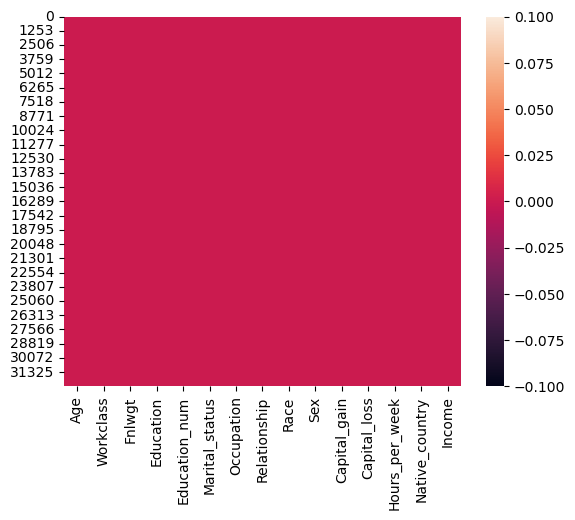

In [21]:
sns.heatmap(df.isnull())

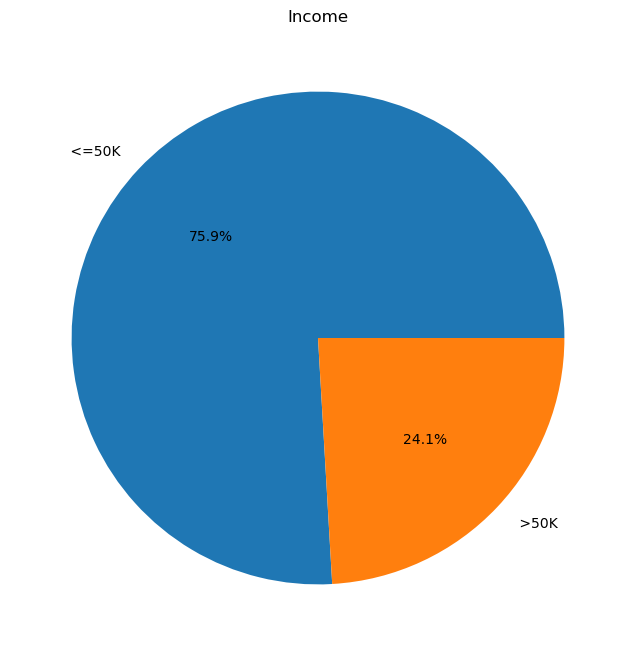

In [22]:
income = df['Income'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(income, labels=income.index, autopct='%1.1f%%')
plt.title('Income')
plt.show()

In [23]:
#We can see that this is not balanced! only 24.1% of the people in the dataset earns more than 50k

In [24]:
cat_col = df.select_dtypes(include=['object']).columns
cat_summary = {column: df[column].value_counts() for column in cat_col}
cat_summary

{'Workclass': Workclass
  Private             24532
  Self-emp-not-inc     2541
  Local-gov            2093
  State-gov            1297
  Self-emp-inc         1116
  Federal-gov           960
  Without-pay            14
  Never-worked            7
 Name: count, dtype: int64,
 'Education': Education
  HS-grad         10501
  Some-college     7291
  Bachelors        5354
  Masters          1723
  Assoc-voc        1382
  11th             1175
  Assoc-acdm       1067
  10th              933
  7th-8th           646
  Prof-school       576
  9th               514
  12th              433
  Doctorate         413
  5th-6th           333
  1st-4th           168
  Preschool          51
 Name: count, dtype: int64,
 'Marital_status': Marital_status
  Married-civ-spouse       14976
  Never-married            10682
  Divorced                  4443
  Separated                 1025
  Widowed                    993
  Married-spouse-absent      418
  Married-AF-spouse           23
 Name: count, dtype: in

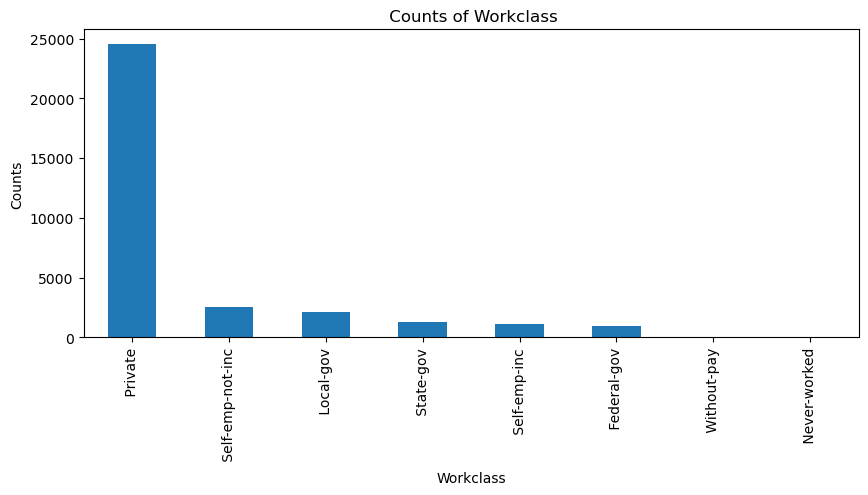

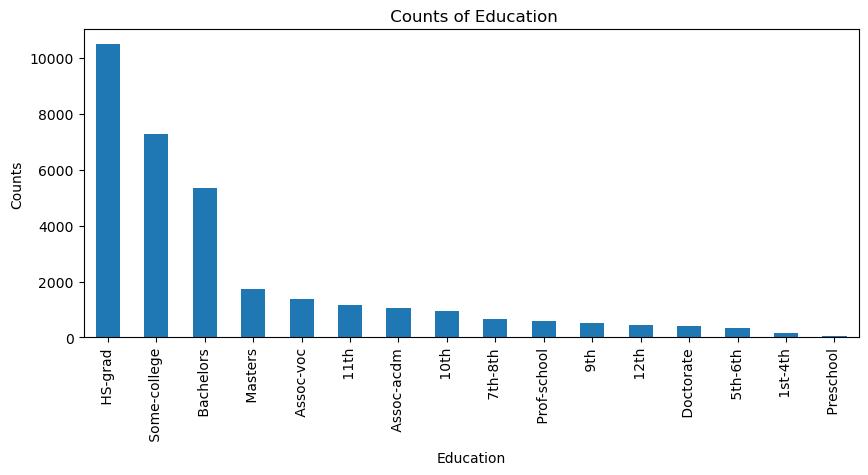

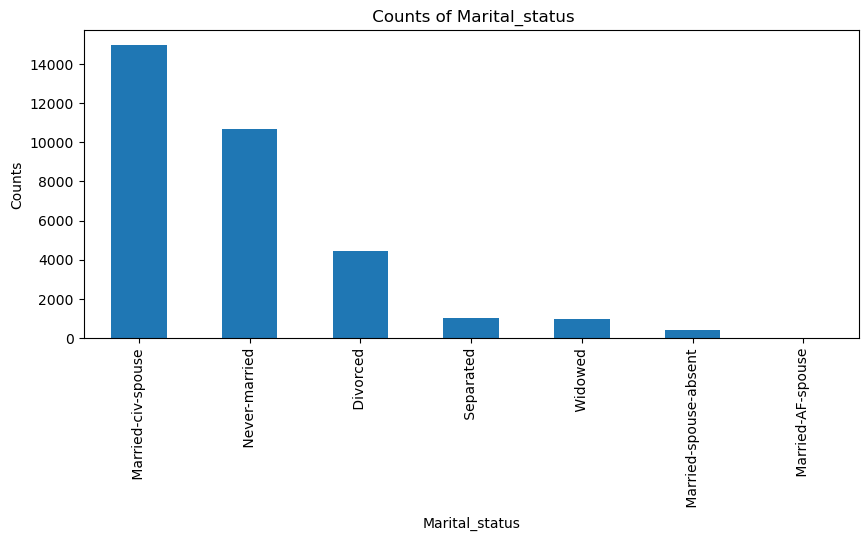

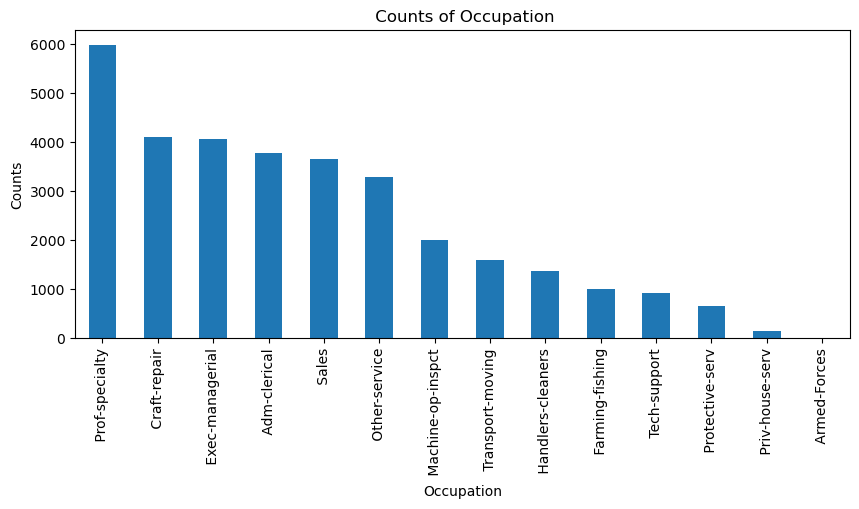

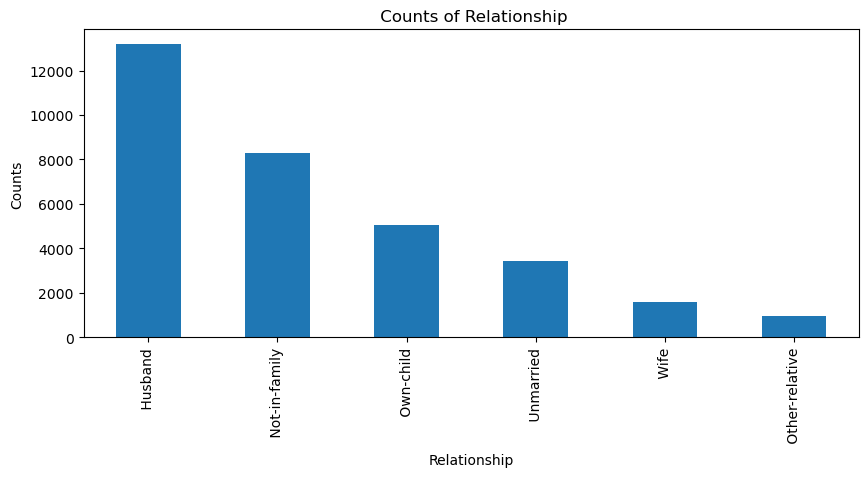

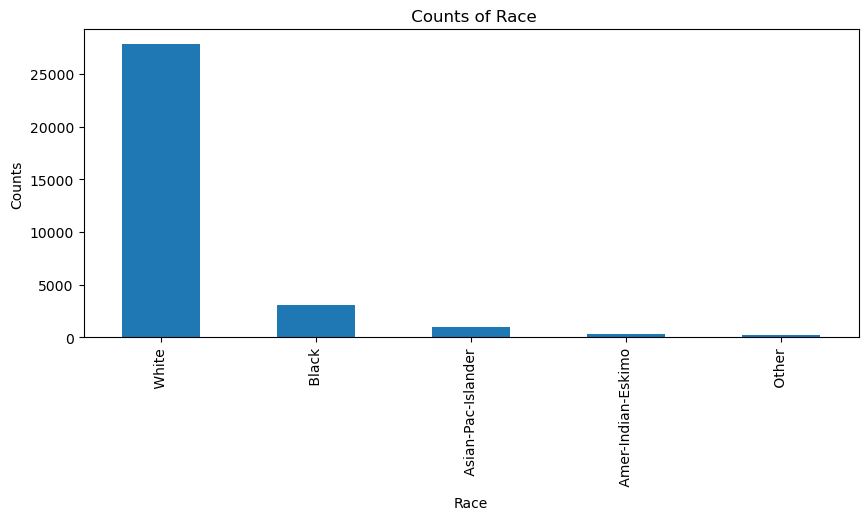

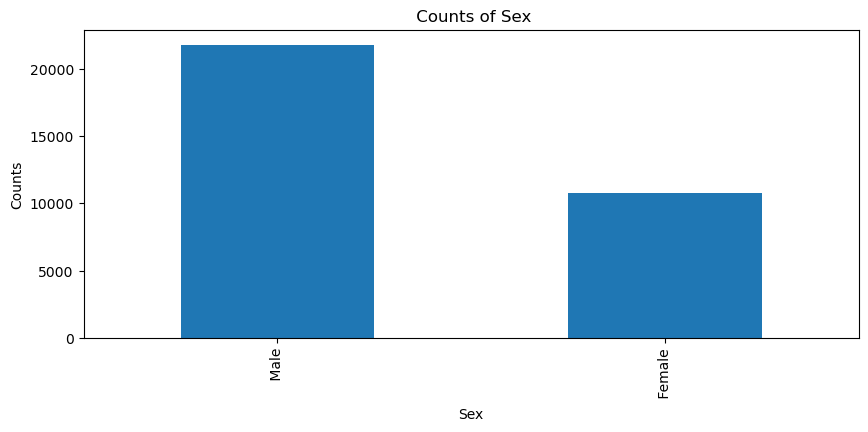

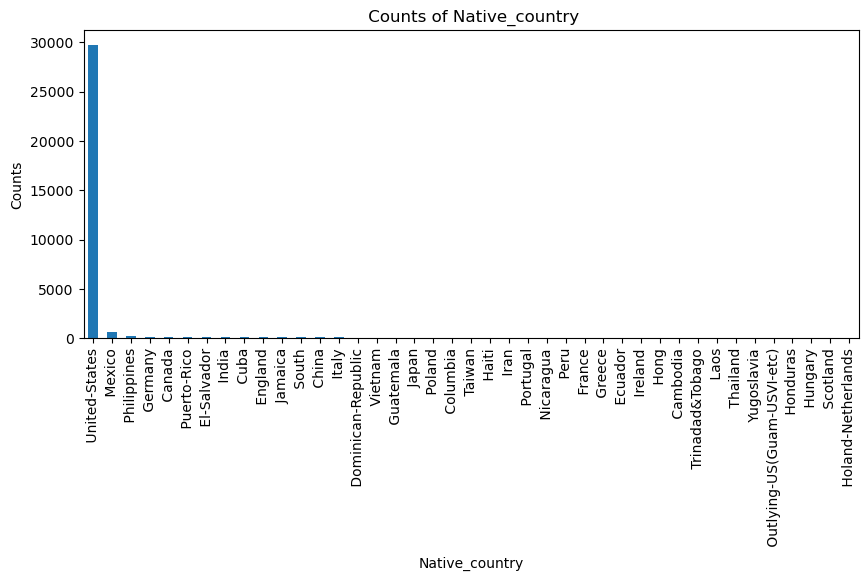

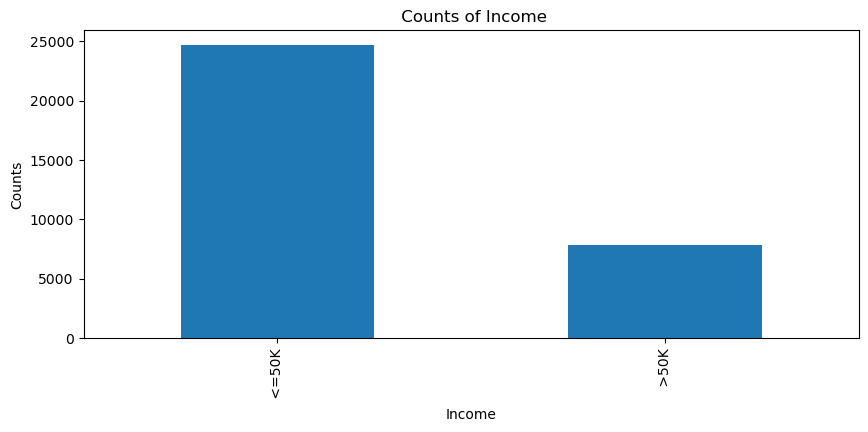

In [25]:
for column in cat_col:
    plt.figure(figsize=(10, 4)) 
    df[column].value_counts().plot(kind='bar') 
    plt.title(f' Counts of {column}') 
    plt.xlabel(column)  
    plt.ylabel('Counts') 
    plt.show() 

Some insights
- A lot of people in this dataset work in the private sector
- Majority of them are HS-grad
- Majority of them are married
- Majority of them are working in prof-speciality folllowed by craft-repair, executive managerial and admin-clerical occupation
- Majority of them are male - husband
- Majoirty of them are white
- Majority of them are from the US
- Majority of them are earns less than equal to 50k


In [26]:
num_col = df.select_dtypes(include=['int64']).columns
num_summary = {column: df[column].value_counts() for column in num_col}
num_summary

{'Age': Age
 36    898
 31    888
 34    886
 23    877
 35    876
      ... 
 83      6
 88      3
 85      3
 86      1
 87      1
 Name: count, Length: 73, dtype: int64,
 'Fnlwgt': Fnlwgt
 164190    13
 203488    13
 123011    13
 148995    12
 126675    12
           ..
 325573     1
 140176     1
 318264     1
 329205     1
 257302     1
 Name: count, Length: 21647, dtype: int64,
 'Education_num': Education_num
 9     10501
 10     7291
 13     5354
 14     1723
 11     1382
 7      1175
 12     1067
 6       933
 4       646
 15      576
 5       514
 8       433
 16      413
 3       333
 2       168
 1        51
 Name: count, dtype: int64,
 'Capital_gain': Capital_gain
 0        29849
 15024      347
 7688       284
 7298       246
 99999      159
          ...  
 1111         1
 2538         1
 22040        1
 4931         1
 5060         1
 Name: count, Length: 119, dtype: int64,
 'Capital_loss': Capital_loss
 0       31041
 1902      202
 1977      168
 1887      159
 1848  

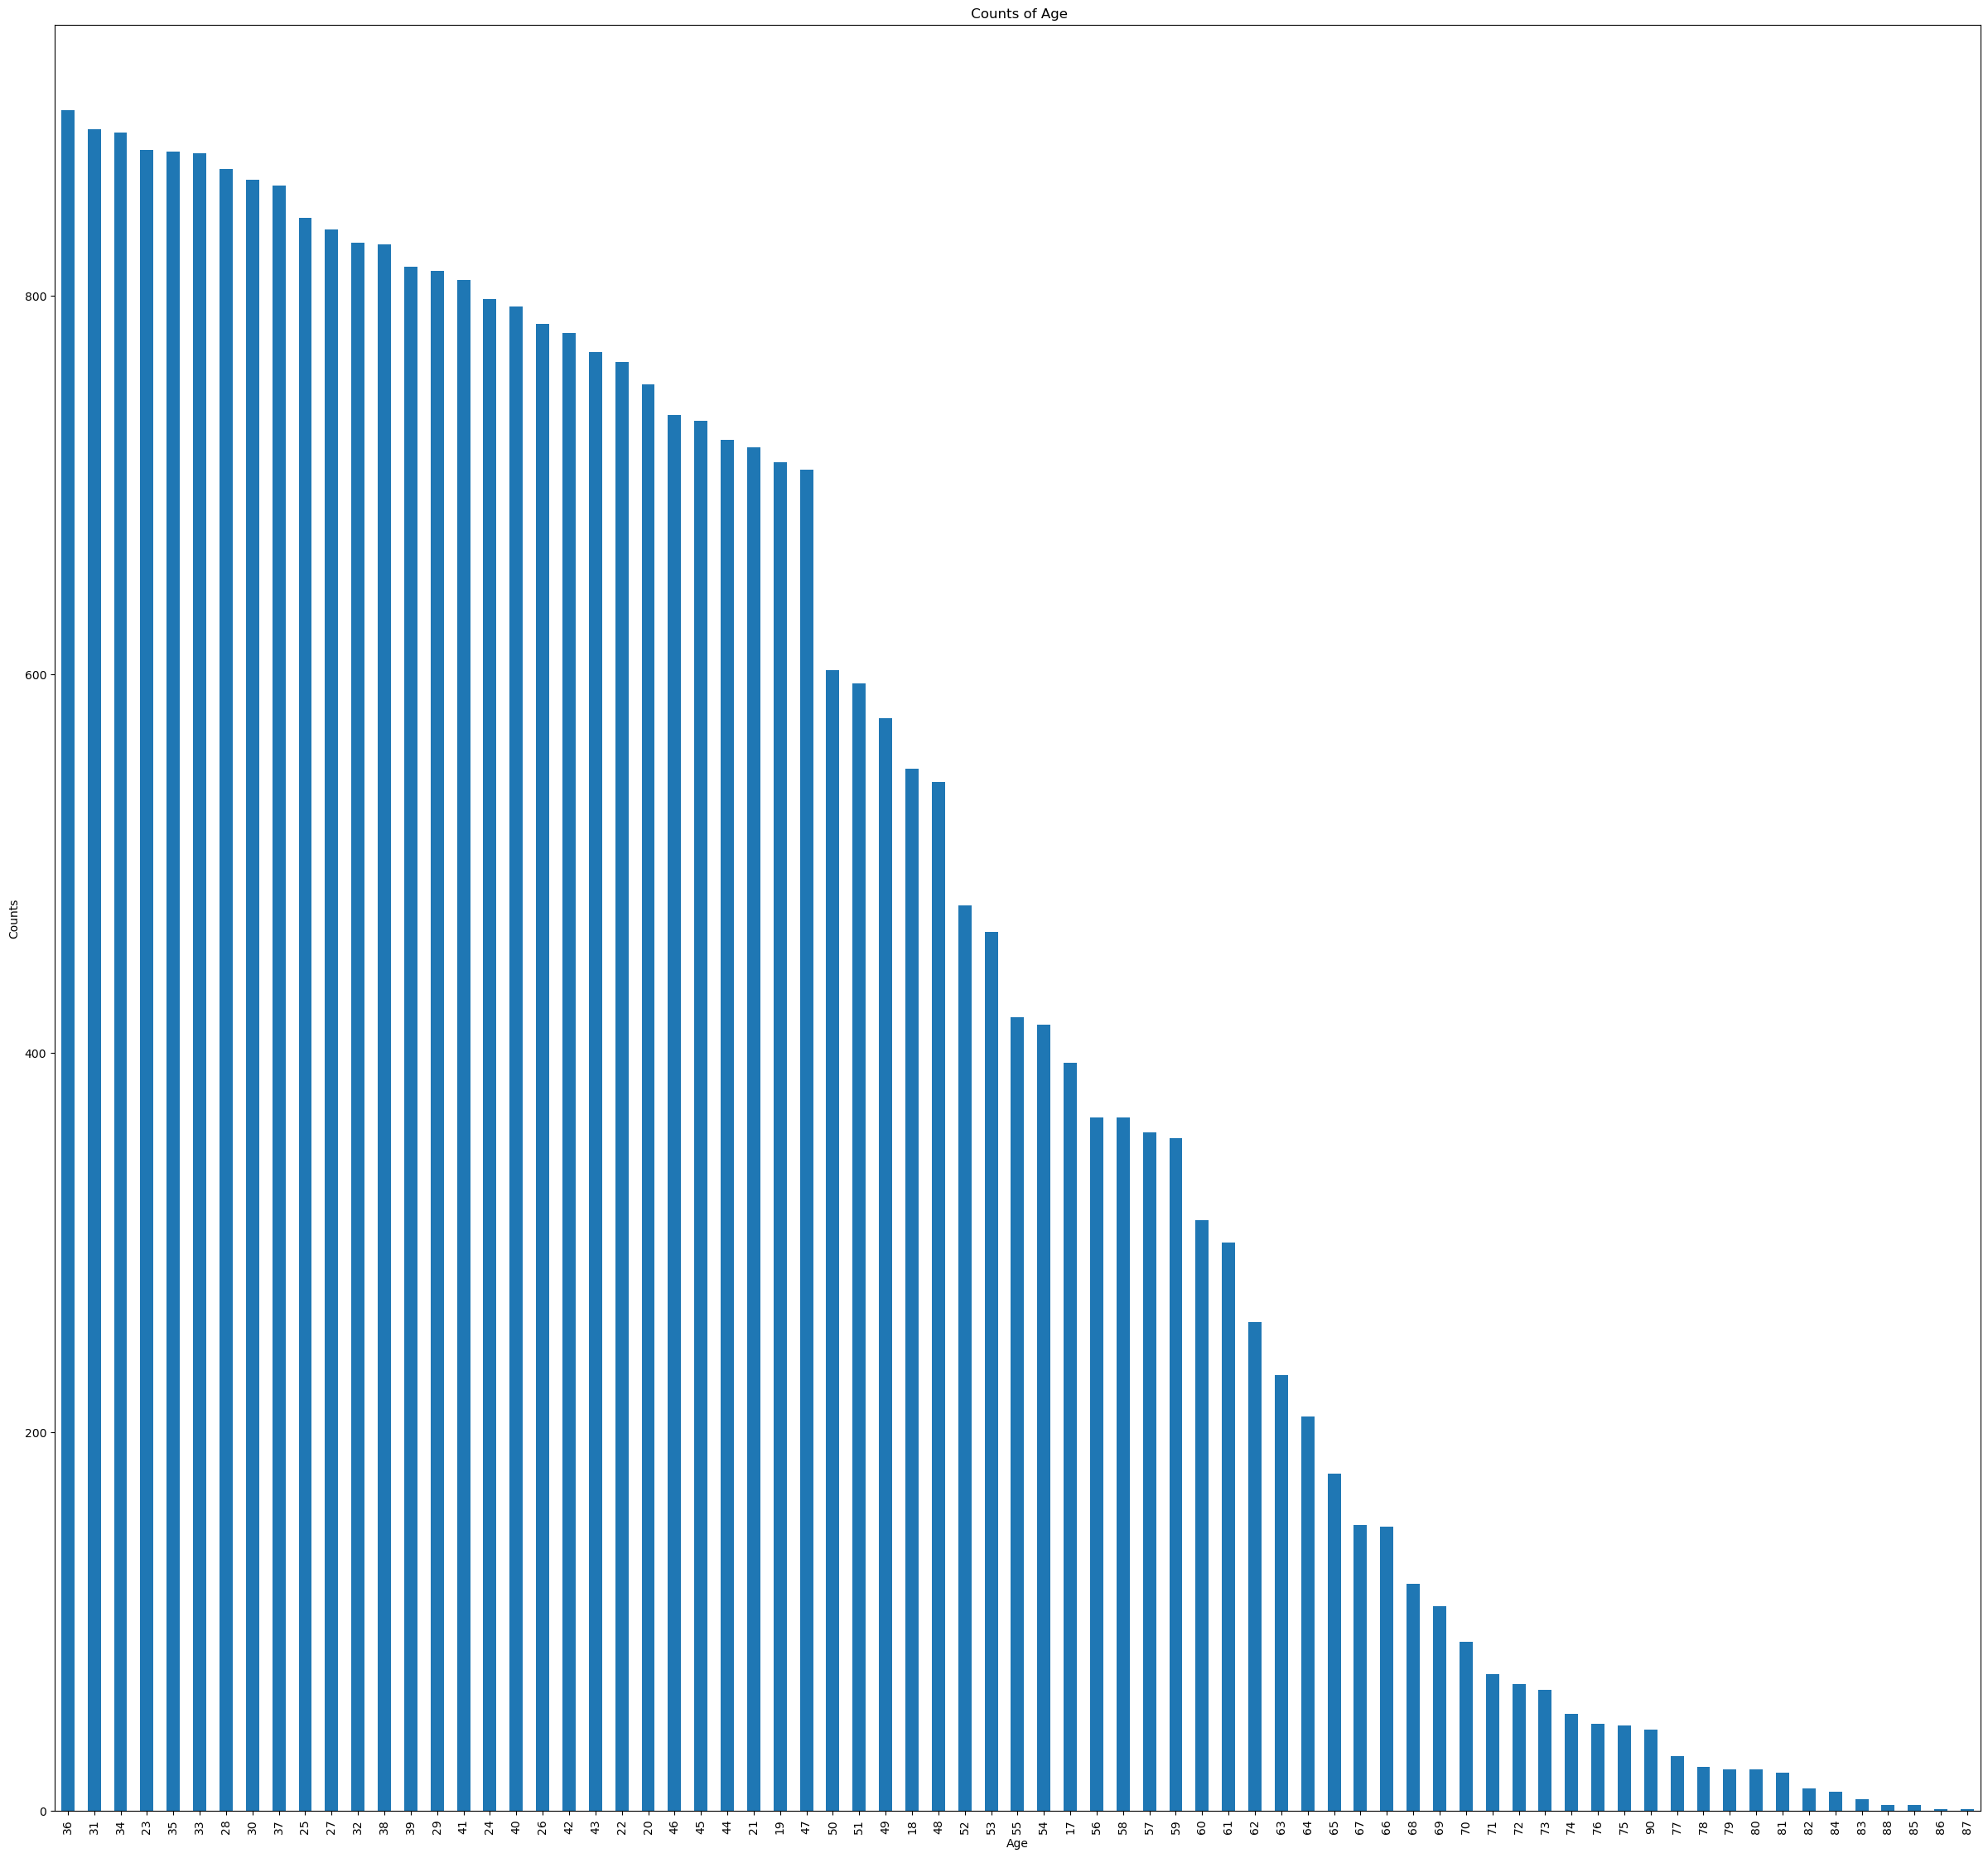

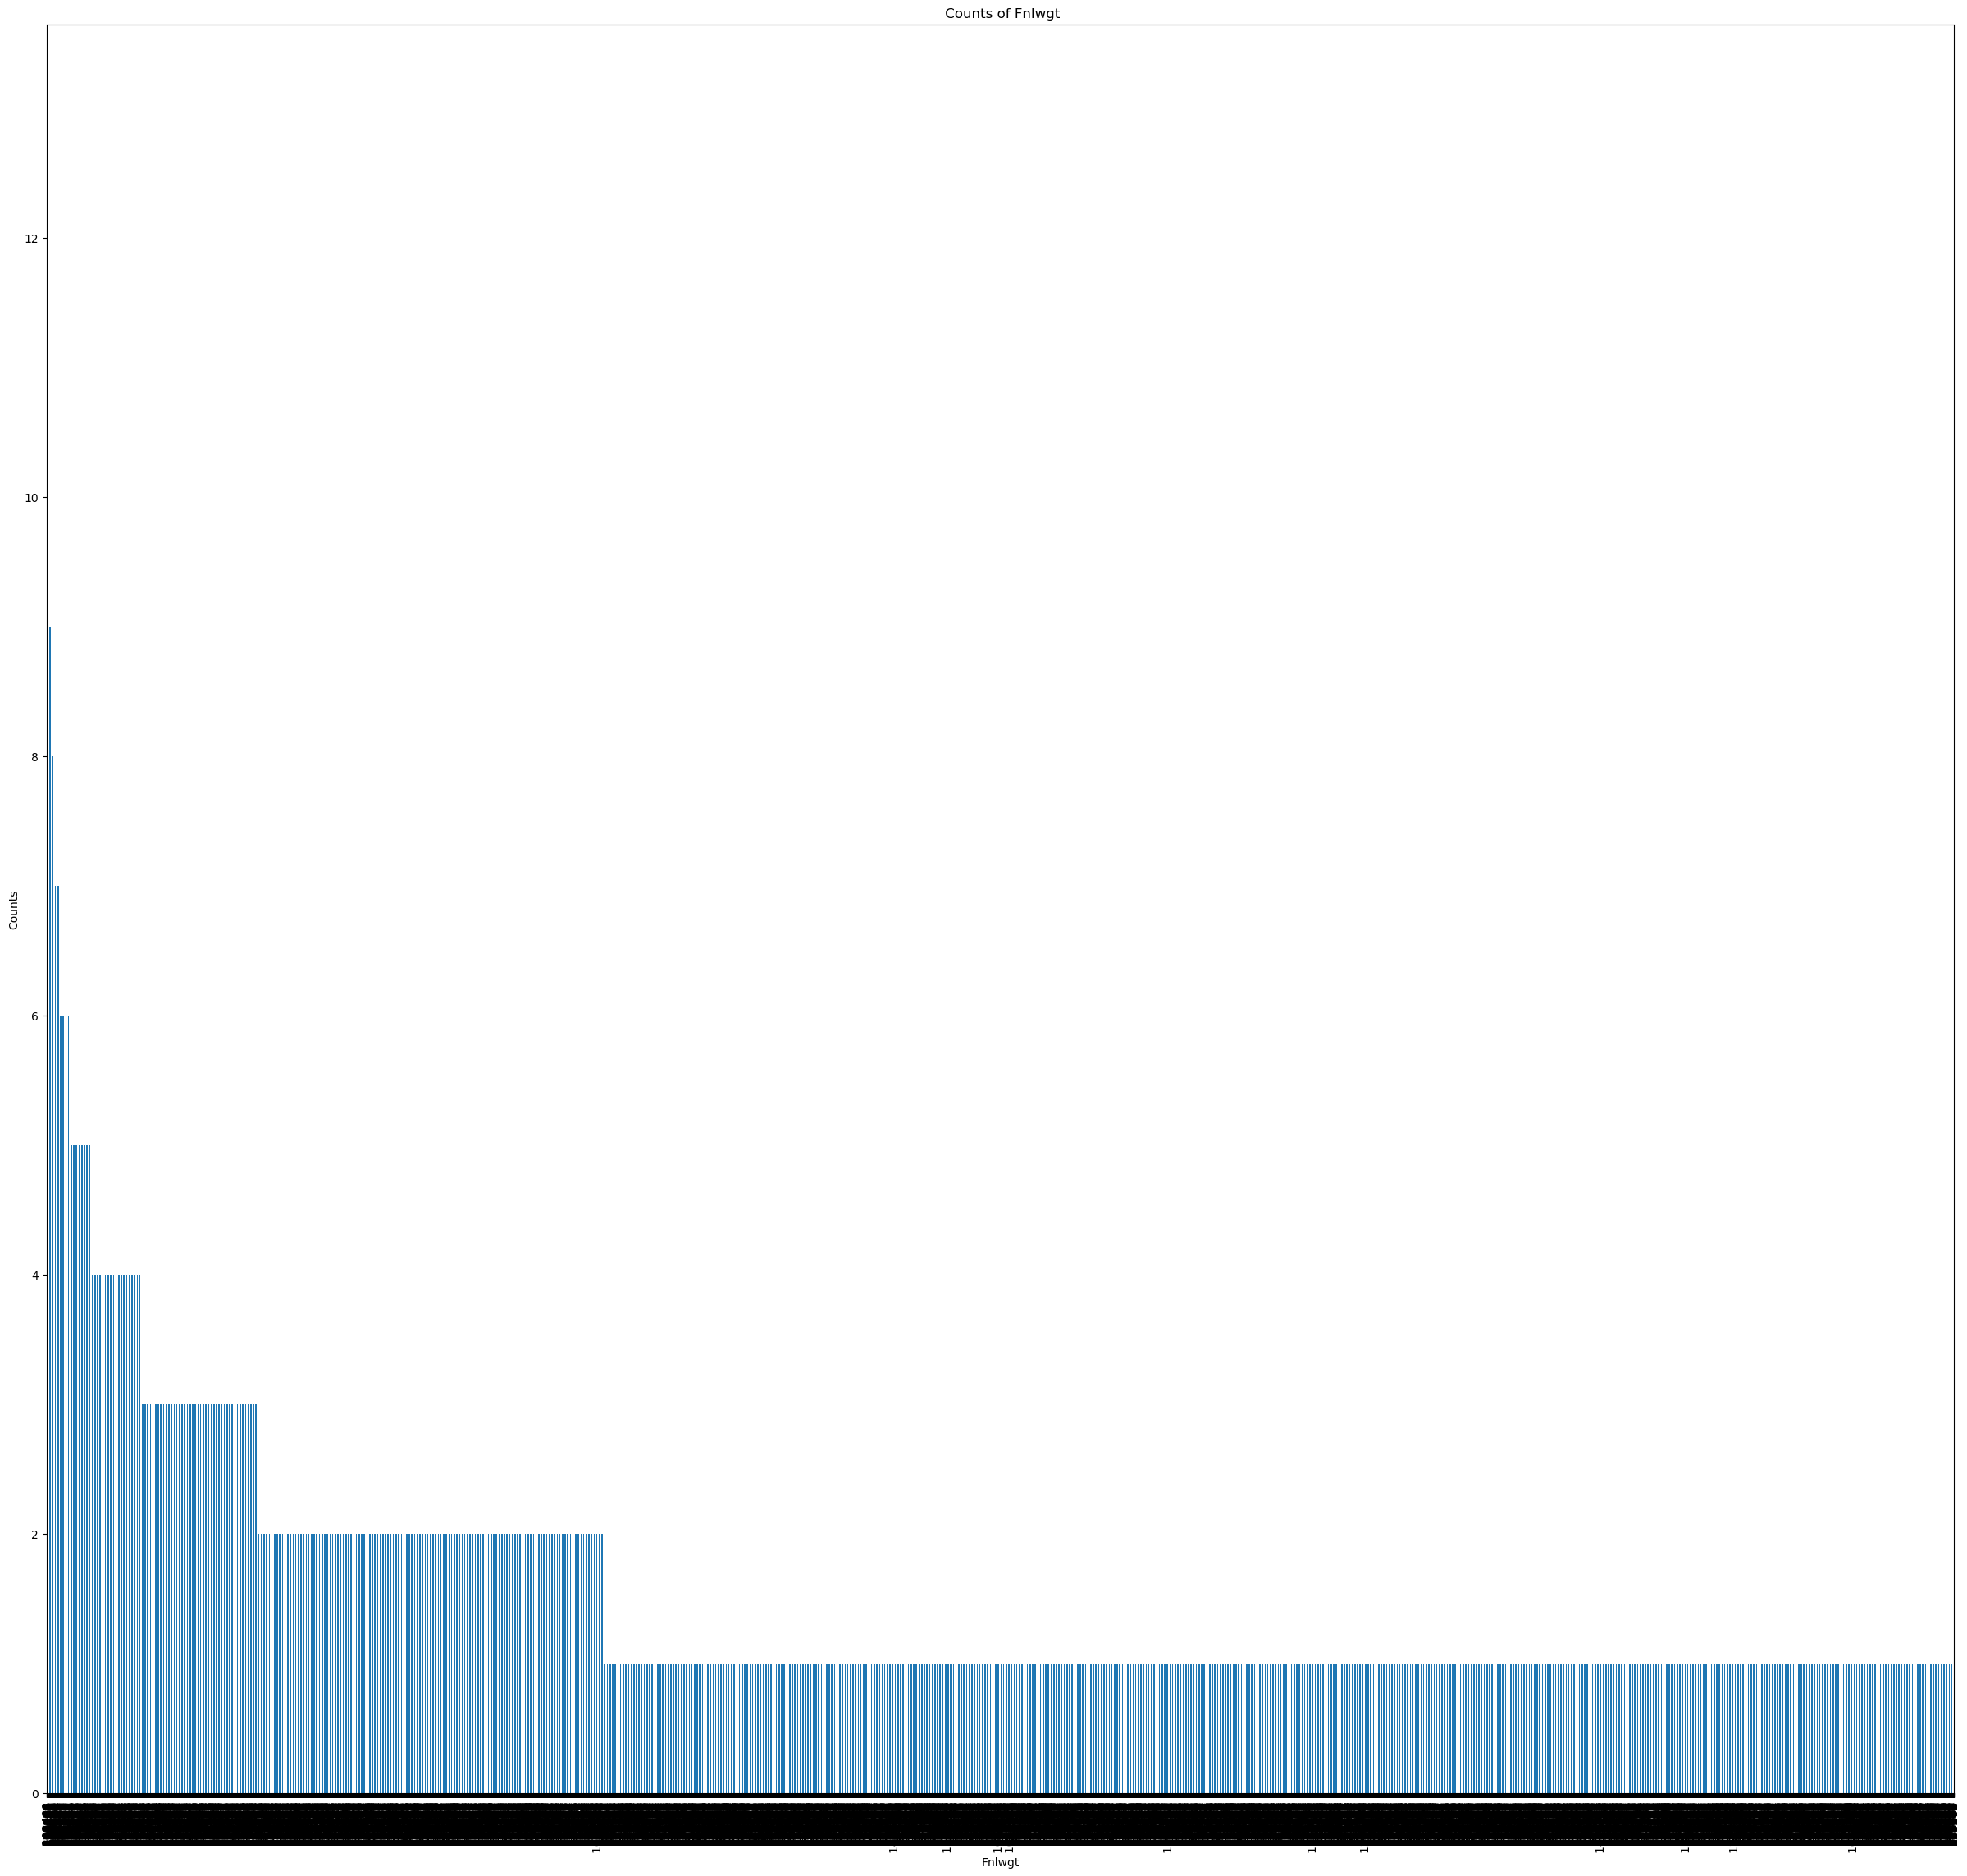

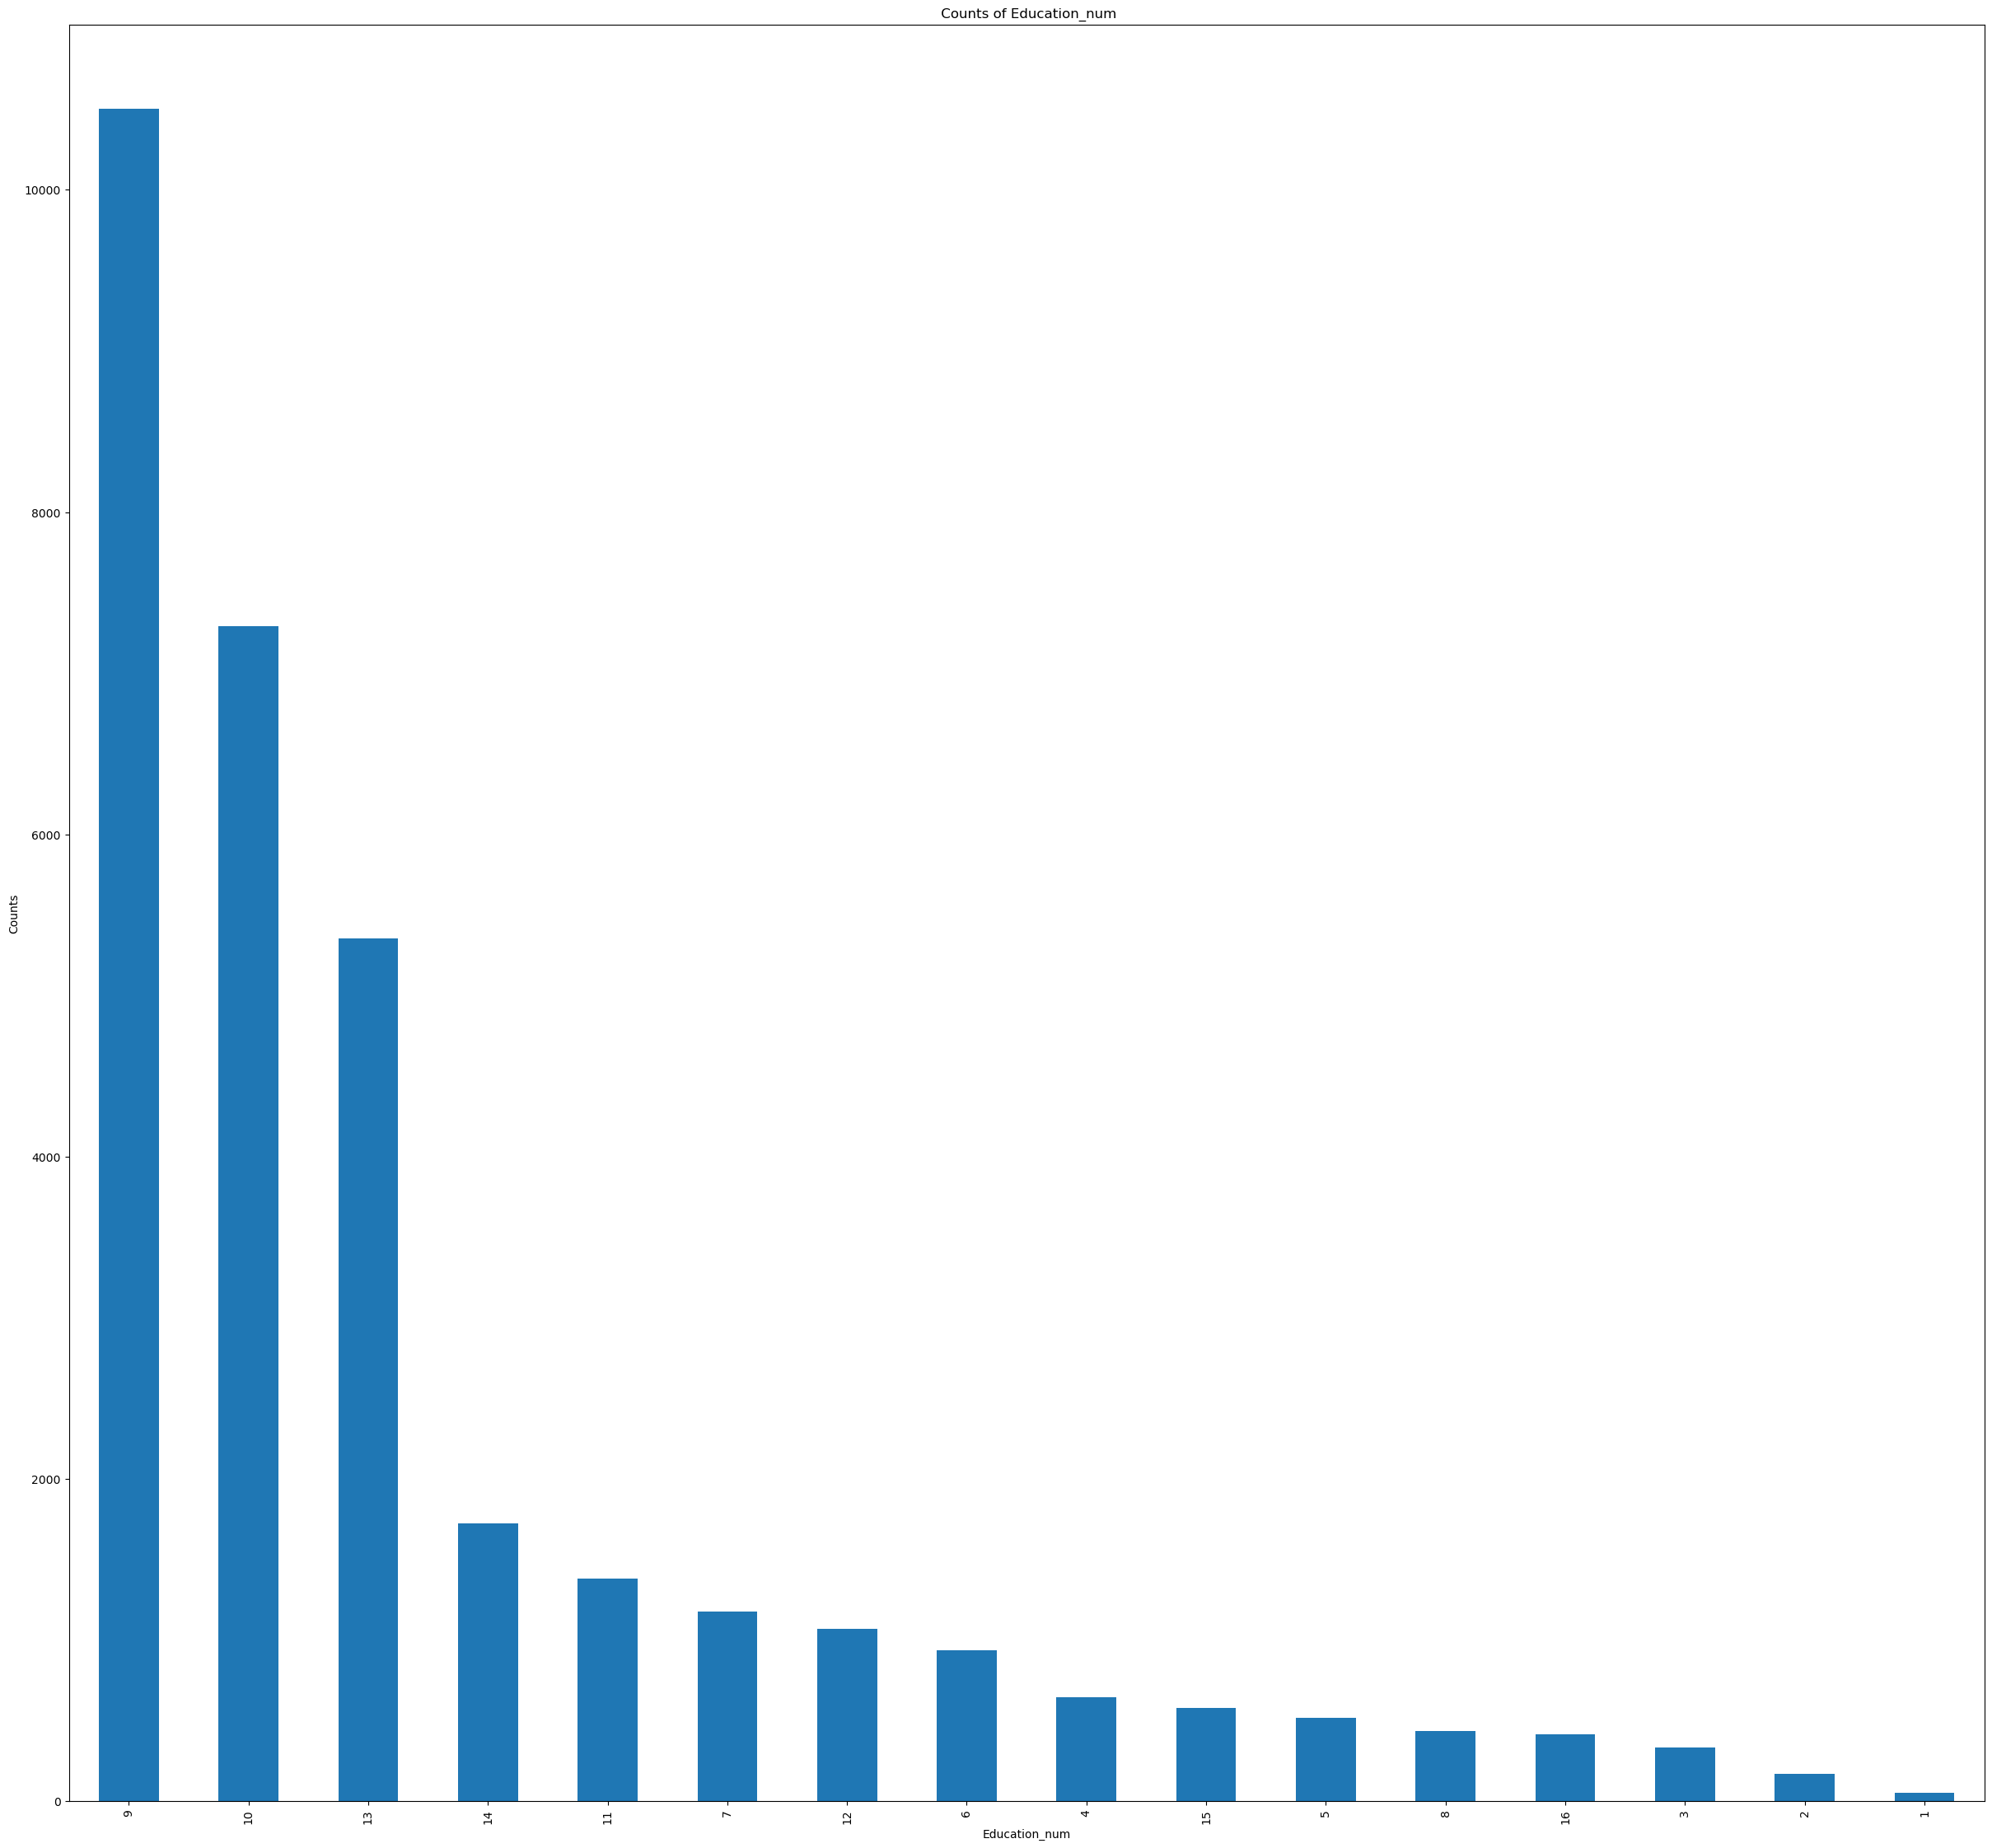

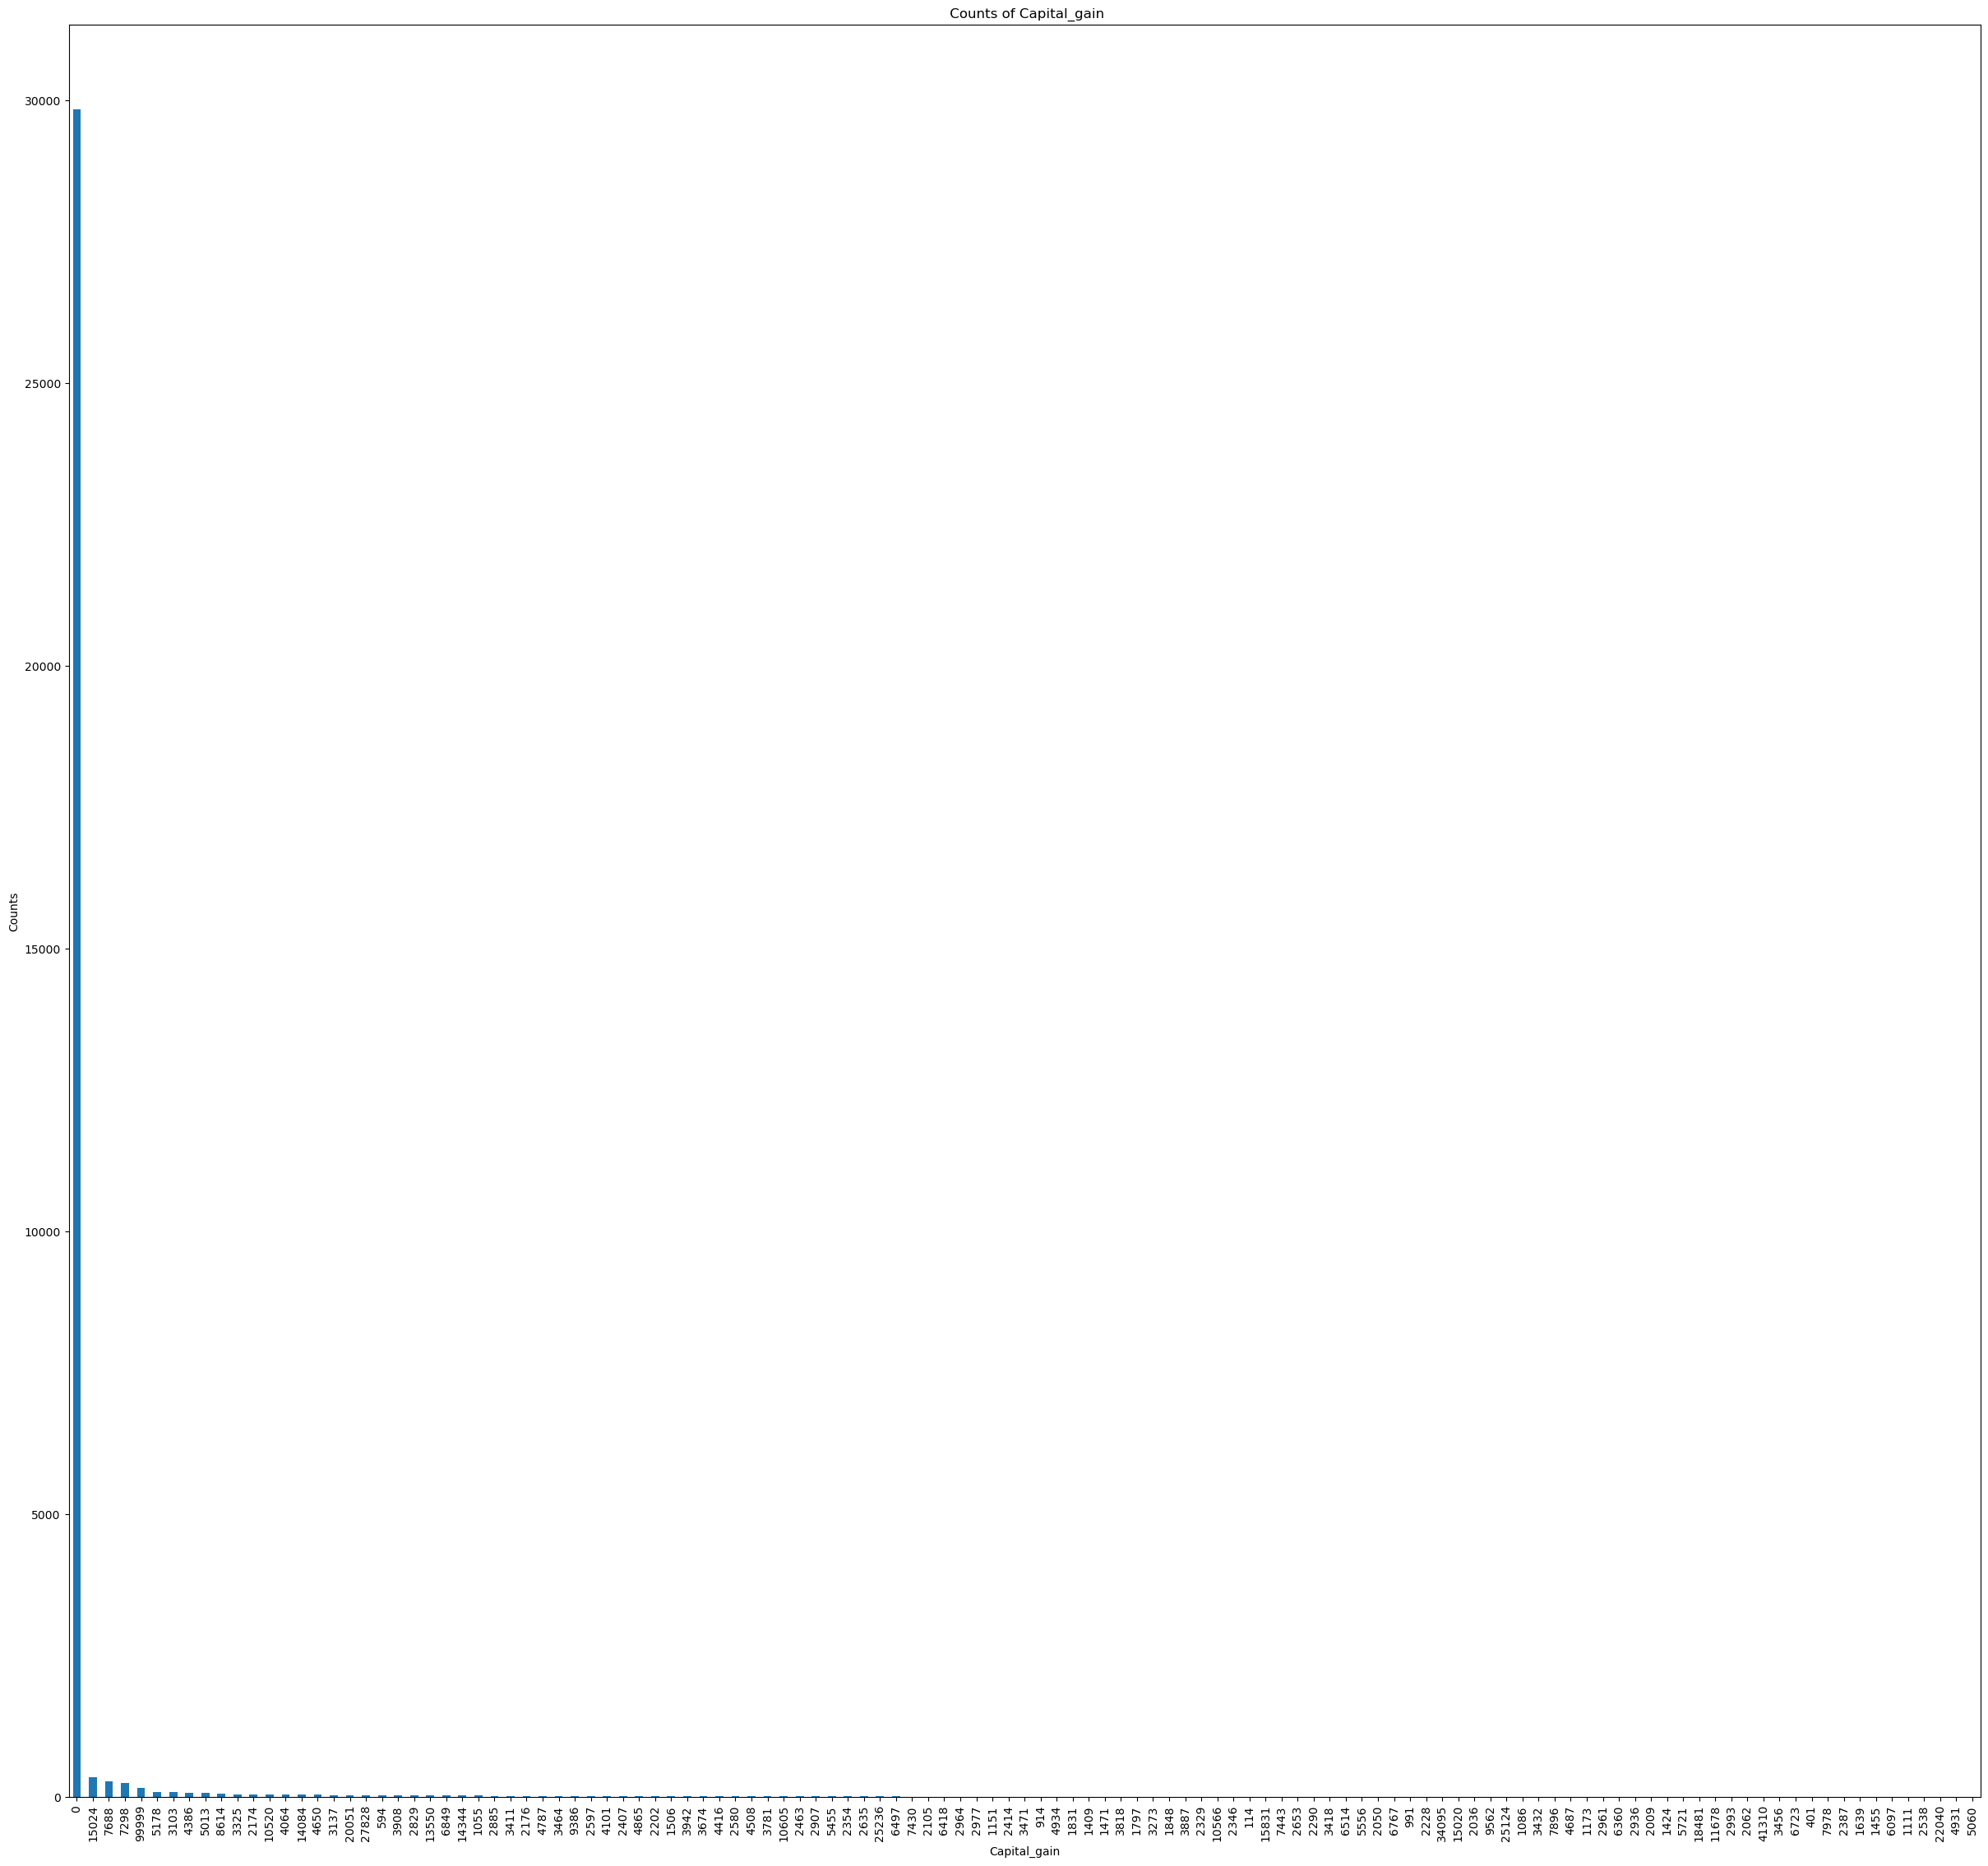

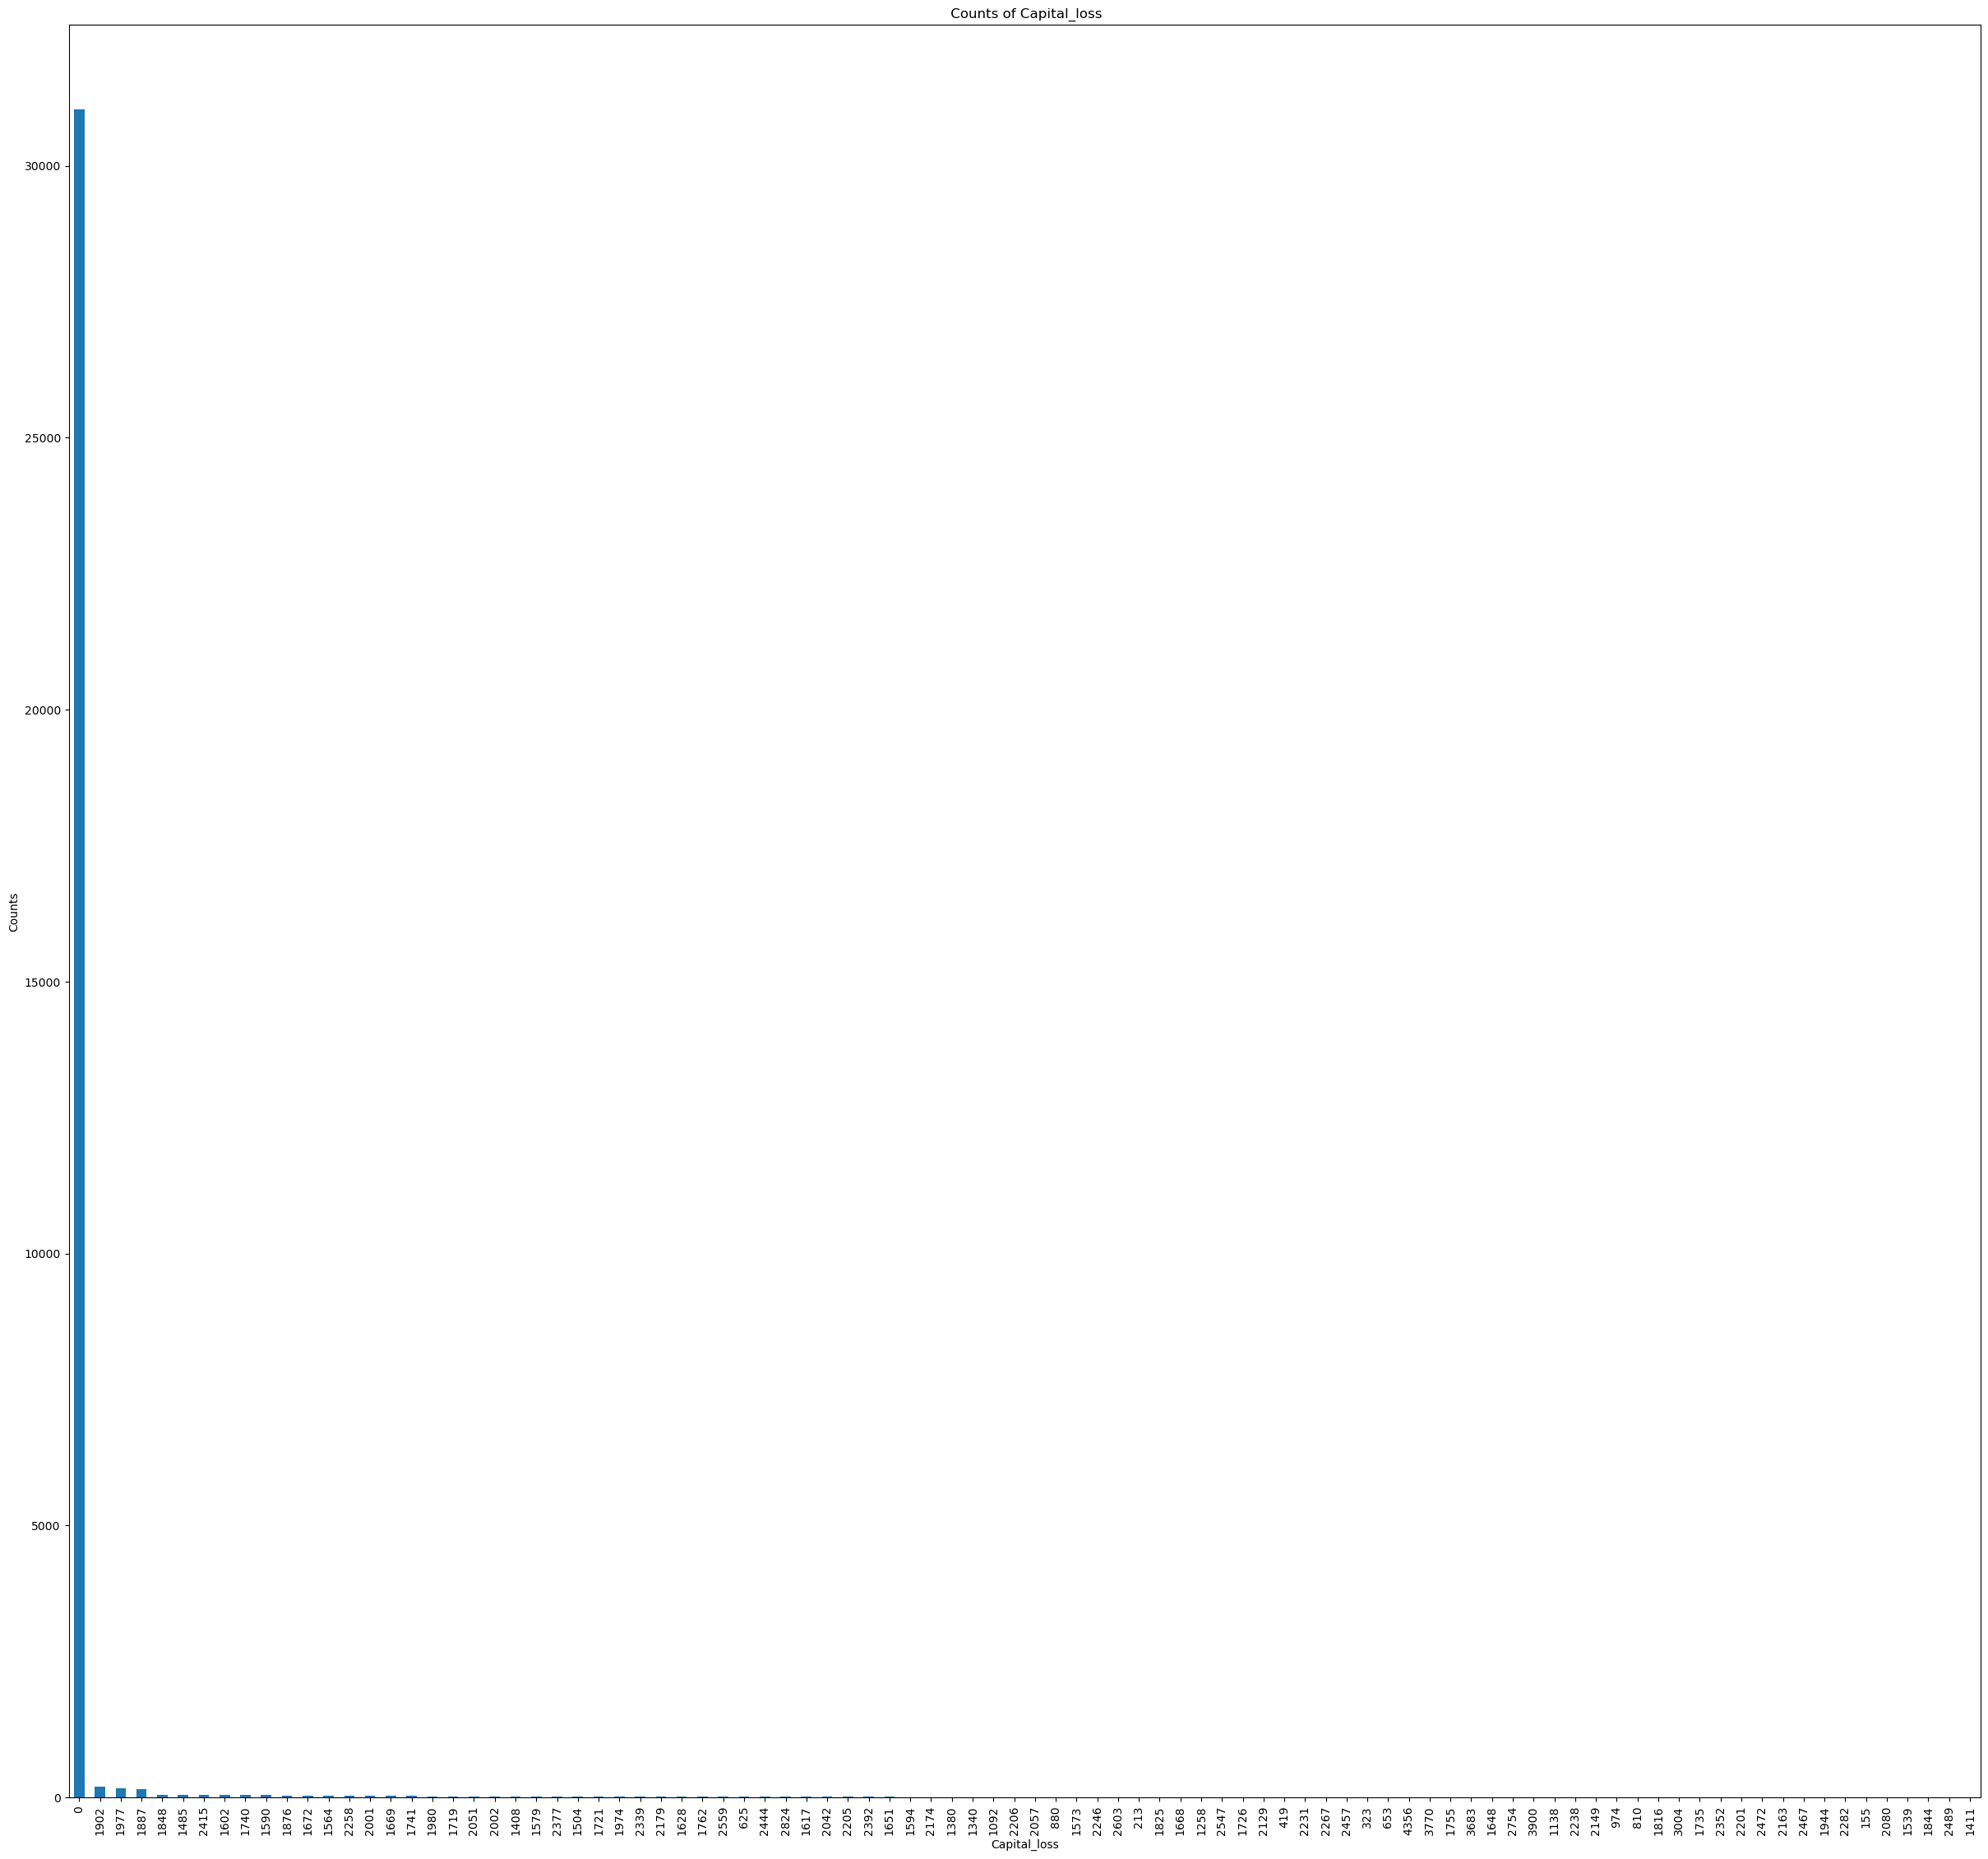

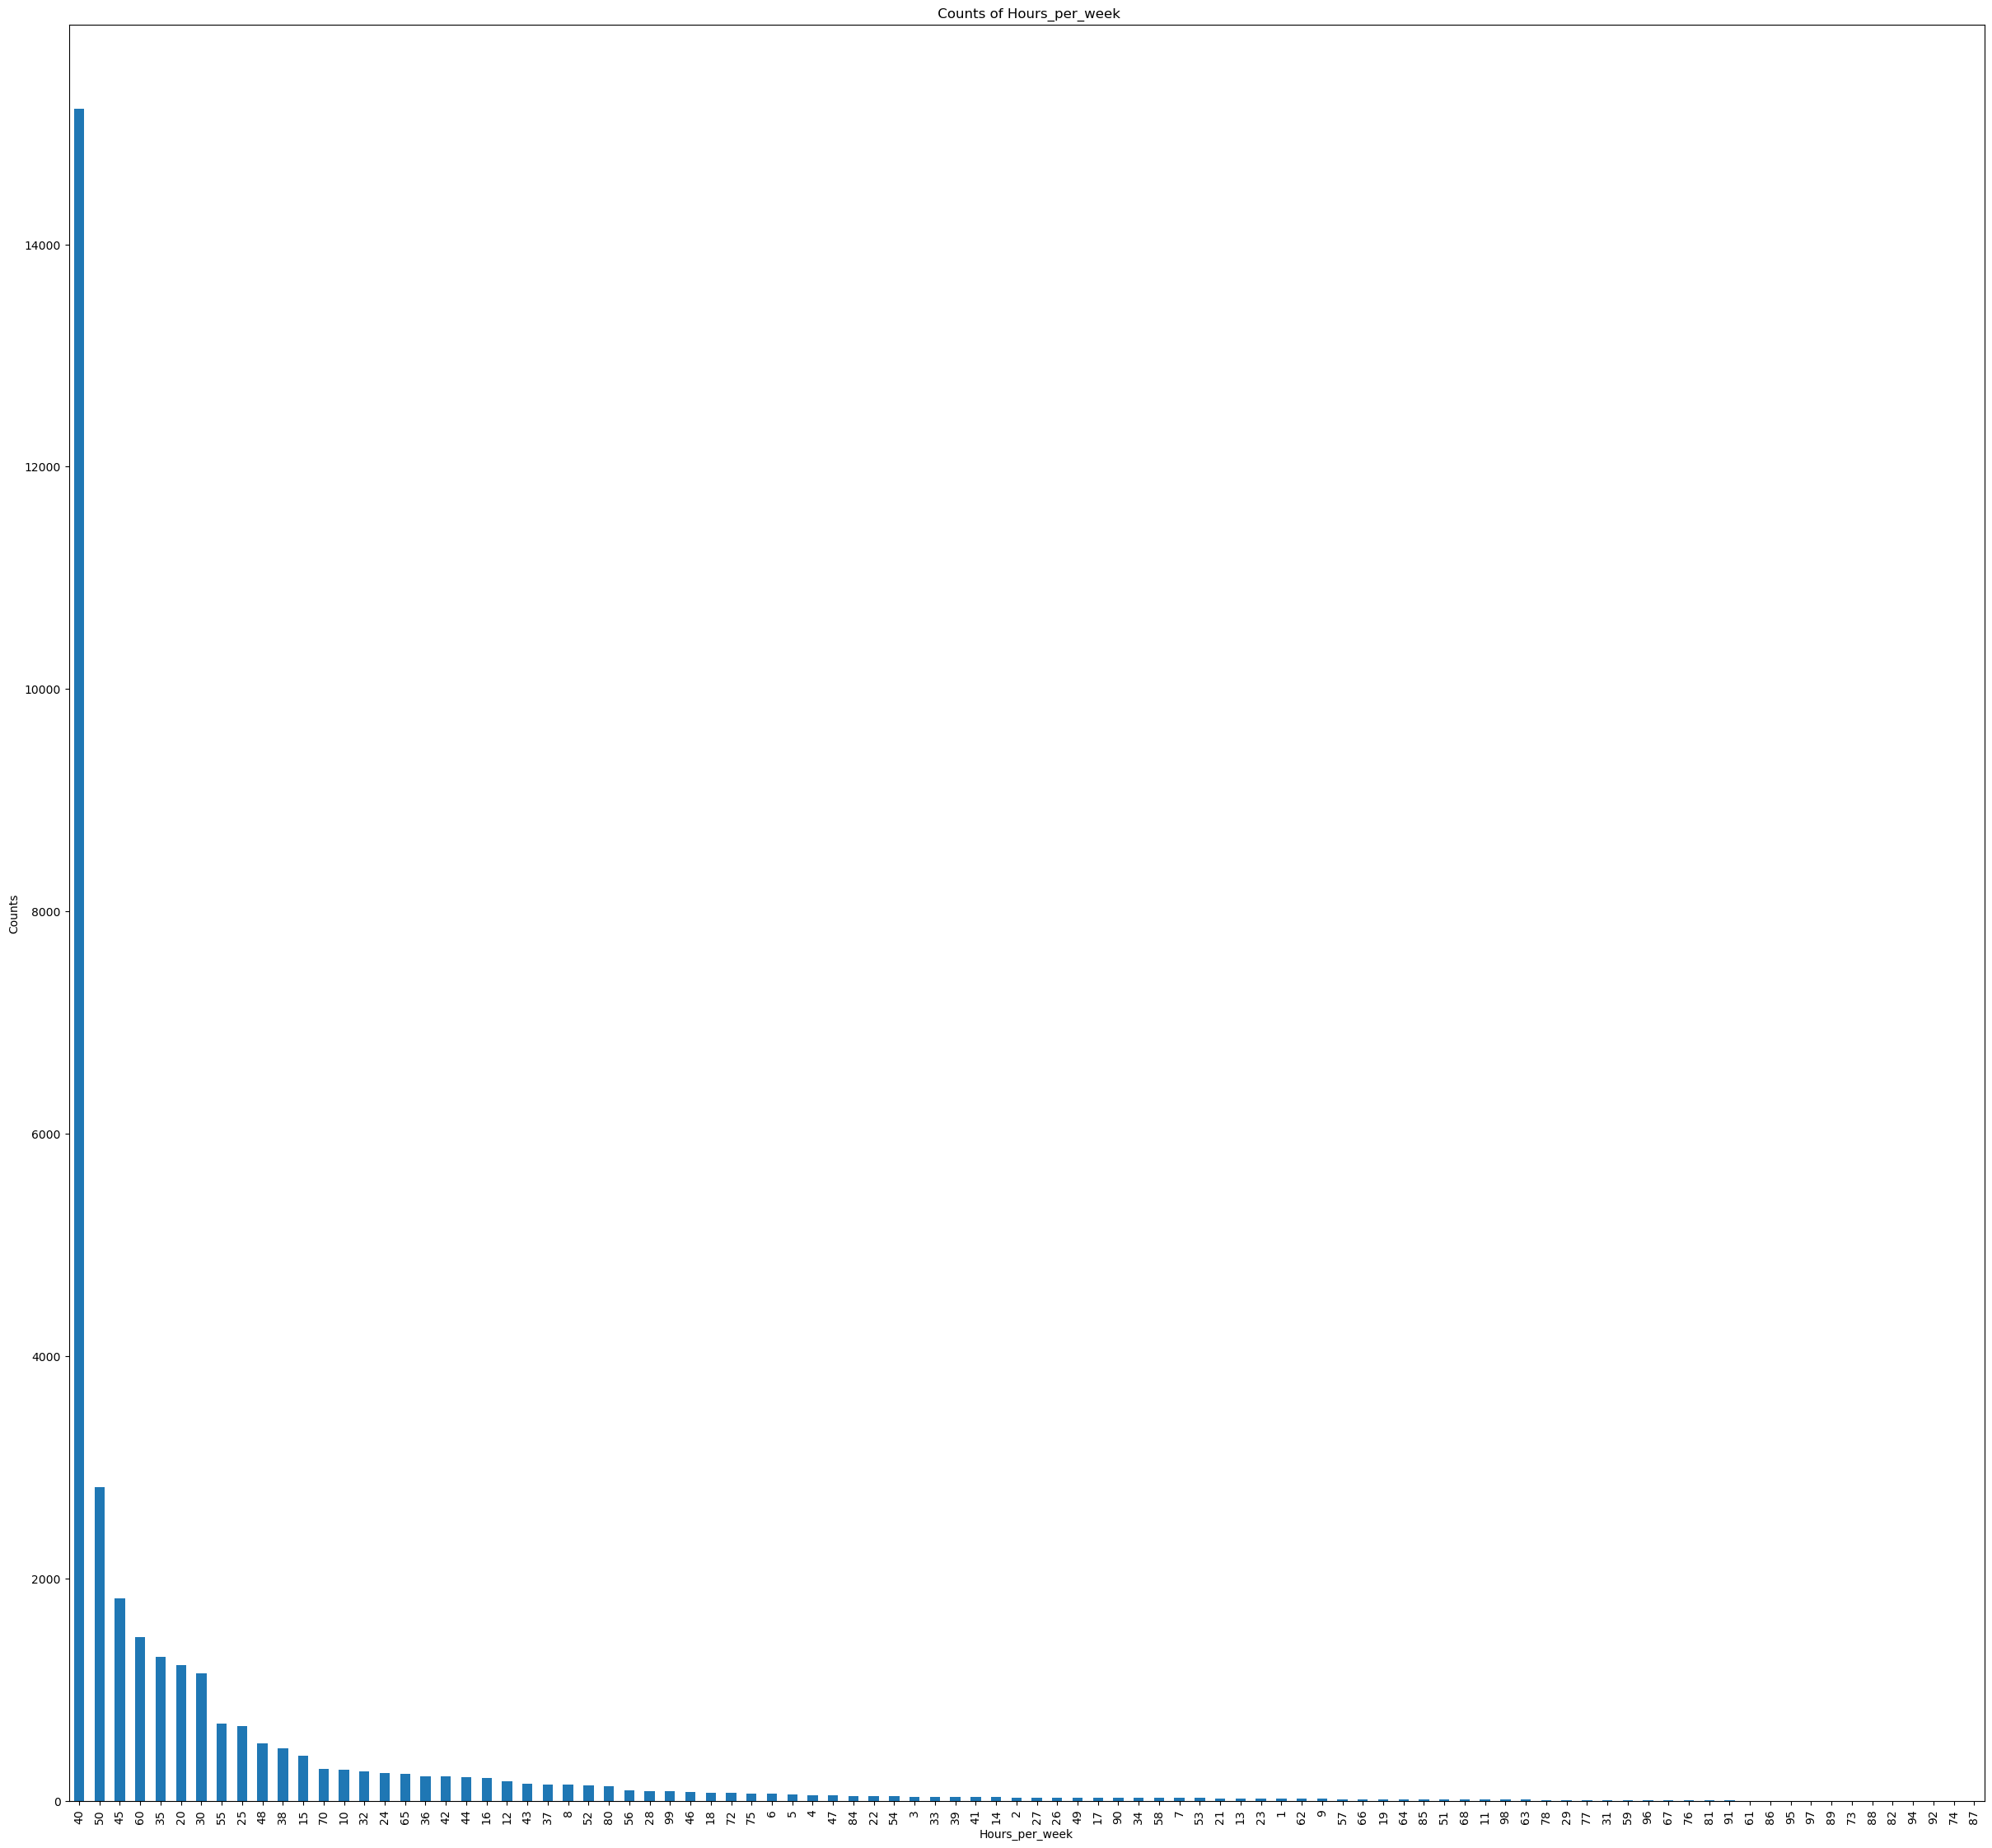

In [27]:
for column in num_col:
    plt.figure(figsize=(30, 28)) 
    df[column].value_counts().plot(kind='bar') 
    plt.title(f' Counts of {column}') 
    plt.xlabel(column)  
    plt.ylabel('Counts') 
    plt.show()

Some Insights
-We can see that we have quite a lot of people within the range of 30-36 (36 being the highest)
-Harder to see for fnlwgt - we can look into it later
-We can see that majority of the people in the dataset have completed year 9 education (HS)
-Not a lot of people with capital gain but the few made 15024
-For Cap loss - 1902
- We can see majority of the people works 40 hours 

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fnlwgt'}>],
       [<Axes: title={'center': 'Education_num'}>,
        <Axes: title={'center': 'Capital_gain'}>],
       [<Axes: title={'center': 'Capital_loss'}>,
        <Axes: title={'center': 'Hours_per_week'}>]], dtype=object)

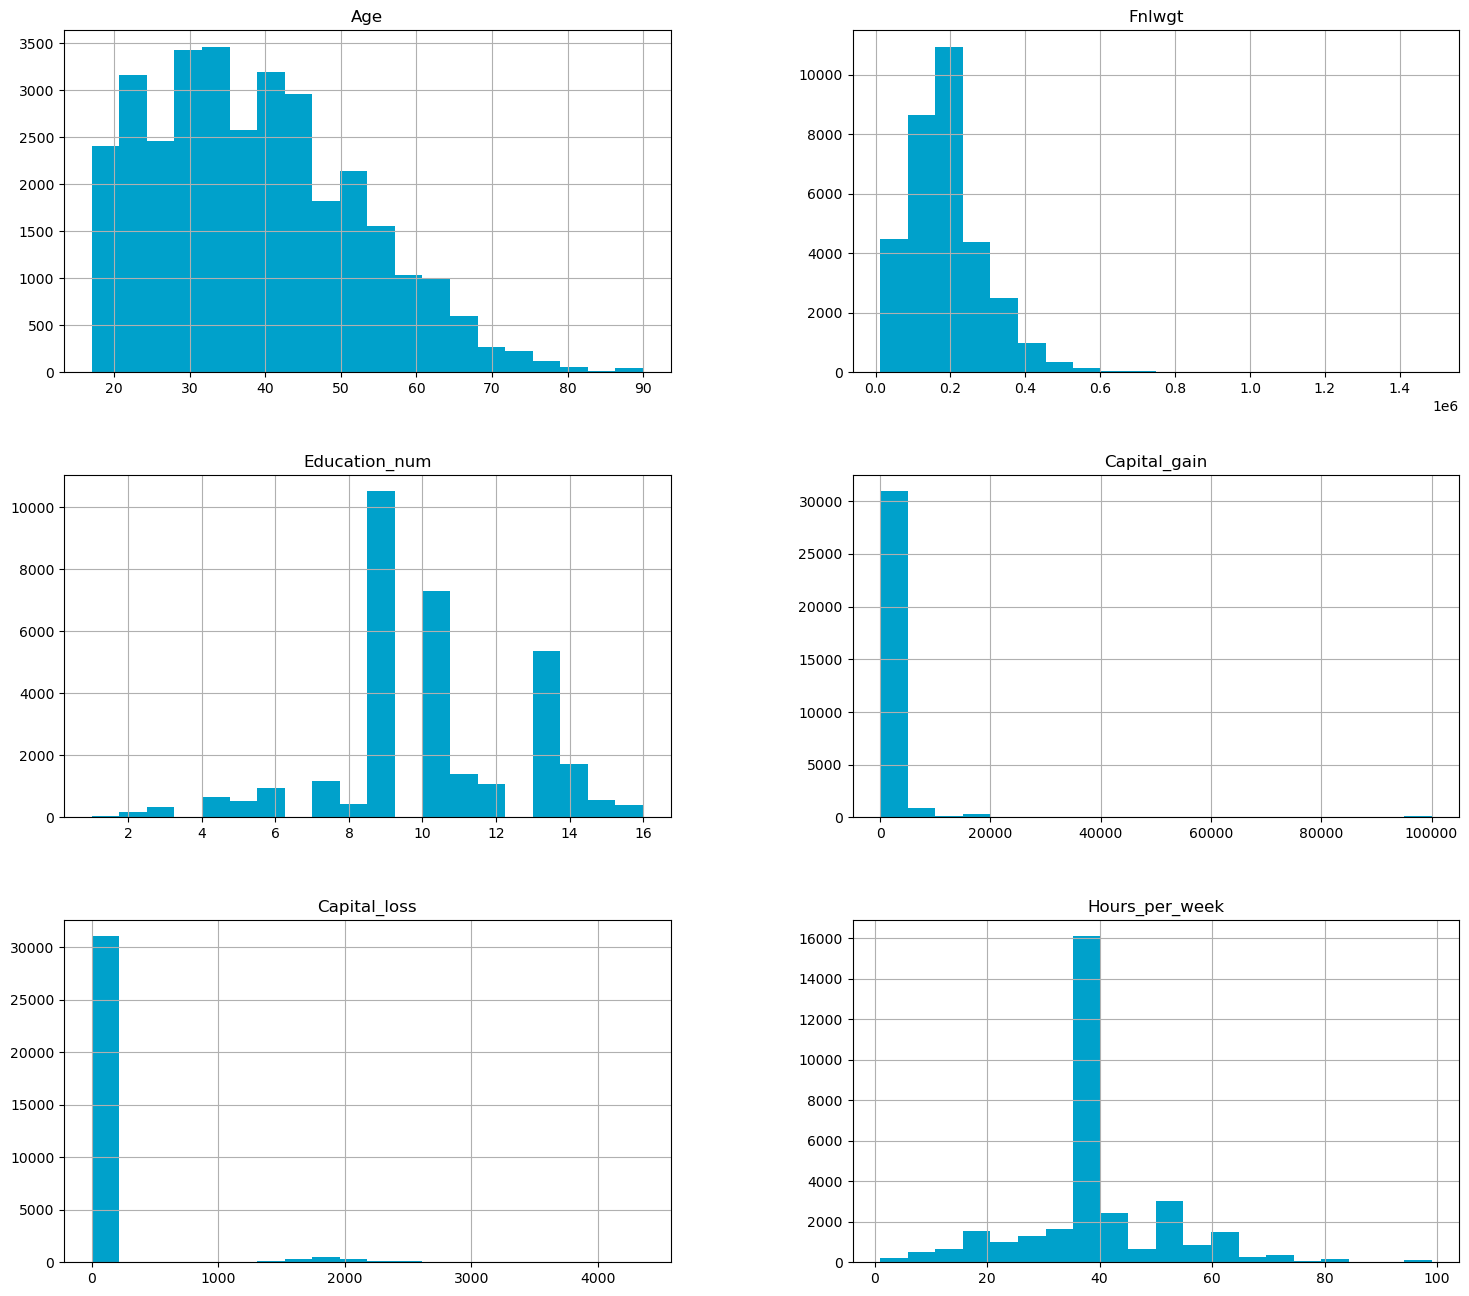

In [28]:
df.hist(bins=20, figsize=(18,16), color='#00a1cb')

In [29]:
#Here we can see that our target variable is skewed to the right.

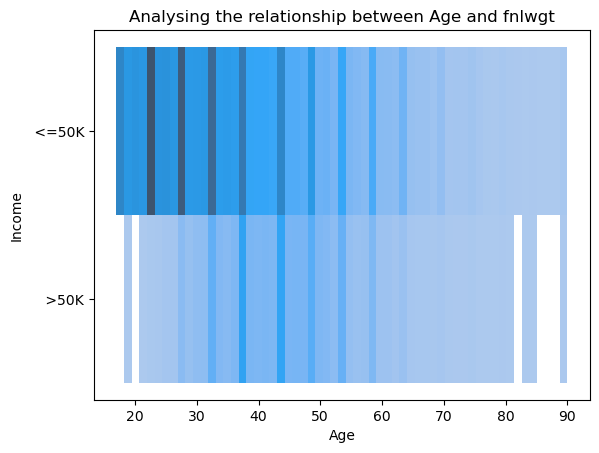

In [30]:
sns.histplot(x='Age', y='Income', data=df)
plt.title('Analysing the relationship between Age and fnlwgt')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [31]:
#Its hard to read the above so I will create new age groups for better visualisation.

In [32]:
def age_groups(age):
    age1 = abs(int(age))
    if 11 <= age1 <= 18:
        return "11-18"
    elif 18 < age1 <= 29:
        return "19-29"
    elif 29 < age1 <= 39:
        return '30-39'
    elif 39 < age1 <= 49:
        return '40-49'
    elif 49 < age1 <= 59:
        return "50-59"
    elif 59 < age1 <= 69:
        return "60-69"
    else:
        return '70 above'

In [33]:
df['Age_group'] = df['Age'].apply(age_groups)

In [34]:
pd.crosstab(df['Age_group'], df['Income'])

Income      <=50K   >50K
Age_group               
11-18         945      0
19-29        8255    511
30-39        6303   2309
40-49        4513   2662
50-59        2711   1707
60-69        1476    539
70 above      516    113

#Here we can see that majority of the people within 19-29 earns less than 50k wherein people within 40-49 are more likely to earn more than 50k

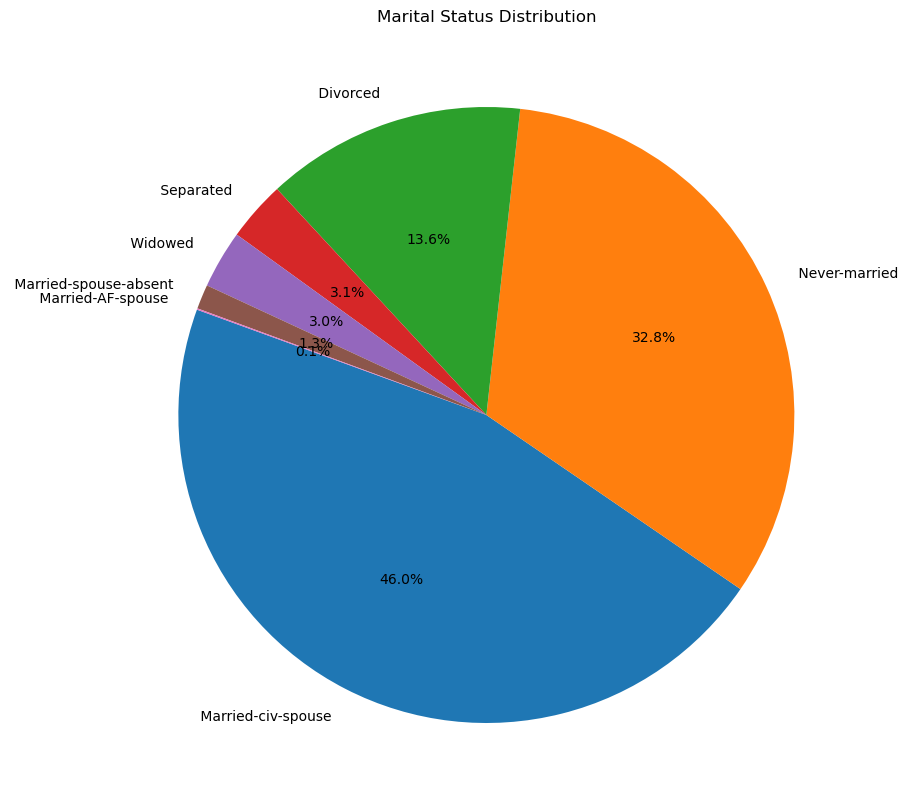

In [35]:
count_MS = df['Marital_status'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(count_MS, labels=count_MS.index, autopct='%1.1f%%', startangle=160)
plt.title('Marital Status Distribution')
plt.show()

In [36]:
#46% prcent are married in this dataset 

In [37]:
pd.crosstab(df['Marital_status'], df['Income'])

Income                   <=50K   >50K
Marital_status                       
 Divorced                 3980    463
 Married-AF-spouse          13     10
 Married-civ-spouse       8284   6692
 Married-spouse-absent     384     34
 Never-married           10191    491
 Separated                 959     66
 Widowed                   908     85

#Single people earn less than 50k whereas married couple salary is higher for both the groups but comparatively we can see that the numbers are higher for earning more than 50k

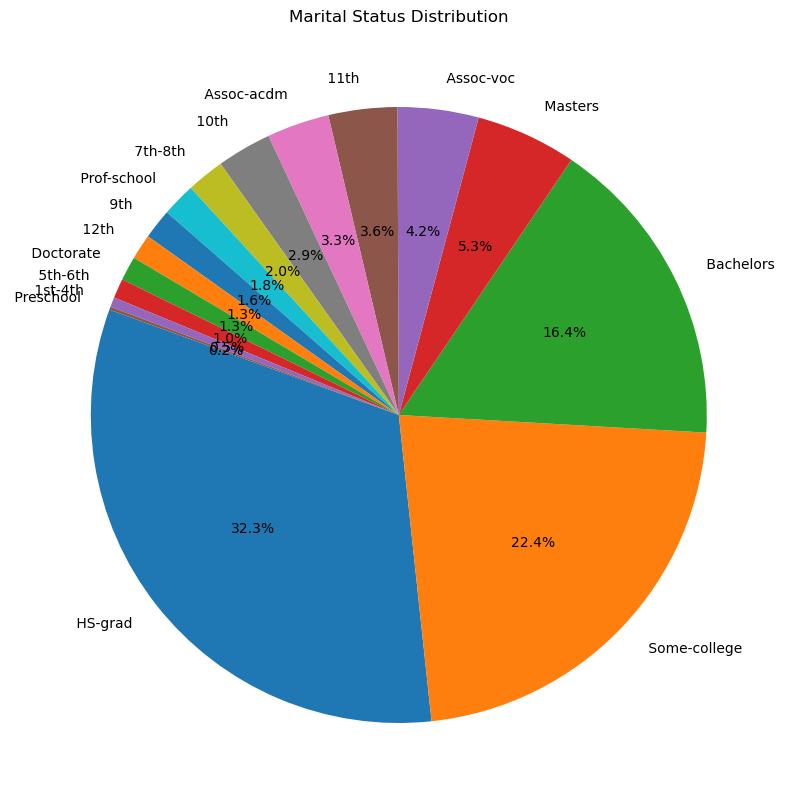

In [38]:
count_E = df['Education'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(count_E, labels=count_E.index, autopct='%1.1f%%', startangle=160)
plt.title('Marital Status Distribution')
plt.show()

#We can see that majority of the people are HS grad followed by some college and 16.% have higher Bacehlors degree and 5.3% with masters 

In [39]:
pd.crosstab(df['Education'], df['Income'])

Income          <=50K   >50K
Education                   
 10th             871     62
 11th            1115     60
 12th             400     33
 1st-4th          162      6
 5th-6th          317     16
 7th-8th          606     40
 9th              487     27
 Assoc-acdm       802    265
 Assoc-voc       1021    361
 Bachelors       3133   2221
 Doctorate        107    306
 HS-grad         8826   1675
 Masters          764    959
 Preschool         51      0
 Prof-school      153    423
 Some-college    5904   1387

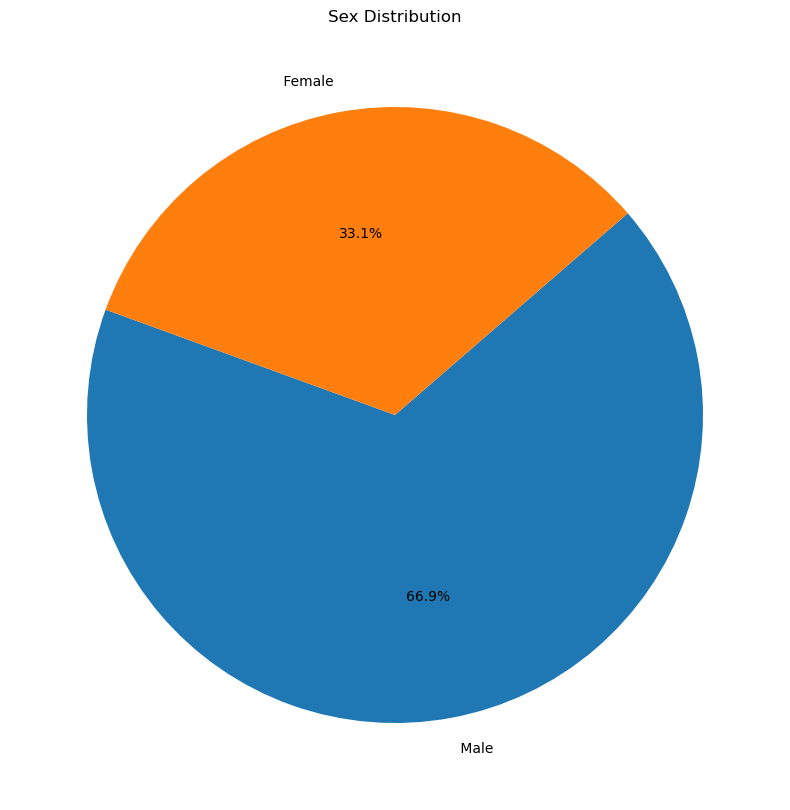

In [40]:
count_Sex = df['Sex'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(count_Sex, labels=count_Sex.index, autopct='%1.1f%%', startangle=160)
plt.title('Sex Distribution')
plt.show()

In [41]:
#66.9% are male in this dataset. 

In [42]:
pd.crosstab(df['Sex'], df['Income'])

Income    <=50K   >50K
Sex                   
 Female    9592   1179
 Male     15127   6662

In [43]:
#Males are more likely to have a higher salary compared to female (more than 50k)

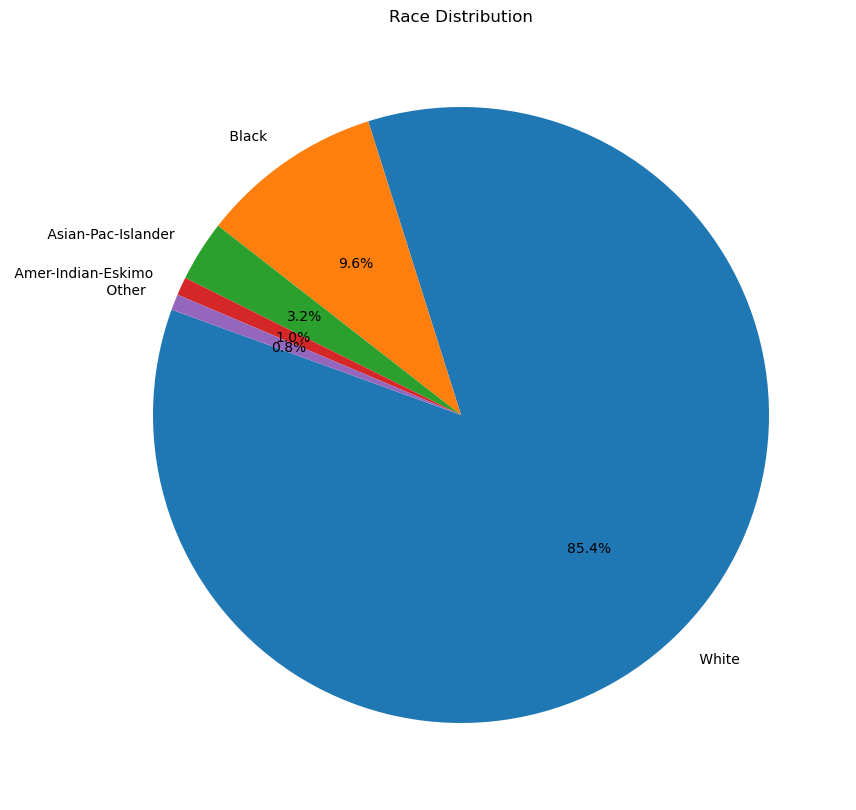

In [44]:
count_R = df['Race'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(count_R, labels=count_R.index, autopct='%1.1f%%', startangle=160)
plt.title('Race Distribution')
plt.show()

In [45]:
#85.4% are White

In [46]:
pd.crosstab(df['Race'], df['Income'])

Income                <=50K   >50K
Race                              
 Amer-Indian-Eskimo     275     36
 Asian-Pac-Islander     763    276
 Black                 2737    387
 Other                  246     25
 White                20698   7117

In [47]:
#Since we have more whites in this dataset, they tend to have higher numbers in both the categories

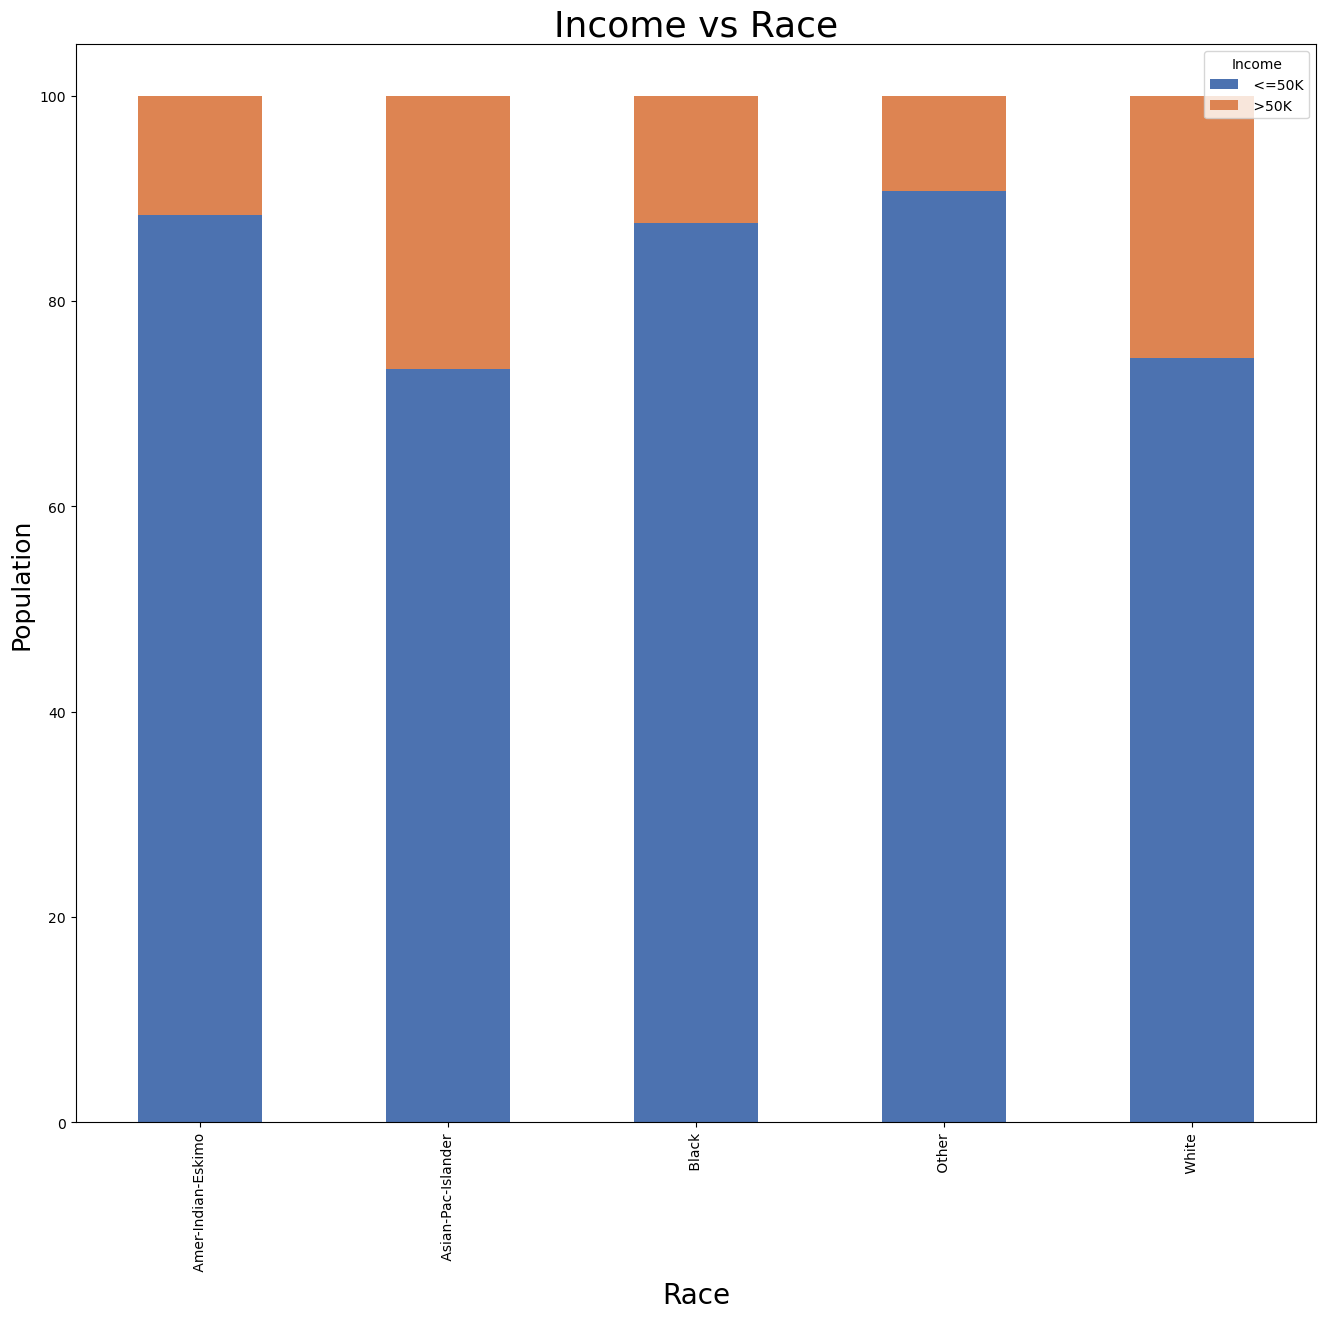

In [48]:
sns.set_palette('deep')
race_income = pd.crosstab(df['Race'], df['Income'])
(race_income.div(race_income.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(16,14))
plt.title('Income vs Race', fontsize=26, fontweight='light')
plt.xlabel('Race', fontsize=20,fontweight='light')
plt.ylabel('Population', fontsize=18,fontweight='light')
plt.xticks(fontweight ='light')
plt.show()

Since there are majority of the whites in the dataset, its sort of biased but we can see that with some of the other race data, asian-pac tends to have higher earning of more than 50k

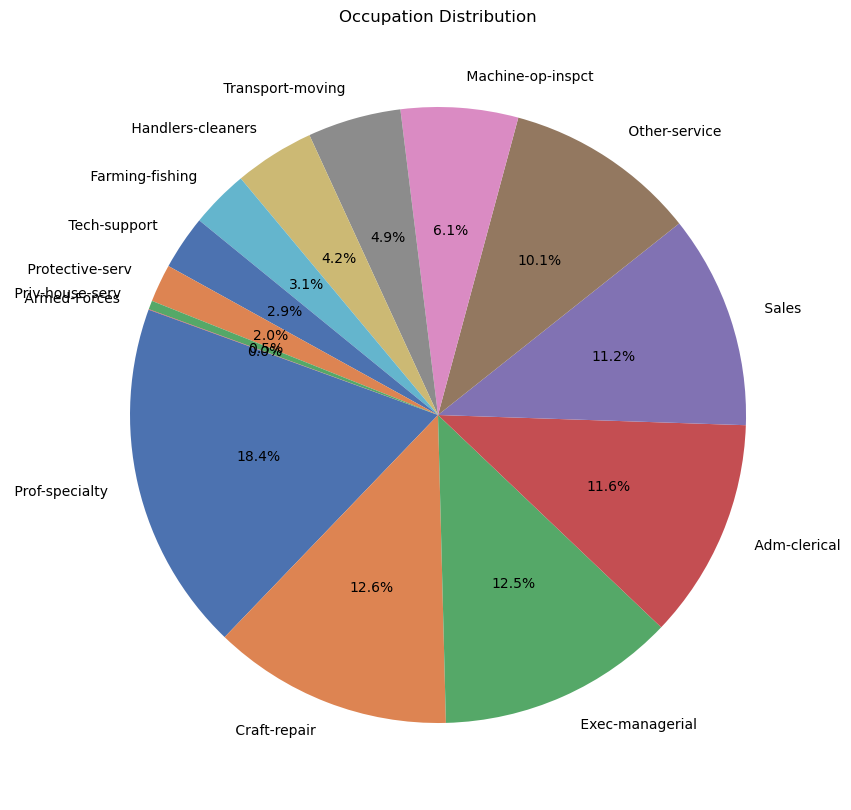

In [49]:
count_O = df['Occupation'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(count_O, labels=count_O.index, autopct='%1.1f%%', startangle=160)
plt.title('Occupation Distribution')
plt.show()

In [50]:
#Here we can see that majority of them are working under the prof-speciality category followed by craft-repair and then exec-managerial

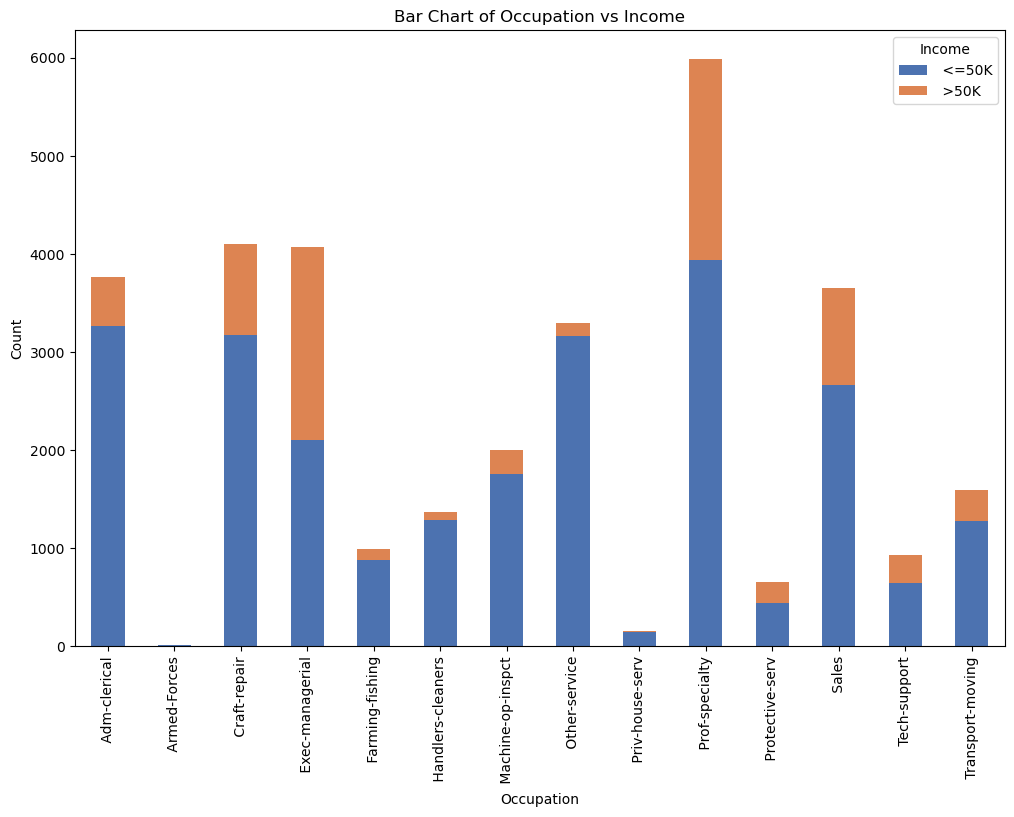

In [51]:
cat_col1 = 'Occupation'  
cat_col2 = 'Income' 
check_relation = pd.crosstab(df[cat_col1], df[cat_col2])
check_relation.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title(f'Bar Chart of {cat_col1} vs {cat_col2}')
plt.ylabel('Count')
plt.show()

In [52]:
#Executive managers earns more than 50k followed by prof-speciality

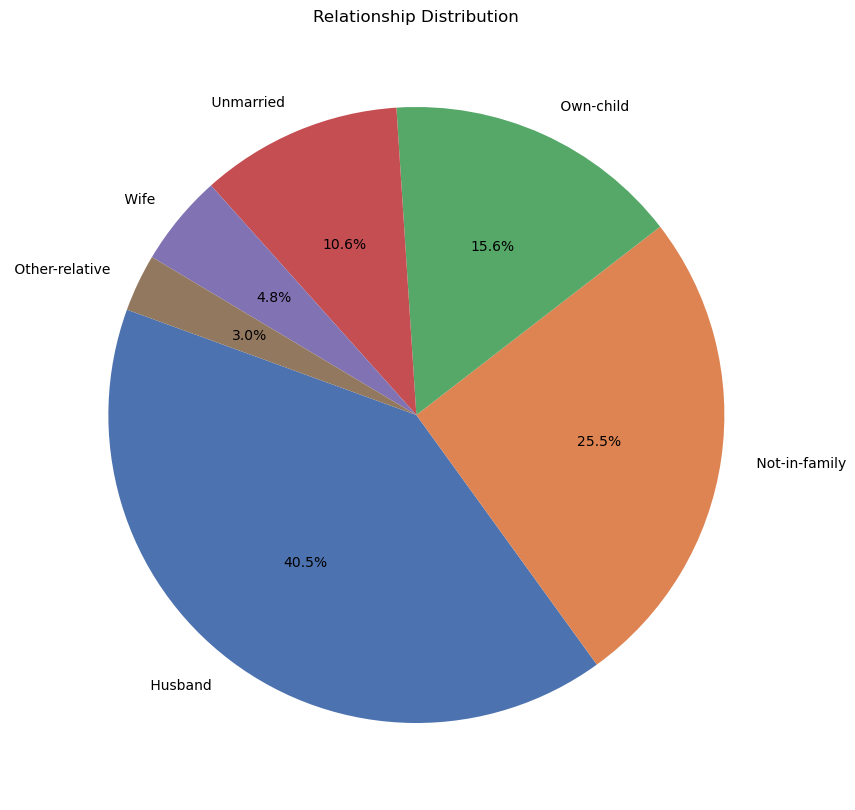

In [53]:
count_Relation = df['Relationship'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(count_Relation, labels=count_Relation.index, autopct='%1.1f%%', startangle=160)
plt.title('Relationship Distribution')
plt.show()

40.5% are male(husband) followed by not in family 

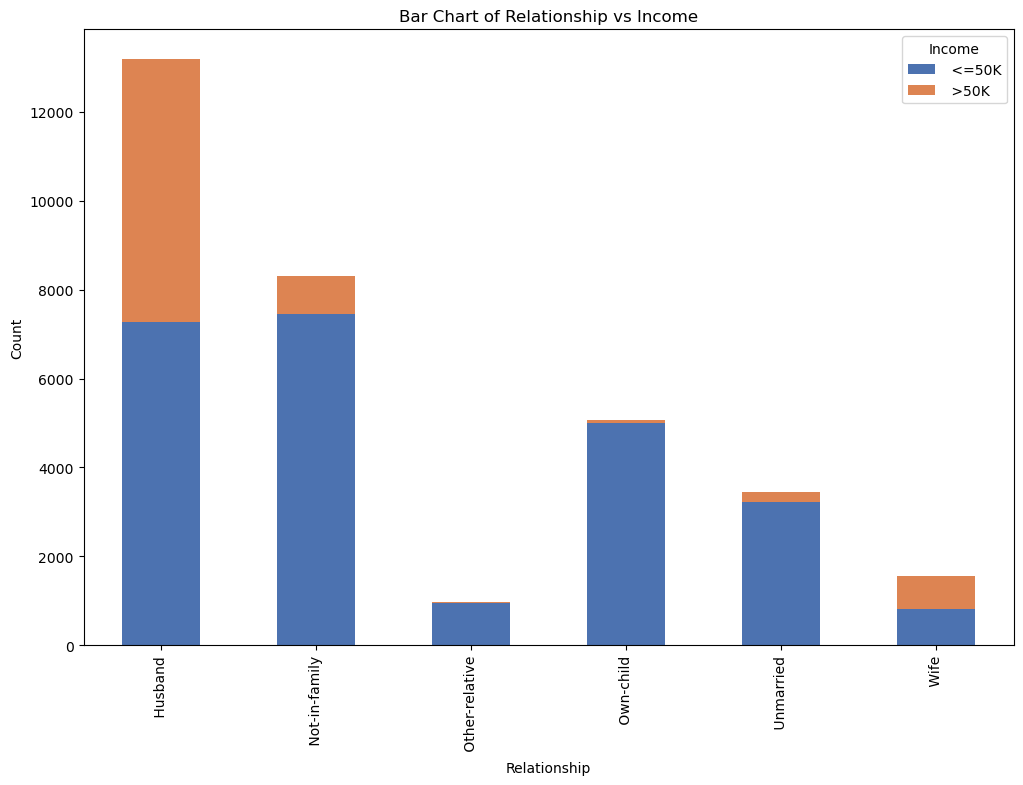

In [54]:
cat_col1 = 'Relationship'  
cat_col2 = 'Income' 
check_relation = pd.crosstab(df[cat_col1], df[cat_col2])
check_relation.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title(f'Bar Chart of {cat_col1} vs {cat_col2}')
plt.ylabel('Count')
plt.show()

#Since male are quite high in this dataset, husband here tends to earn well in both the groups. Not in family tends to earn under 50k. However, we can see that wives are more likely to earn in both the brackets. 

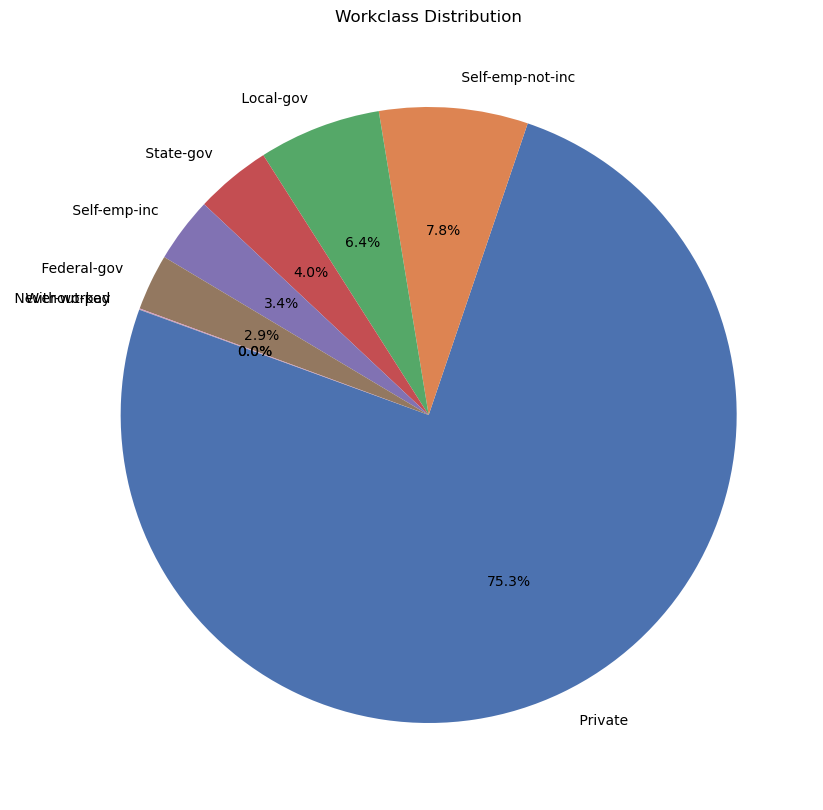

In [55]:
count_w = df['Workclass'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(count_w, labels=count_w.index, autopct='%1.1f%%', startangle=160)
plt.title('Workclass Distribution')
plt.show()

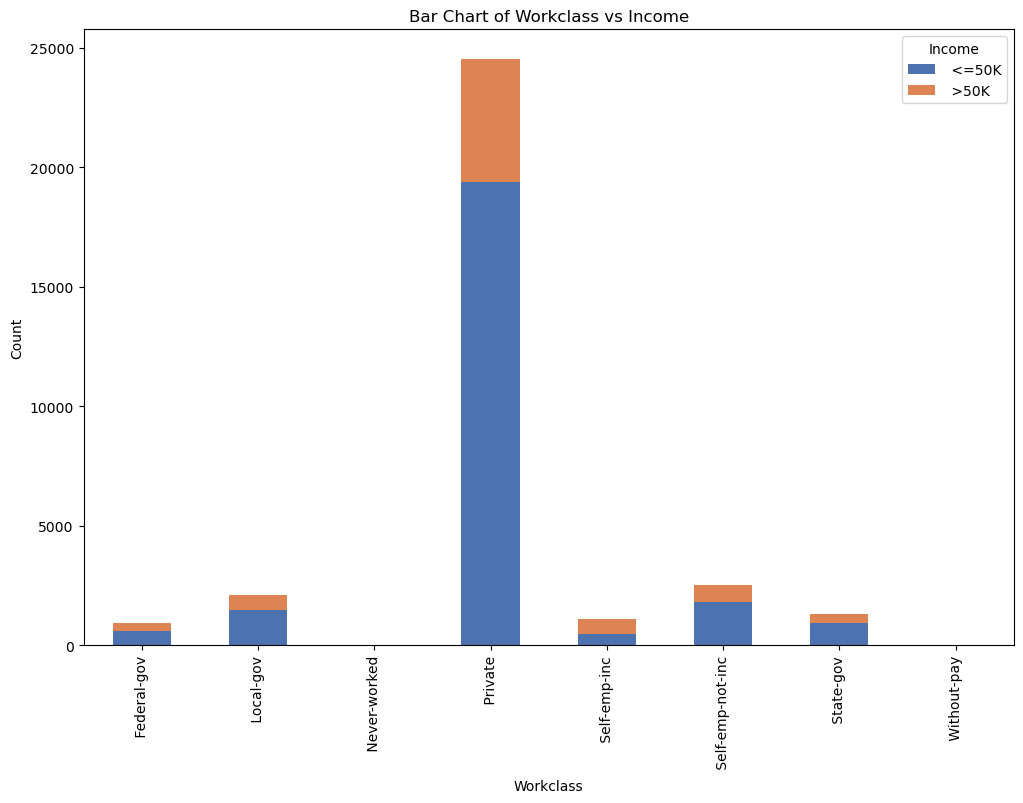

In [56]:
cat_col1 = 'Workclass'  
cat_col2 = 'Income' 
check_relation = pd.crosstab(df[cat_col1], df[cat_col2])
check_relation.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title(f'Bar Chart of {cat_col1} vs {cat_col2}')
plt.ylabel('Count')
plt.show()

In [57]:
#here we can see that majoirty of the people in this dataset work for private jobs but 24% actually earns more than 50k

In [58]:
pd.crosstab(df['Workclass'], df['Income'])

Income              <=50K   >50K
Workclass                       
 Federal-gov          589    371
 Local-gov           1476    617
 Never-worked           7      0
 Private            19378   5154
 Self-emp-inc         494    622
 Self-emp-not-inc    1817    724
 State-gov            944    353
 Without-pay           14      0

In [59]:
pd.set_option('display.max_rows', 100)
pd.crosstab(index=[df['Workclass'], df['Occupation']], columns=df['Income'])

Income                                 <=50K   >50K
Workclass         Occupation                       
 Federal-gov       Adm-clerical          216    101
                   Armed-Forces            8      1
                   Craft-repair           43     21
                   Exec-managerial        88     92
                   Farming-fishing         6      2
                   Handlers-cleaners      21      2
                   Machine-op-inspct      12      2
                   Other-service          32      3
                   Prof-specialty         80     95
                   Protective-serv        14     14
                   Sales                   9      5
                   Tech-support           43     25
                   Transport-moving       17      8
 Local-gov         Adm-clerical          250     33
                   Craft-repair          106     40
                   Exec-managerial       112    102
                   Farming-fishing        27      2
                   Handlers-cleaners      40      7
                   Machine-op-inspct      10      2
                   Other-service         181     12
                   Prof-specialty        451    254
                   Protective-serv       169    135
                   Sales                   4      3
                   Tech-support           23     15
                   Transport-moving      103     12
 Never-worked      Prof-specialty          7      0
 Private           Adm-clerical         2512    321
                   Craft-repair         2474    721
                   Exec-managerial      1396   1295
                   Farming-fishing       425     30
                   Handlers-cleaners    1200     73
                   Machine-op-inspct    1688    225
                   Other-service        2640    100
                   Priv-house-serv       148      1
                   Prof-specialty       2950   1199
                   Protective-serv       160     30
                   Sales                2258    684
                   Tech-support          515    221
                   Transport-moving     1012    254
 Self-emp-inc      Adm-clerical           22      9
                   Craft-repair           68     38
                   Exec-managerial       146    254
                   Farming-fishing        36     15
                   Handlers-cleaners       2      0
                   Machine-op-inspct       8      5
                   Other-service          21      6
                   Prof-specialty         39    121
                   Protective-serv         3      2
                   Sales                 131    160
                   Tech-support            1      2
                   Transport-moving       17     10
 Self-emp-not-inc  Adm-clerical           34     16
                   Craft-repair          436     95
                   Exec-managerial       248    144
                   Farming-fishing       366     64
                   Handlers-cleaners      12      3
                   Machine-op-inspct      25     11
                   Other-service         163     12
                   Prof-specialty        163    210
                   Protective-serv         5      1
                   Sales                 257    128
                   Tech-support           15     11
                   Transport-moving       93     29
 State-gov         Adm-clerical          225     27
                   Craft-repair           42     14
                   Exec-managerial       108     81
                   Farming-fishing        13      2
                   Handlers-cleaners       8      1
                   Machine-op-inspct       8      5
                   Other-service         120      4
                   Prof-specialty        243    171
                   Protective-serv        87     29
                   Sales                   8      3
                   Tech-support           48      9
                   Transport-moving       34    

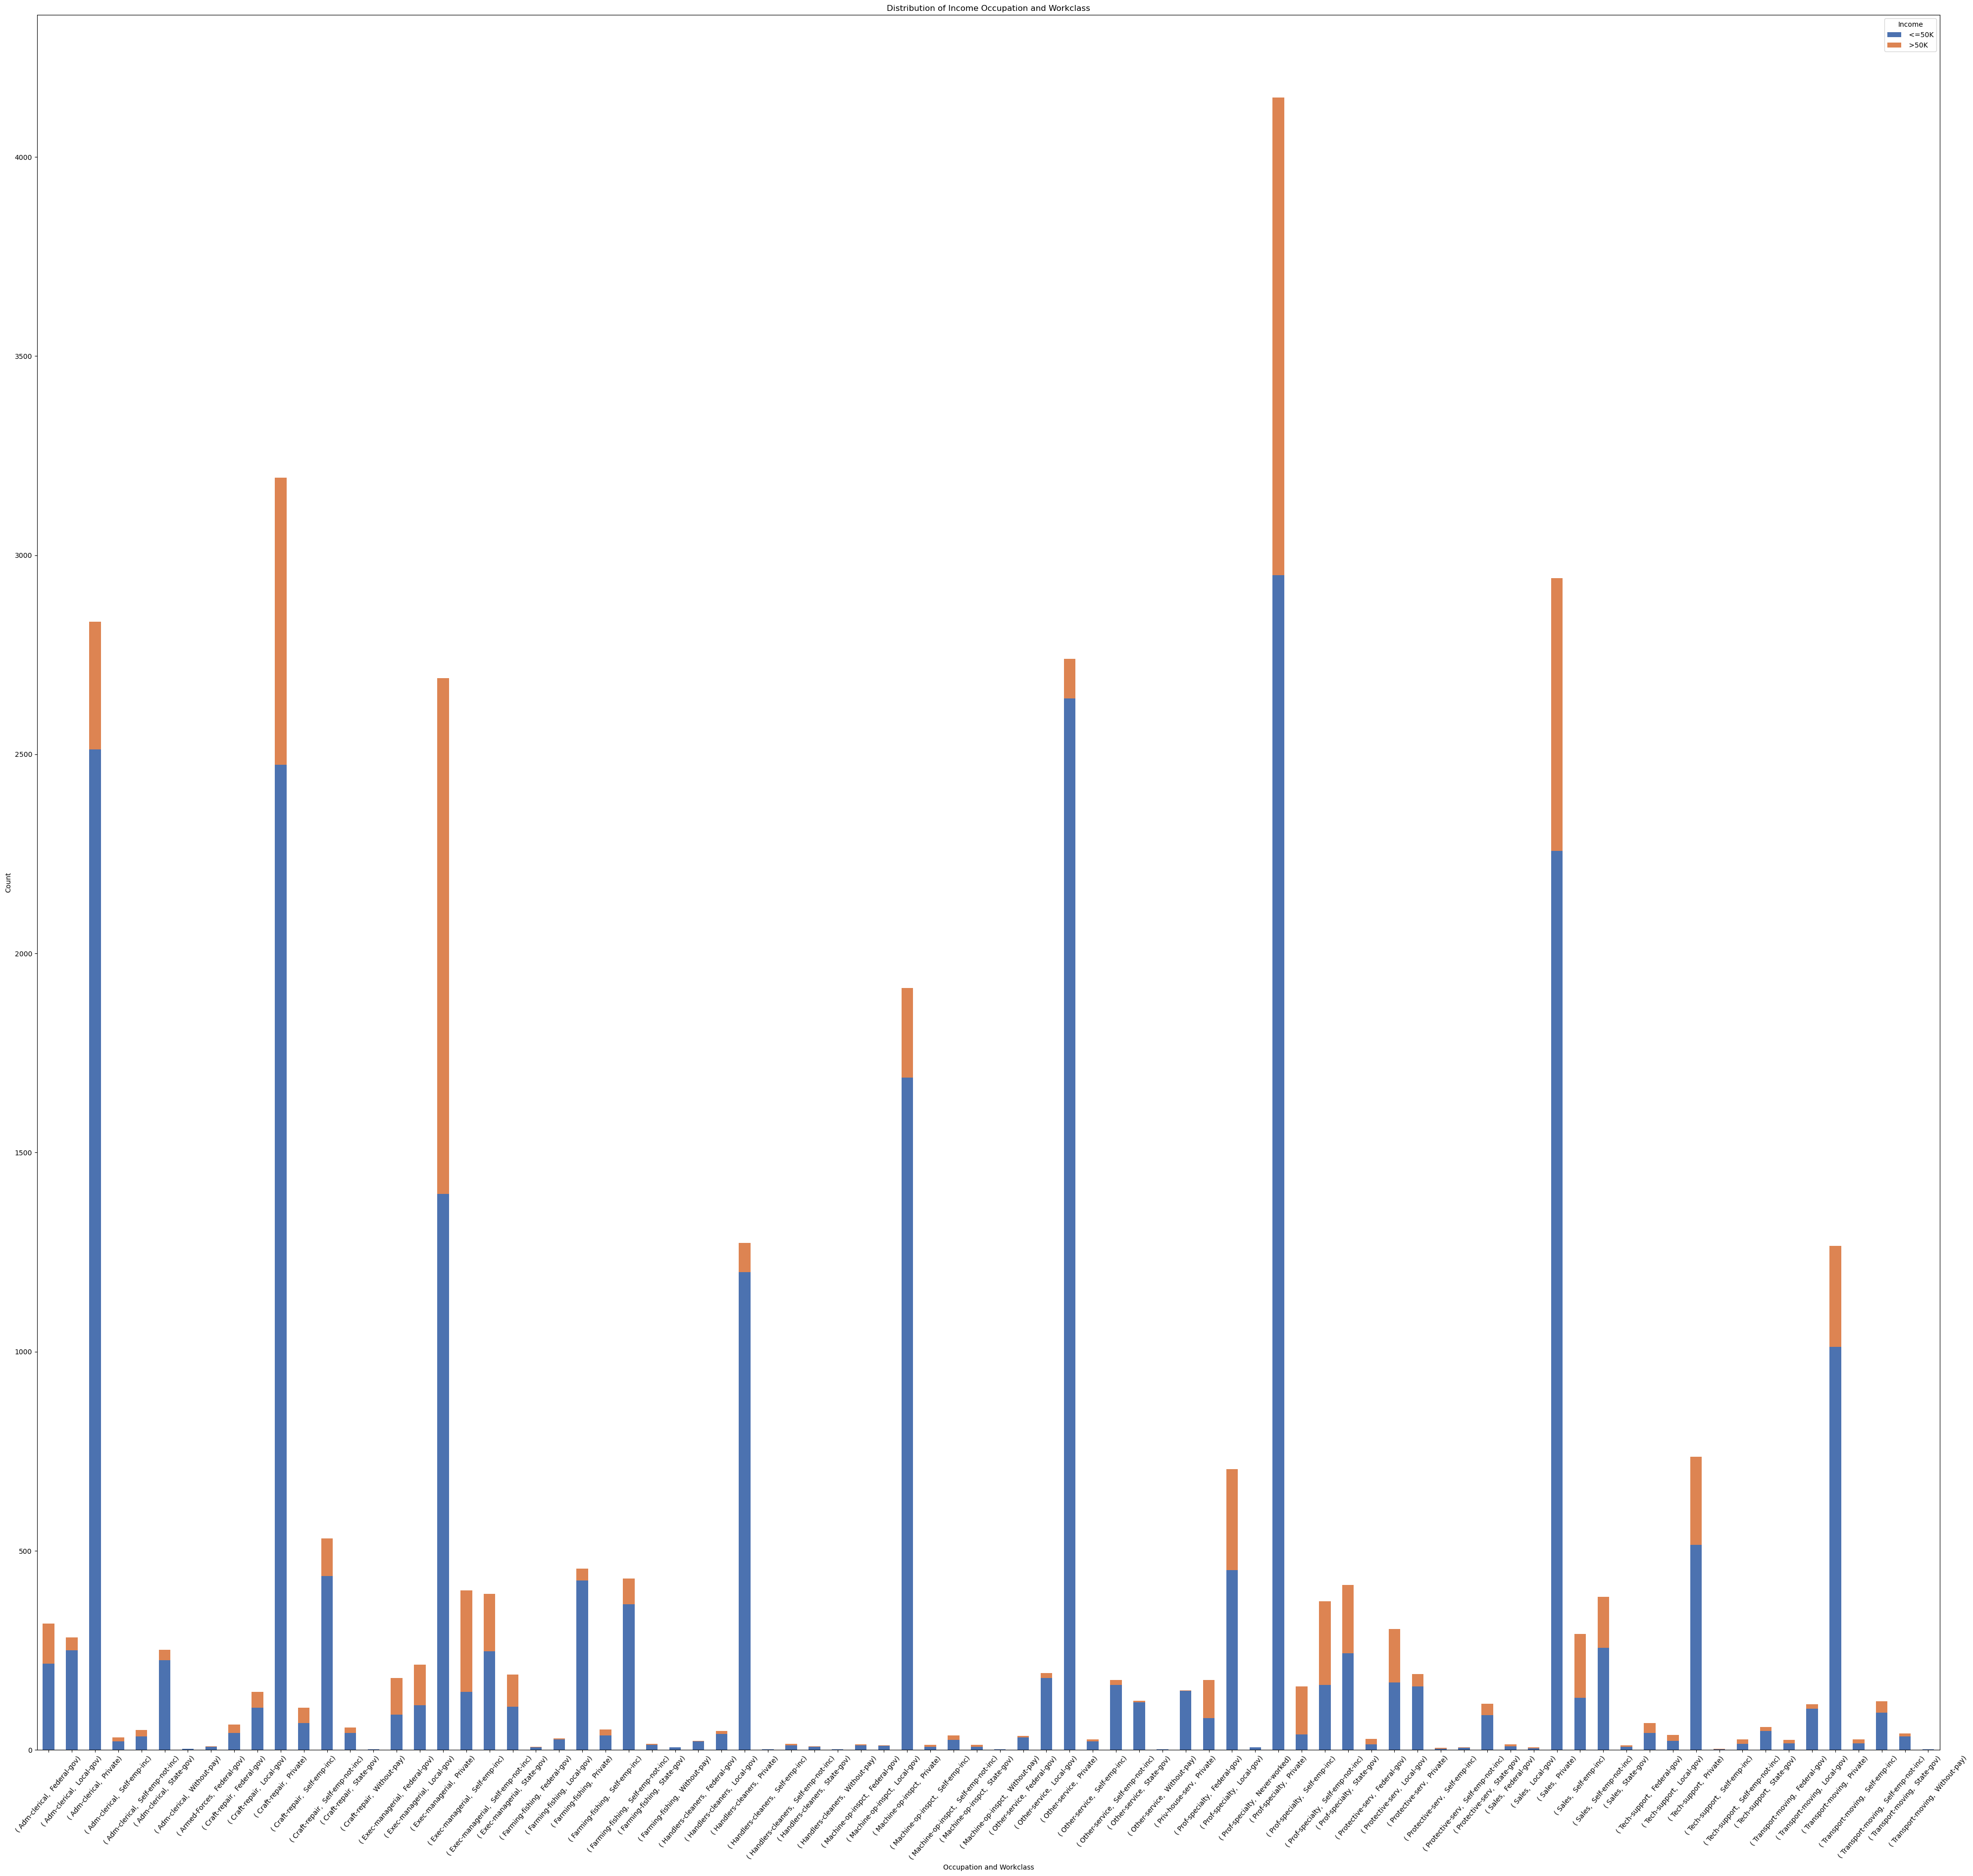

In [60]:
c = pd.crosstab(index=[df['Occupation'], df['Workclass']], columns=df['Income'])
c.plot(kind='bar', figsize=(40, 38), stacked=True) 
plt.title('Distribution of Income Occupation and Workclass')
plt.ylabel('Count')
plt.xlabel('Occupation and Workclass')
plt.xticks(rotation=50) 
plt.legend(title='Income')
plt.tight_layout()
plt.show()

In [61]:
#We can even divide income in accordance with age. 

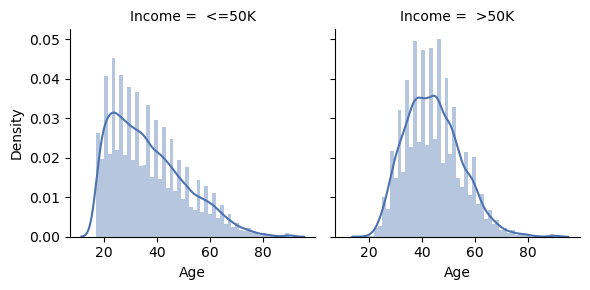

In [62]:
x=sns.FacetGrid(df,col='Income')
x.map(sns.distplot,'Age')
plt.show()

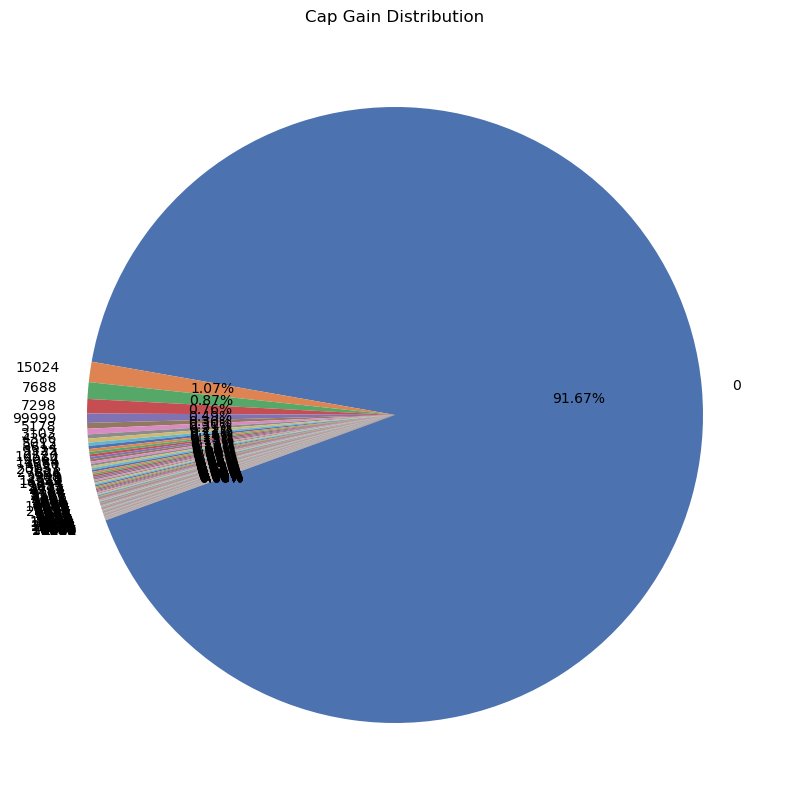

In [63]:
count_cg = df['Capital_gain'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(count_cg, labels=count_cg.index, autopct='%2.2f%%', startangle=200)
plt.title('Cap Gain Distribution')
plt.show()

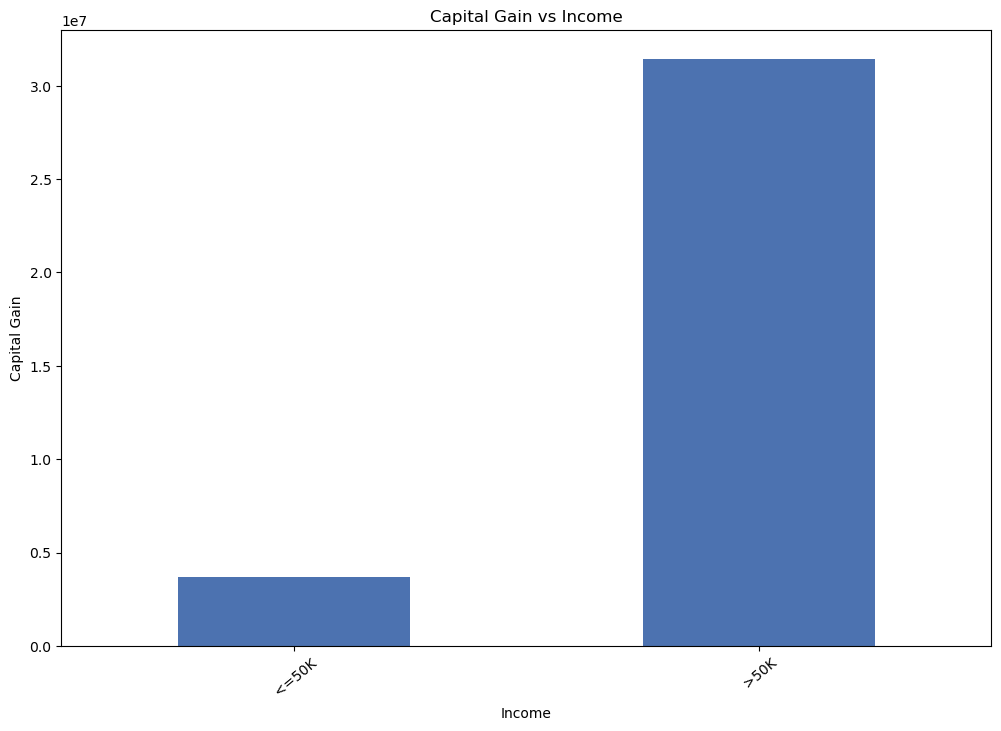

In [64]:
cg_by_income = df.groupby('Income')['Capital_gain'].sum()
cg_by_income .plot(kind='bar', figsize=(12, 8))
plt.title('Capital Gain vs Income')
plt.ylabel('Capital Gain')
plt.xlabel('Income')
plt.xticks(rotation=40)
plt.show()

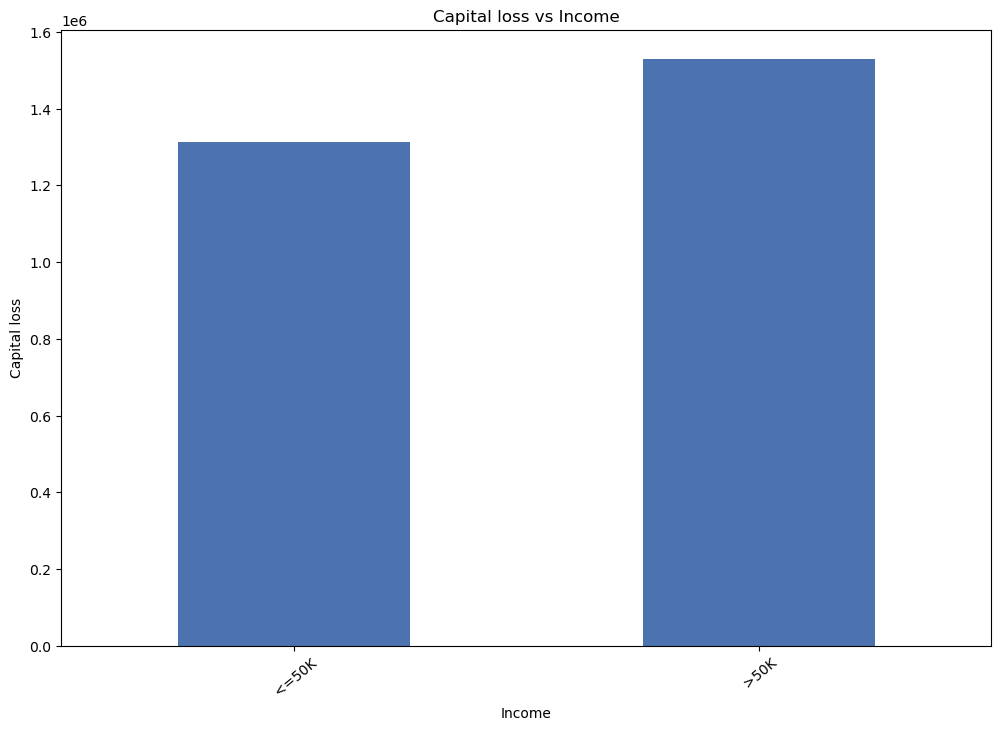

In [65]:
cg_by_income = df.groupby('Income')['Capital_loss'].sum()
cg_by_income .plot(kind='bar', figsize=(12, 8))
plt.title('Capital loss vs Income')
plt.ylabel('Capital loss')
plt.xlabel('Income')
plt.xticks(rotation=40)
plt.show()

In [66]:
bins = [0, 1000, 5000, 10000, 20000, 50000,60000,70000,80000, 100000]
labels = ['0','1K-5K', '5K-10K', '10K-20K', '20K-50K', '50-60K', '60-70K', '70-80K', '80K+']
df['Capital_GainB'] = pd.cut(df['Capital_gain'], bins=bins, labels=labels, right=False)
capital_gains = pd.crosstab(df['Capital_GainB'], df['Race'])

In [67]:
capital_gains

Race            Amer-Indian-Eskimo   Asian-Pac-Islander   Black   Other  \
Capital_GainB                                                             
0                              286                  956    2950     259   
1K-5K                           12                   32      78       5   
5K-10K                           6                   24      51       5   
10K-20K                          6                   16      32       0   
20K-50K                          1                    1       6       0   
80K+                             0                   10       7       2   

Race            White  
Capital_GainB          
0               25453  
1K-5K             881  
5K-10K            792  
10K-20K           463  
20K-50K            86  
80K+              140

In [68]:
pd.crosstab(df['Capital_GainB'], df['Education'])

Education       10th   11th   12th   1st-4th   5th-6th   7th-8th   9th  \
Capital_GainB                                                            
0                895   1127    414       163       319       605   487   
1K-5K             28     27     11         4         9        33    24   
5K-10K             5     17      5         1         5         7     2   
10K-20K            1      4      3         0         0         1     0   
20K-50K            2      0      0         0         0         0     0   
80K+               2      0      0         0         0         0     1   

Education       Assoc-acdm   Assoc-voc   Bachelors   Doctorate   HS-grad  \
Capital_GainB                                                              
0                      985        1250        4725         338      9836   
1K-5K                   33          61         143          11       358   
5K-10K                  30          49         248          16       208   
10K-20K                 16          18         175          25        66   
20K-50K                  2           3          22          11        10   
80K+                     1           1          41          12        23   

Education       Masters   Preschool   Prof-school   Some-college  
Capital_GainB                                                     
0                  1451          49           427           6833  
1K-5K                48           1            12            205  
5K-10K              102           0            16            167  
10K-20K              88           0            60             60  
20K-50K              16           1            15             12  
80K+                 18           0            46             14

In [69]:
pd.crosstab(df['Capital_GainB'], df['Workclass'])

Workclass       Federal-gov   Local-gov   Never-worked   Private  \
Capital_GainB                                                      
0                       866        1906              7     22721   
1K-5K                    28          71              0       748   
5K-10K                   46          83              0       584   
10K-20K                  18          24              0       340   
20K-50K                   1           3              0        53   
80K+                      1           6              0        86   

Workclass       Self-emp-inc   Self-emp-not-inc   State-gov   Without-pay  
Capital_GainB                                                              
0                        916               2282        1194            12  
1K-5K                     24                101          34             2  
5K-10K                    57                 64          44             0  
10K-20K                   67                 48          20             0  
20K-50K                   16                 17           4             0  
80K+                      36                 29           1             0

In [70]:
#We can see that capital gain is more apparent for private, self-emp-inc & Self-emp-not-inc

In [71]:
pd.crosstab(df['Capital_GainB'], df['Sex'])

Sex             Female   Male
Capital_GainB                
0                10176  19728
1K-5K              300    708
5K-10K             154    724
10K-20K             98    419
20K-50K             21     73
80K+                22    137

In [72]:
#Higher gains are experienced by male compared to female but again, the dataset is quite biased.

In [73]:
bins = [0, 100, 500, 1000, 1500, 2500, 3000, 4000, 5000]
labels = ['0', '100-499', '500-999', '1000-1499', '1500-2499', '2500-2999', '3000-3999', '4000-4999']
df['Capital_LossB'] = pd.cut(df['Capital_loss'], bins=bins, labels=labels, include_lowest=True)
capital_losses = pd.crosstab(df['Capital_LossB'], df['Race'])
print(capital_losses)

Race            Amer-Indian-Eskimo   Asian-Pac-Islander   Black   Other  \
Capital_LossB                                                             
0                              305                  985    3021     261   
100-499                          0                    1       1       0   
500-999                          0                    0       3       1   
1000-1499                        1                    4       4       0   
1500-2499                        5                   49      91       9   
2500-2999                        0                    0       2       0   
3000-3999                        0                    0       1       0   
4000-4999                        0                    0       1       0   

Race            White  
Capital_LossB          
0               26469  
100-499             9  
500-999            21  
1000-1499          91  
1500-2499        1185  
2500-2999          31  
3000-3999           7  
4000-4999           2  


In [74]:
pd.crosstab(df['Capital_LossB'], df['Sex'])

Sex             Female   Male
Capital_LossB                
0                10402  20639
100-499              8      3
500-999             20      5
1000-1499           25     75
1500-2499          296   1043
2500-2999           11     22
3000-3999            6      2
4000-4999            3      0

In [75]:
pd.crosstab(df['Capital_LossB'], df['Education'])

Education       10th   11th   12th   1st-4th   5th-6th   7th-8th   9th  \
Capital_LossB                                                            
0                905   1142    425       164       322       623   505   
100-499            1      1      0         0         0         0     0   
500-999            0      1      0         0         0         1     1   
1000-1499          1      3      0         0         0         1     0   
1500-2499         22     26      8         3        10        20     8   
2500-2999          3      2      0         1         1         0     0   
3000-3999          1      0      0         0         0         1     0   
4000-4999          0      0      0         0         0         0     0   

Education       Assoc-acdm   Assoc-voc   Bachelors   Doctorate   HS-grad  \
Capital_LossB                                                              
0                     1012        1328        5016         360     10098   
100-499                  0           0           2           0         2   
500-999                  3           2           4           0         9   
1000-1499                6           3          25           1        26   
1500-2499               45          48         302          47       358   
2500-2999                1           1           5           3         4   
3000-3999                0           0           0           2         2   
4000-4999                0           0           0           0         2   

Education       Masters   Preschool   Prof-school   Some-college  
Capital_LossB                                                     
0                  1574          49           512           7006  
100-499               3           0             0              2  
500-999               0           0             0              4  
1000-1499             4           0             2             28  
1500-2499           137           2            58            245  
2500-2999             5           0             4              3  
3000-3999             0           0             0              2  
4000-4999             0           0             0              1

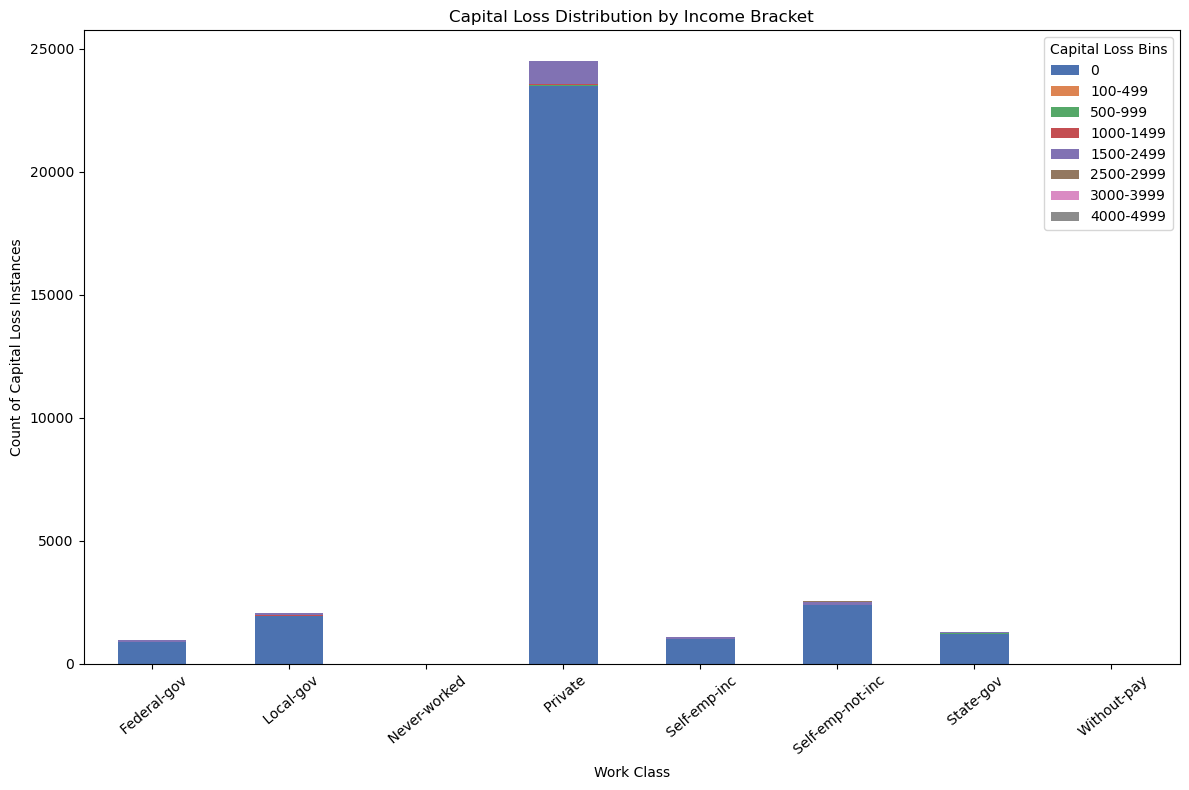

In [76]:
cg_by_income = df.groupby('Workclass')['Capital_LossB'].value_counts().unstack()
cg_by_income.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Capital Loss Distribution by Income Bracket')
plt.ylabel('Count of Capital Loss Instances')
plt.xlabel('Work Class')
plt.xticks(rotation=40)
plt.legend(title='Capital Loss Bins')
plt.tight_layout()
plt.show()

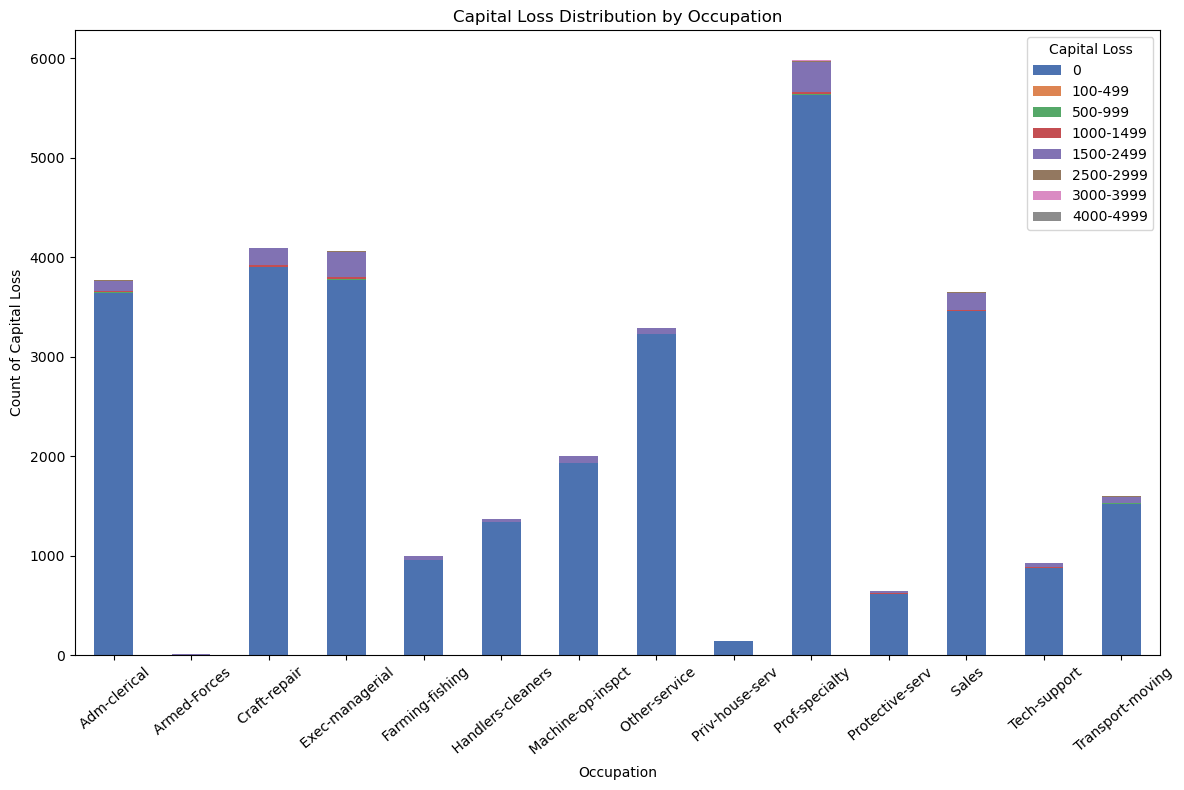

In [77]:
cg_by_occupation = df.groupby('Occupation')['Capital_LossB'].value_counts().unstack()
cg_by_occupation.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Capital Loss Distribution by Occupation')
plt.ylabel('Count of Capital Loss')
plt.xlabel('Occupation')
plt.xticks(rotation=40)
plt.legend(title='Capital Loss')
plt.tight_layout()
plt.show()

In [78]:
#We can see that exec-managerial, prof-special & craft repair has experienced a capital loss

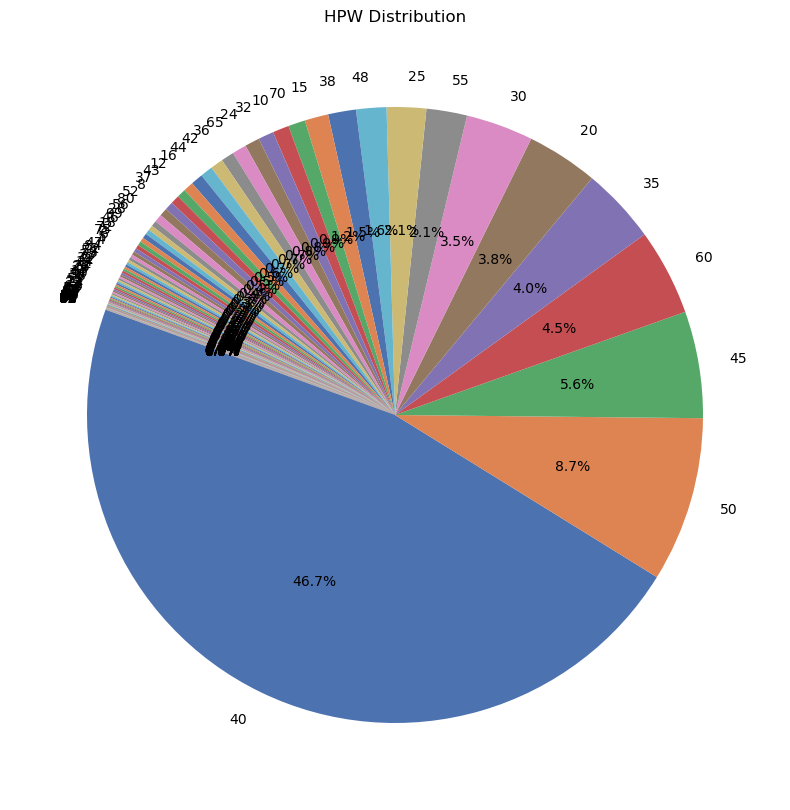

In [79]:
count_HPW = df['Hours_per_week'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(count_HPW, labels=count_HPW.index, autopct='%1.1f%%', startangle=160)
plt.title('HPW Distribution')
plt.show()

In [80]:
#As we can see majority of the people work 40 hours 

In [81]:
bins = [0,10,20,30,40,50,60,70,80,90] 
labels = ['0', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+'] 
df['Hours_per_week_B'] = pd.cut(df['Hours_per_week'], bins=bins, labels=labels, include_lowest=True)

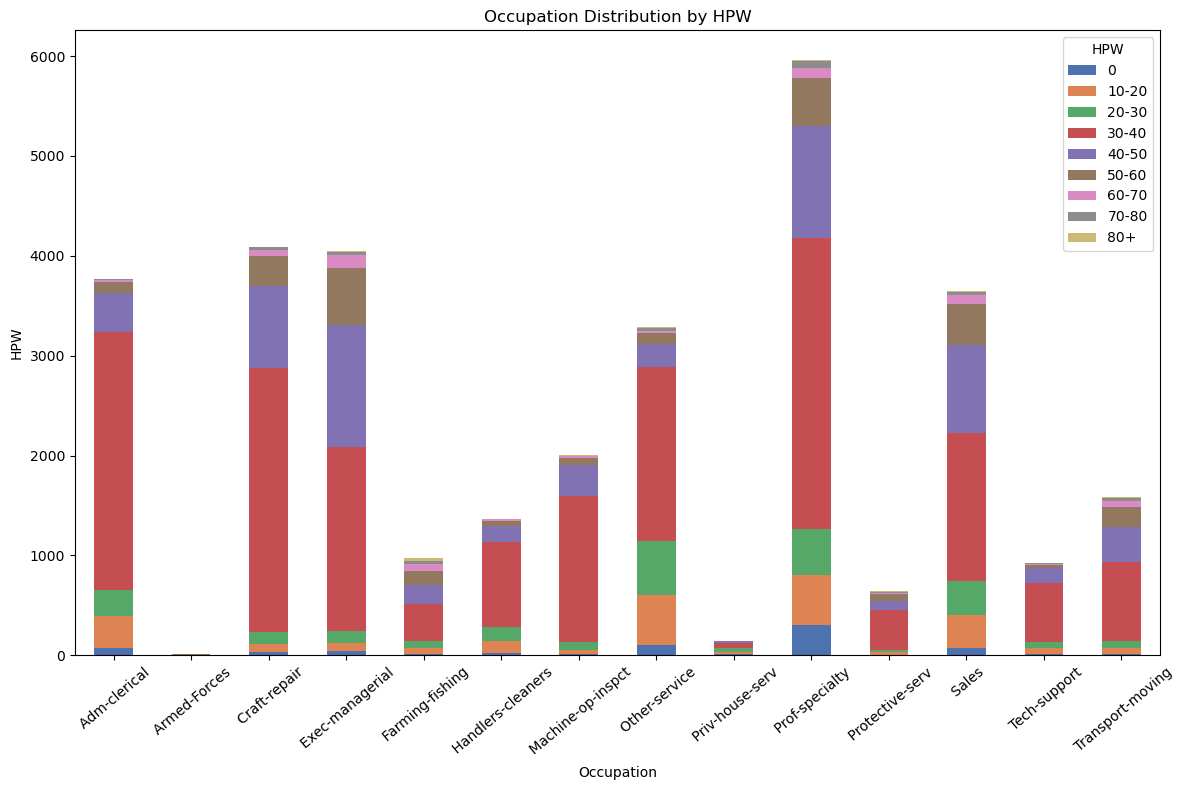

In [82]:
cg_by_occupation = df.groupby('Occupation')['Hours_per_week_B'].value_counts().unstack()
cg_by_occupation.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Occupation Distribution by HPW')
plt.ylabel('HPW')
plt.xlabel('Occupation')
plt.xticks(rotation=40)
plt.legend(title='HPW')
plt.tight_layout()
plt.show()

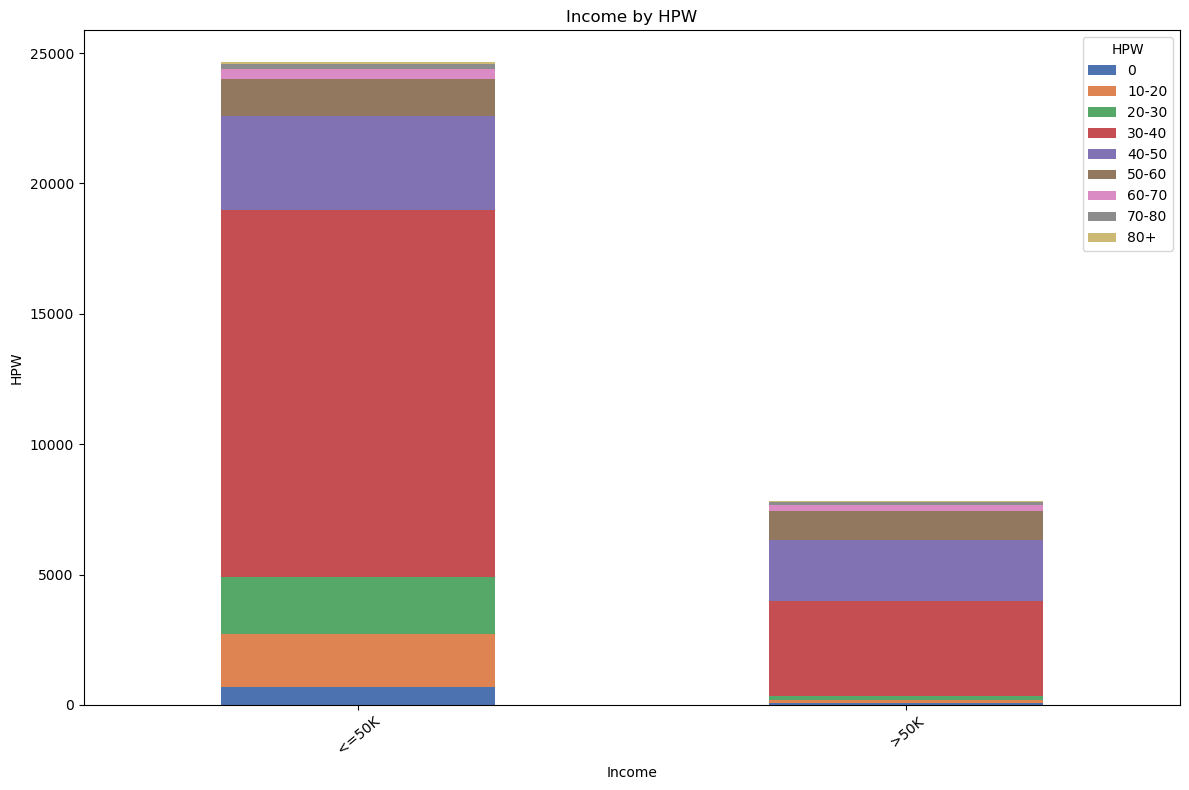

In [83]:
cg_by_Income = df.groupby('Income')['Hours_per_week_B'].value_counts().unstack()
cg_by_Income.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Income by HPW')
plt.ylabel('HPW')
plt.xlabel('Income')
plt.xticks(rotation=40)
plt.legend(title='HPW')
plt.tight_layout()
plt.show()

In [84]:
#Here there is no much to conclude via looking at the hours per week 

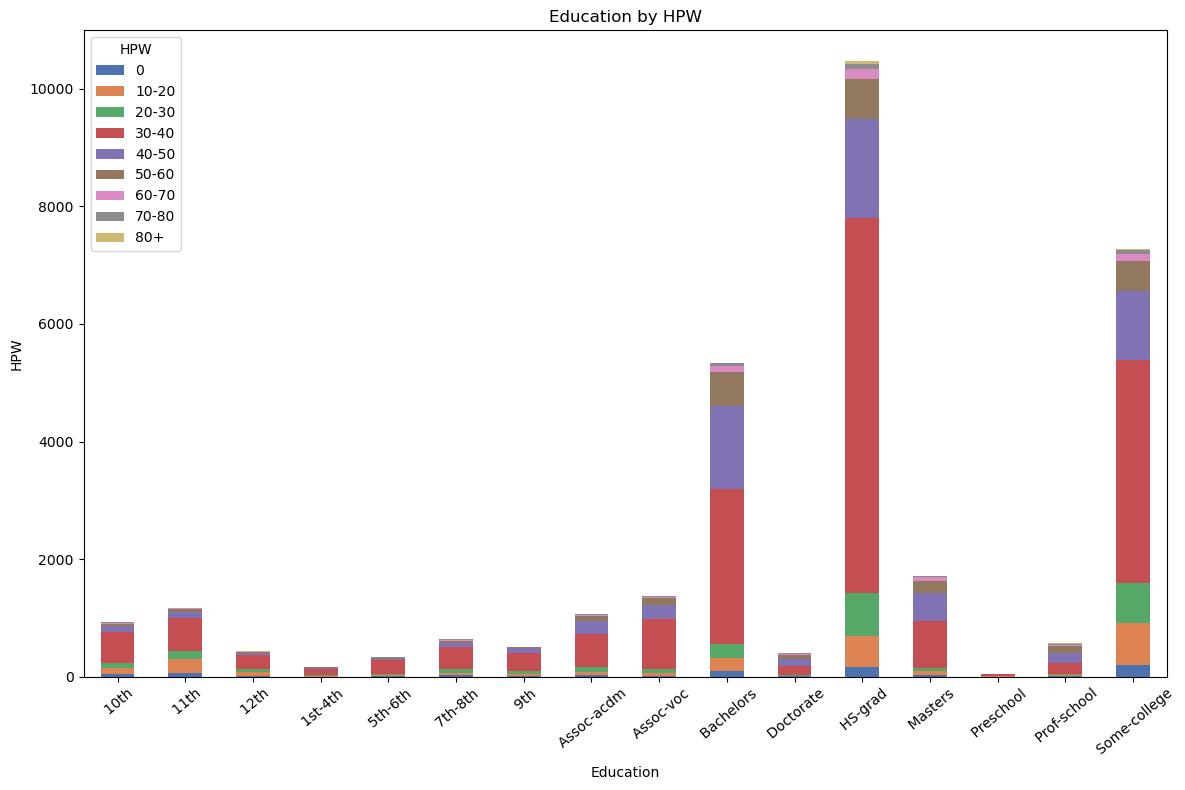

In [85]:
cg_by_Education = df.groupby('Education')['Hours_per_week_B'].value_counts().unstack()
cg_by_Education.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Education by HPW')
plt.ylabel('HPW')
plt.xlabel('Education')
plt.xticks(rotation=40)
plt.legend(title='HPW')
plt.tight_layout()
plt.show()

In [86]:
#We can see that almost every one does work for 30-40 hours but people with HS-grad, some college, Bachelors and over does work more hours

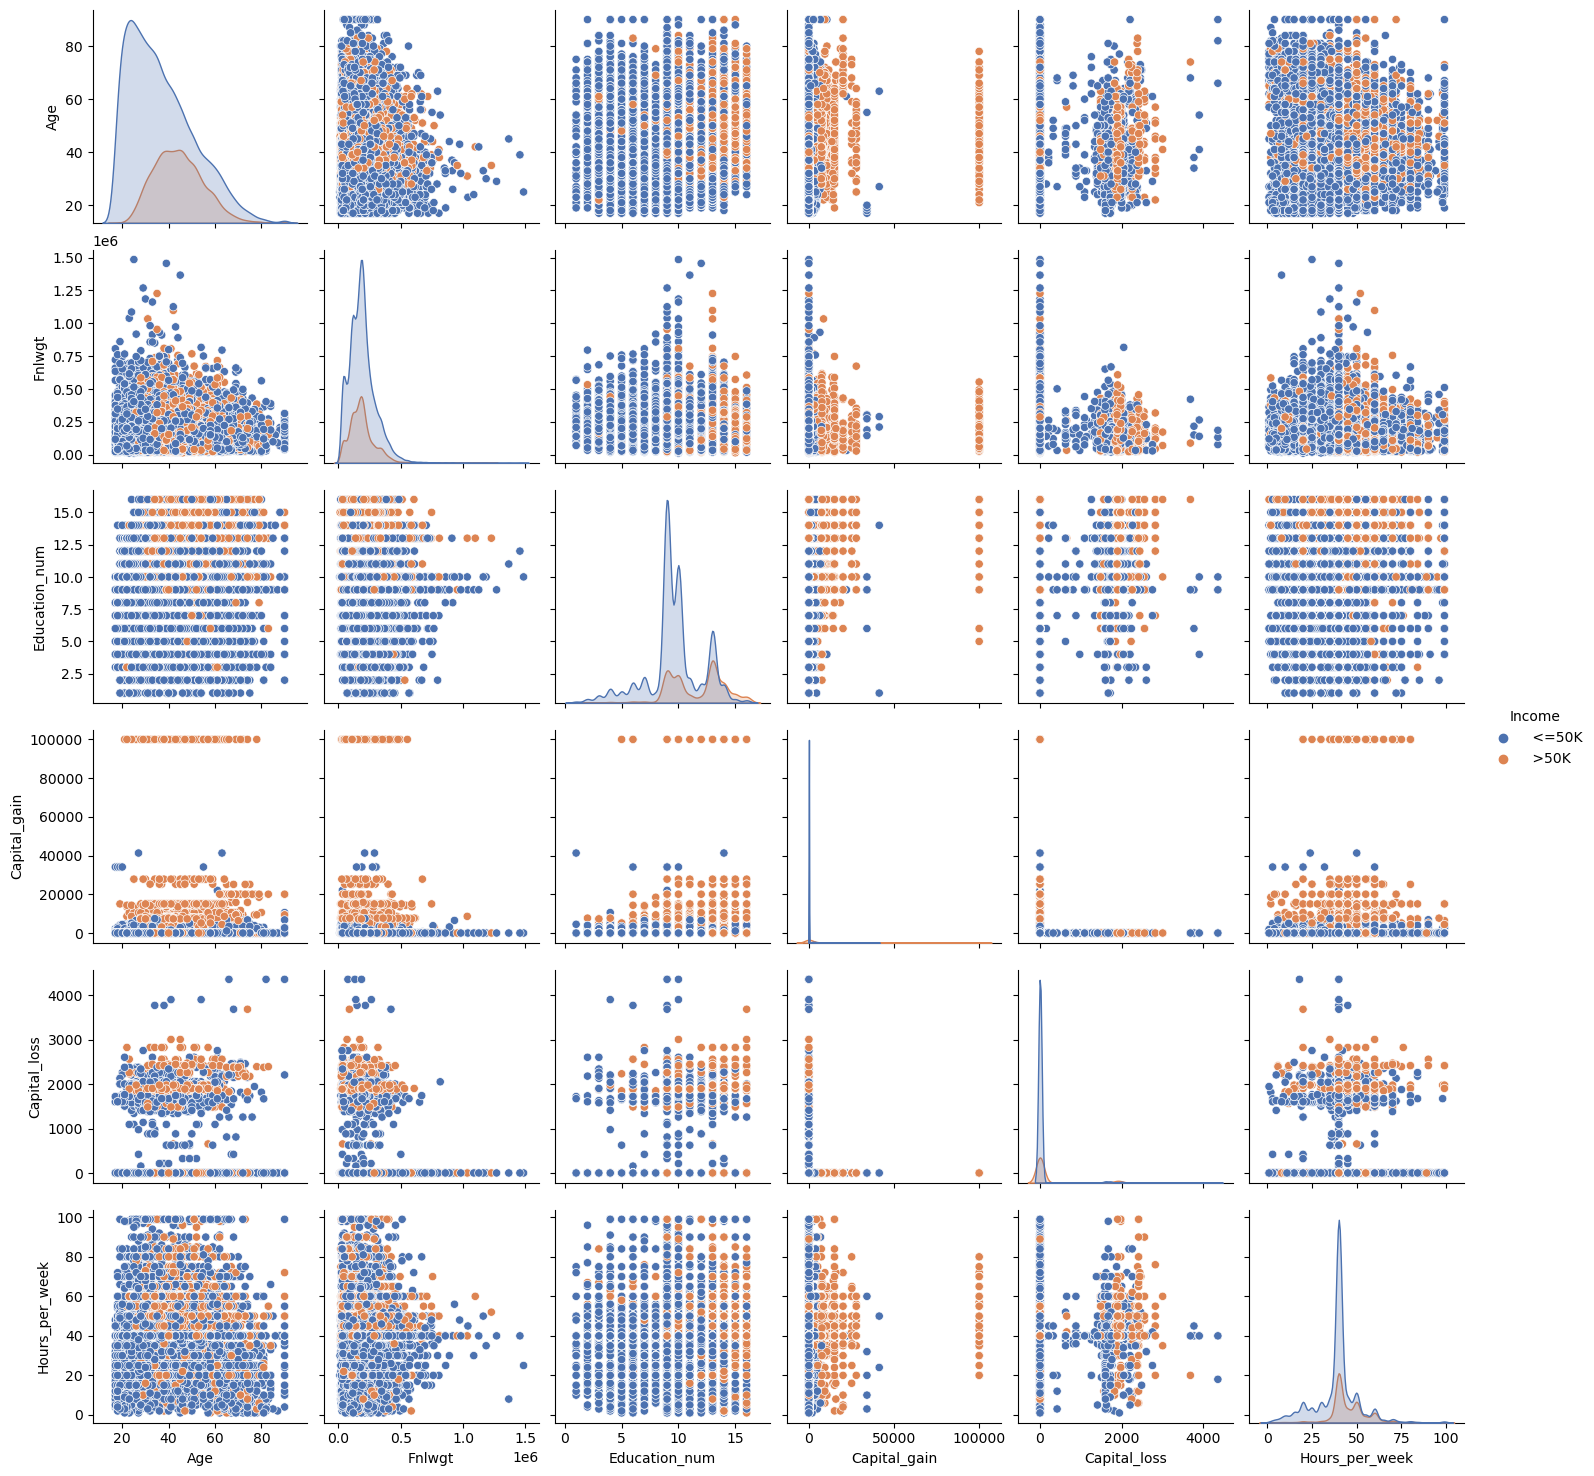

In [87]:
sns.pairplot(df,hue="Income")

In [88]:
#Removing unnecessary columns

In [89]:
df.drop(["Fnlwgt", "Education"], axis=1, inplace=True)

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
LE = LabelEncoder()
categorical_columns = ['Workclass', 'Sex', 'Relationship', 'Marital_status', 'Occupation', 'Race', 'Native_country', 'Income']
for col in categorical_columns:
    df[col] = LE.fit_transform(df[col])

In [92]:
df.head(10)

Age  Workclass  Education_num  Marital_status  Occupation  Relationship  \
0   50          5             13               2           3             0   
1   38          3              9               0           5             1   
2   53          3              7               2           5             0   
3   28          3             13               2           9             5   
4   37          3             14               2           3             5   
5   49          3              5               3           7             1   
6   52          5              9               2           3             0   
7   31          3             14               4           9             1   
8   42          3             13               2           3             0   
9   37          3             10               2           3             0   

   Race  Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0     4    1             0             0              13              38   
1     4    1             0             0              40              38   
2     2    1             0             0              40              38   
3     2    0             0             0              40               4   
4     4    0             0             0              40              38   
5     2    0             0             0              16              22   
6     4    1             0             0              45              38   
7     4    0         14084             0              50              38   
8     4    1          5178             0              40              38   
9     2    1             0             0              80              38   

   Income Age_group Capital_GainB Capital_LossB Hours_per_week_B  
0       0     50-59             0             0            10-20  
1       0     30-39             0             0            30-40  
2       0     50-59             0             0            30-40  
3       0     19-29             0             0            30-40  
4       0     30-39             0             0            30-40  
5       0     40-49             0             0            10-20  
6       1     50-59             0             0            40-50  
7       1     30-39       10K-20K             0            40-50  
8       1     40-49        5K-10K             0            30-40  
9       1     30-39             0             0            70-80

In [93]:
df.drop(["Hours_per_week_B", "Capital_GainB", "Capital_LossB", "Age_group"], axis=1, inplace=True)

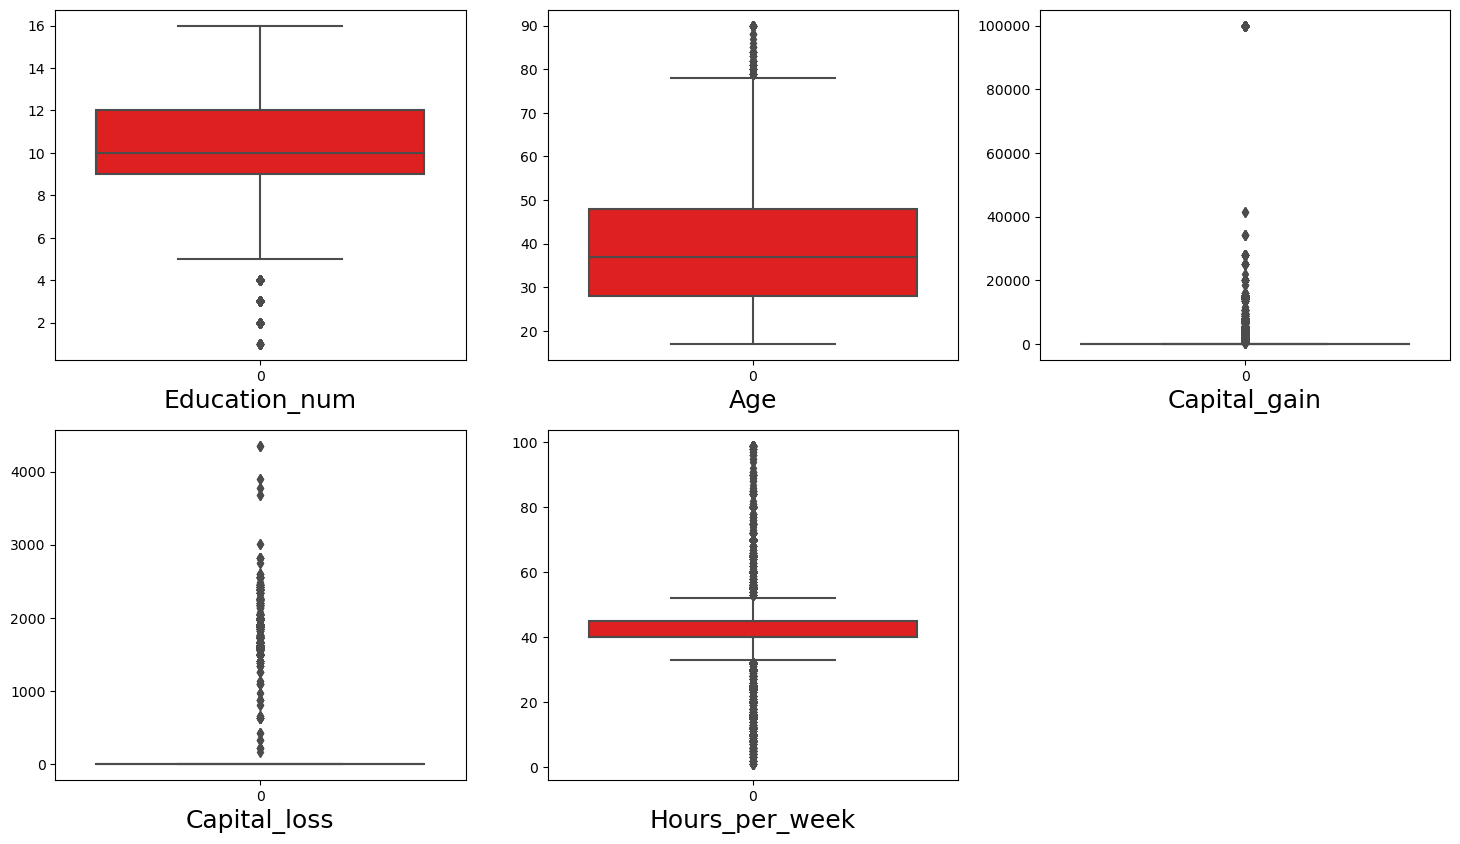

In [94]:
Num_columns = ['Education_num', 'Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

plt.figure(figsize=(18,10),facecolor='white')
pn=1
for c in Num_columns:
    if pn<=6:
        r=plt.subplot(2,3,pn)
        sns.boxplot(df[c],color='r')
        plt.xlabel(c,fontsize=18)
    pn+=1
plt.show()

In [95]:
#There are lot of outliers 

In [96]:
from scipy.stats import zscore

In [97]:
z=np.abs(zscore(df))

In [98]:
threshold = 3

In [99]:
dfnew=df[(z<3).all(axis=1)]

In [100]:
print("Original dataframe:", df.shape)
print("New Shape:", dfnew.shape)
print("Overall Data Loss:",(df.shape[0]-dfnew.shape[0])/df.shape[0]*100)

Original dataframe: (32560, 13)
New Shape: (28081, 13)
Overall Data Loss: 13.756142506142508


In [101]:
dfnew.skew()

Age                0.487969
Workclass          0.080917
Education_num     -0.148170
Marital_status    -0.047193
Occupation         0.015450
Relationship       0.752506
Race              -2.549280
Sex               -0.689933
Capital_gain       4.926681
Capital_loss      29.679897
Hours_per_week    -0.360480
Native_country    -5.340525
Income             1.322621
dtype: float64

In [102]:
from sklearn.preprocessing import PowerTransformer

In [103]:
pt = PowerTransformer(method='yeo-johnson')
skewed_col = ['Capital_gain','Capital_loss']
dfnew[skewed_col] = pt.fit_transform(dfnew[skewed_col])
new = dfnew.skew()
print(new)

Age                0.487969
Workclass          0.080917
Education_num     -0.148170
Marital_status    -0.047193
Occupation         0.015450
Relationship       0.752506
Race              -2.549280
Sex               -0.689933
Capital_gain       3.068604
Capital_loss      24.921681
Hours_per_week    -0.360480
Native_country    -5.340525
Income             1.322621
dtype: float64


#I tried several methods to reduce skewness earlier but there is no point plus half of them are categorical data so it should be okay

In [104]:
dfnew.corr()

Age  Workclass  Education_num  Marital_status  \
Age             1.000000   0.029740       0.045611       -0.286607   
Workclass       0.029740   1.000000      -0.002188       -0.015658   
Education_num   0.045611  -0.002188       1.000000       -0.058472   
Marital_status -0.286607  -0.015658      -0.058472        1.000000   
Occupation     -0.001655   0.008722       0.073279        0.036583   
Relationship   -0.270615  -0.057859      -0.092264        0.183203   
Race            0.021400   0.067527       0.080703       -0.084654   
Sex             0.089481   0.069635       0.003550       -0.125233   
Capital_gain    0.122251   0.000299       0.105916       -0.064225   
Capital_loss    0.021735  -0.010325       0.006682       -0.017992   
Hours_per_week  0.091184   0.028108       0.156085       -0.196174   
Native_country  0.037681   0.001980       0.149482       -0.033000   
Income          0.241917  -0.007715       0.320128       -0.194212   

                Occupation  Relationship      Race       Sex  Capital_gain  \
Age              -0.001655     -0.270615  0.021400  0.089481      0.122251   
Workclass         0.008722     -0.057859  0.067527  0.069635      0.000299   
Education_num     0.073279     -0.092264  0.080703  0.003550      0.105916   
Marital_status    0.036583      0.183203 -0.084654 -0.125233     -0.064225   
Occupation        1.000000     -0.038753  0.000618  0.050896      0.006550   
Relationship     -0.038753      1.000000 -0.146462 -0.577107     -0.078890   
Race              0.000618     -0.146462  1.000000  0.122471      0.031087   
Sex               0.050896     -0.577107  0.122471  1.000000      0.062526   
Capital_gain      0.006550     -0.078890  0.031087  0.062526      1.000000   
Capital_loss     -0.001244      0.037108 -0.002047 -0.033597     -0.011904   
Hours_per_week   -0.022214     -0.262034  0.055442  0.236325      0.073624   
Native_country    0.018115     -0.011109  0.018434 -0.011177      0.021674   
Income            0.030800     -0.248261  0.094755  0.211802      0.264352   

                Capital_loss  Hours_per_week  Native_country    Income  
Age                 0.021735        0.091184        0.037681  0.241917  
Workclass          -0.010325        0.028108        0.001980 -0.007715  
Education_num       0.006682        0.156085        0.149482  0.320128  
Marital_status     -0.017992       -0.196174       -0.033000 -0.194212  
Occupation         -0.001244       -0.022214        0.018115  0.030800  
Relationship        0.037108       -0.262034       -0.011109 -0.248261  
Race               -0.002047        0.055442        0.018434  0.094755  
Sex                -0.033597        0.236325       -0.011177  0.211802  
Capital_gain       -0.011904        0.073624        0.021674  0.264352  
Capital_loss        1.000000       -0.003401        0.000750 -0.017268  
Hours_per_week     -0.003401        1.000000        0.003977  0.233503  
Native_country      0.000750        0.003977        1.000000  0.047427  
Income             -0.017268        0.233503        0.047427  1.000000

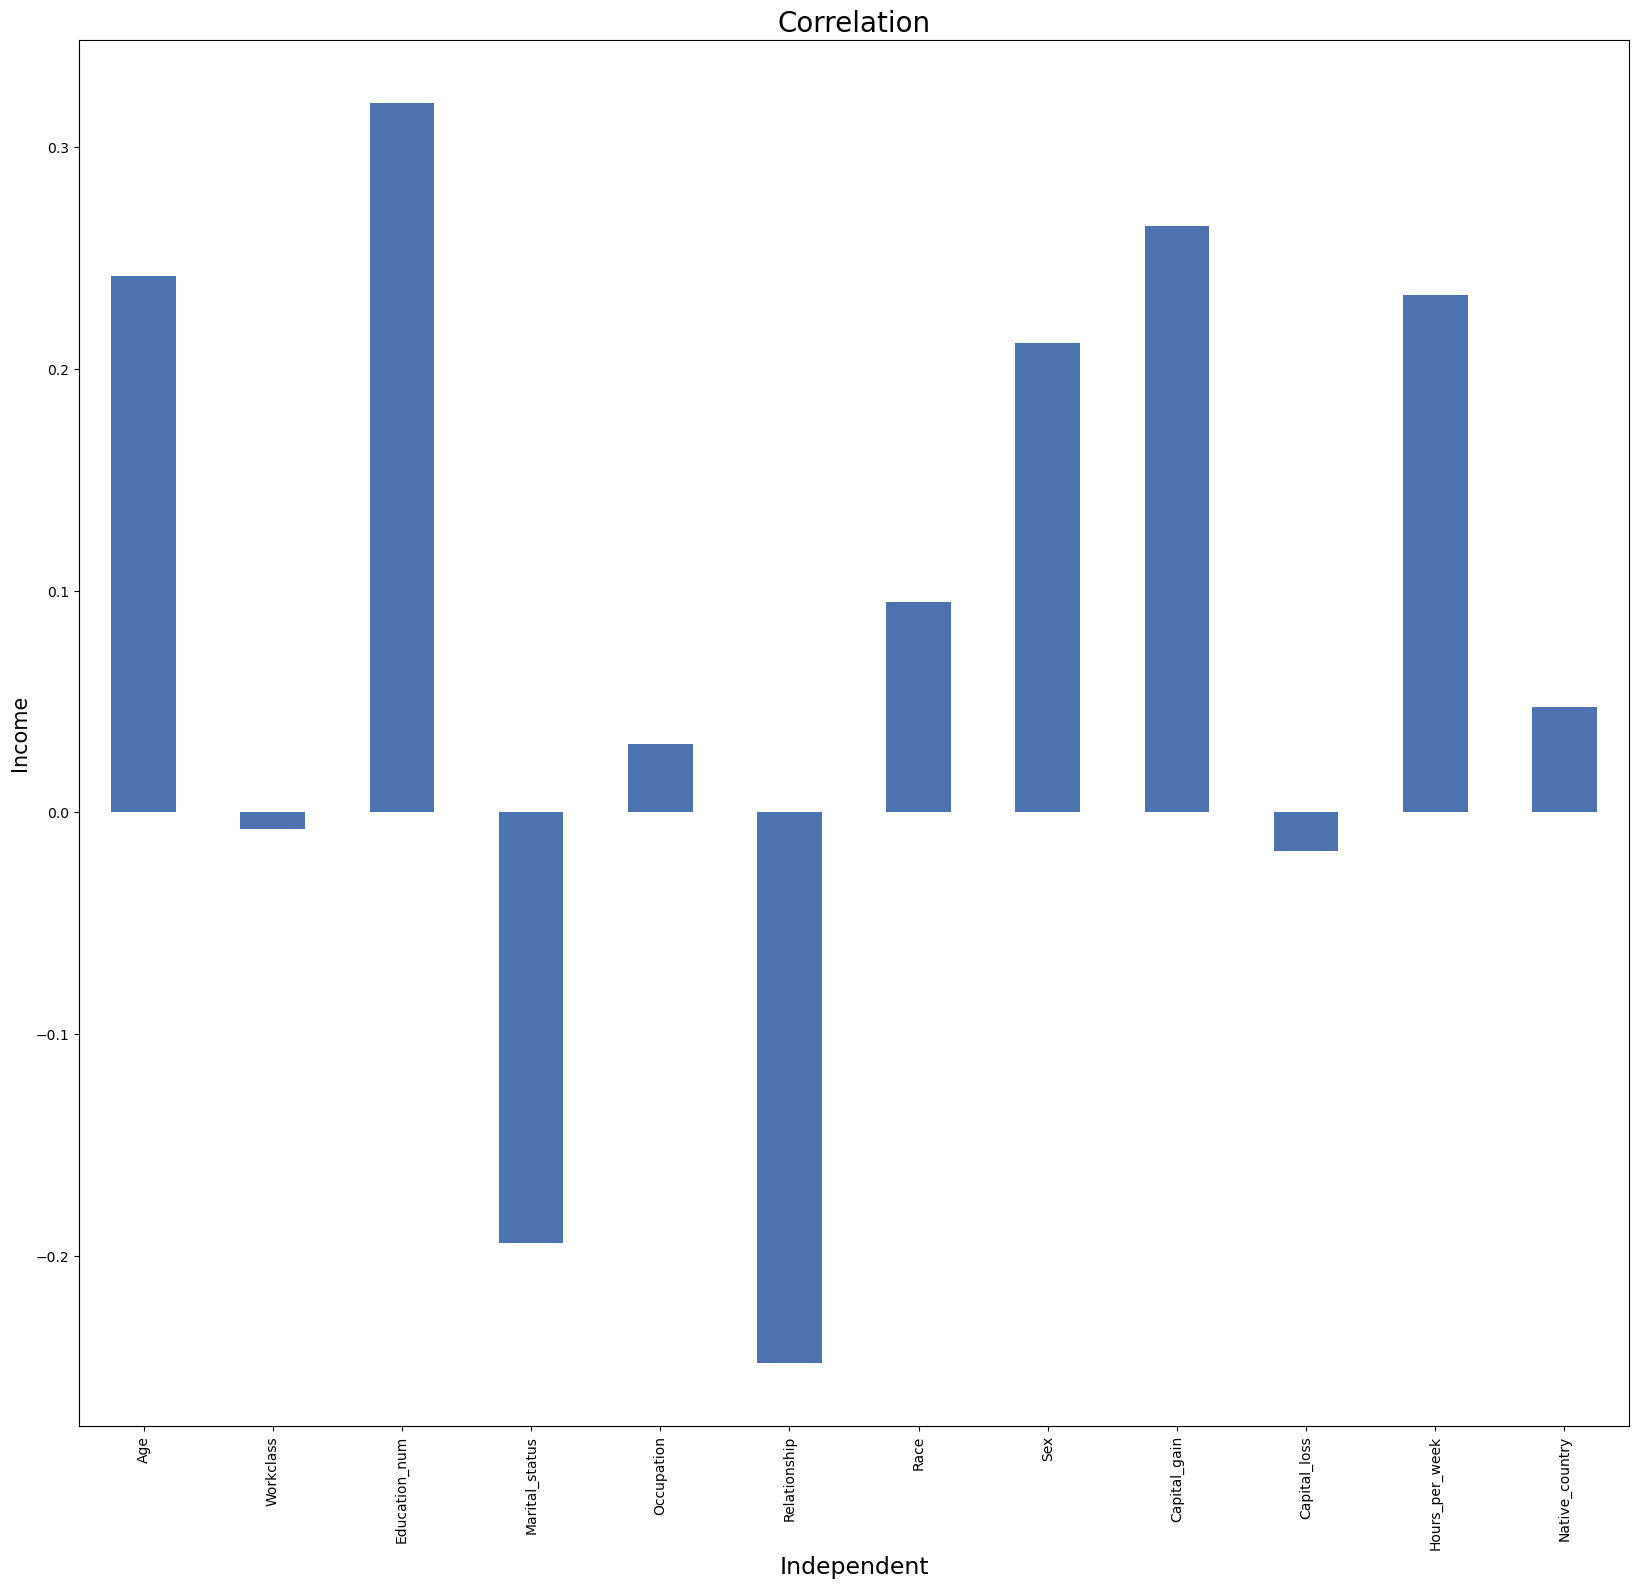

In [105]:
plt.figure(figsize = (20,18))
dfnew.corr()['Income'].drop(['Income']).plot(kind='bar')
plt.xlabel('Independent',fontsize=17)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation',fontsize = 20)
plt.show()

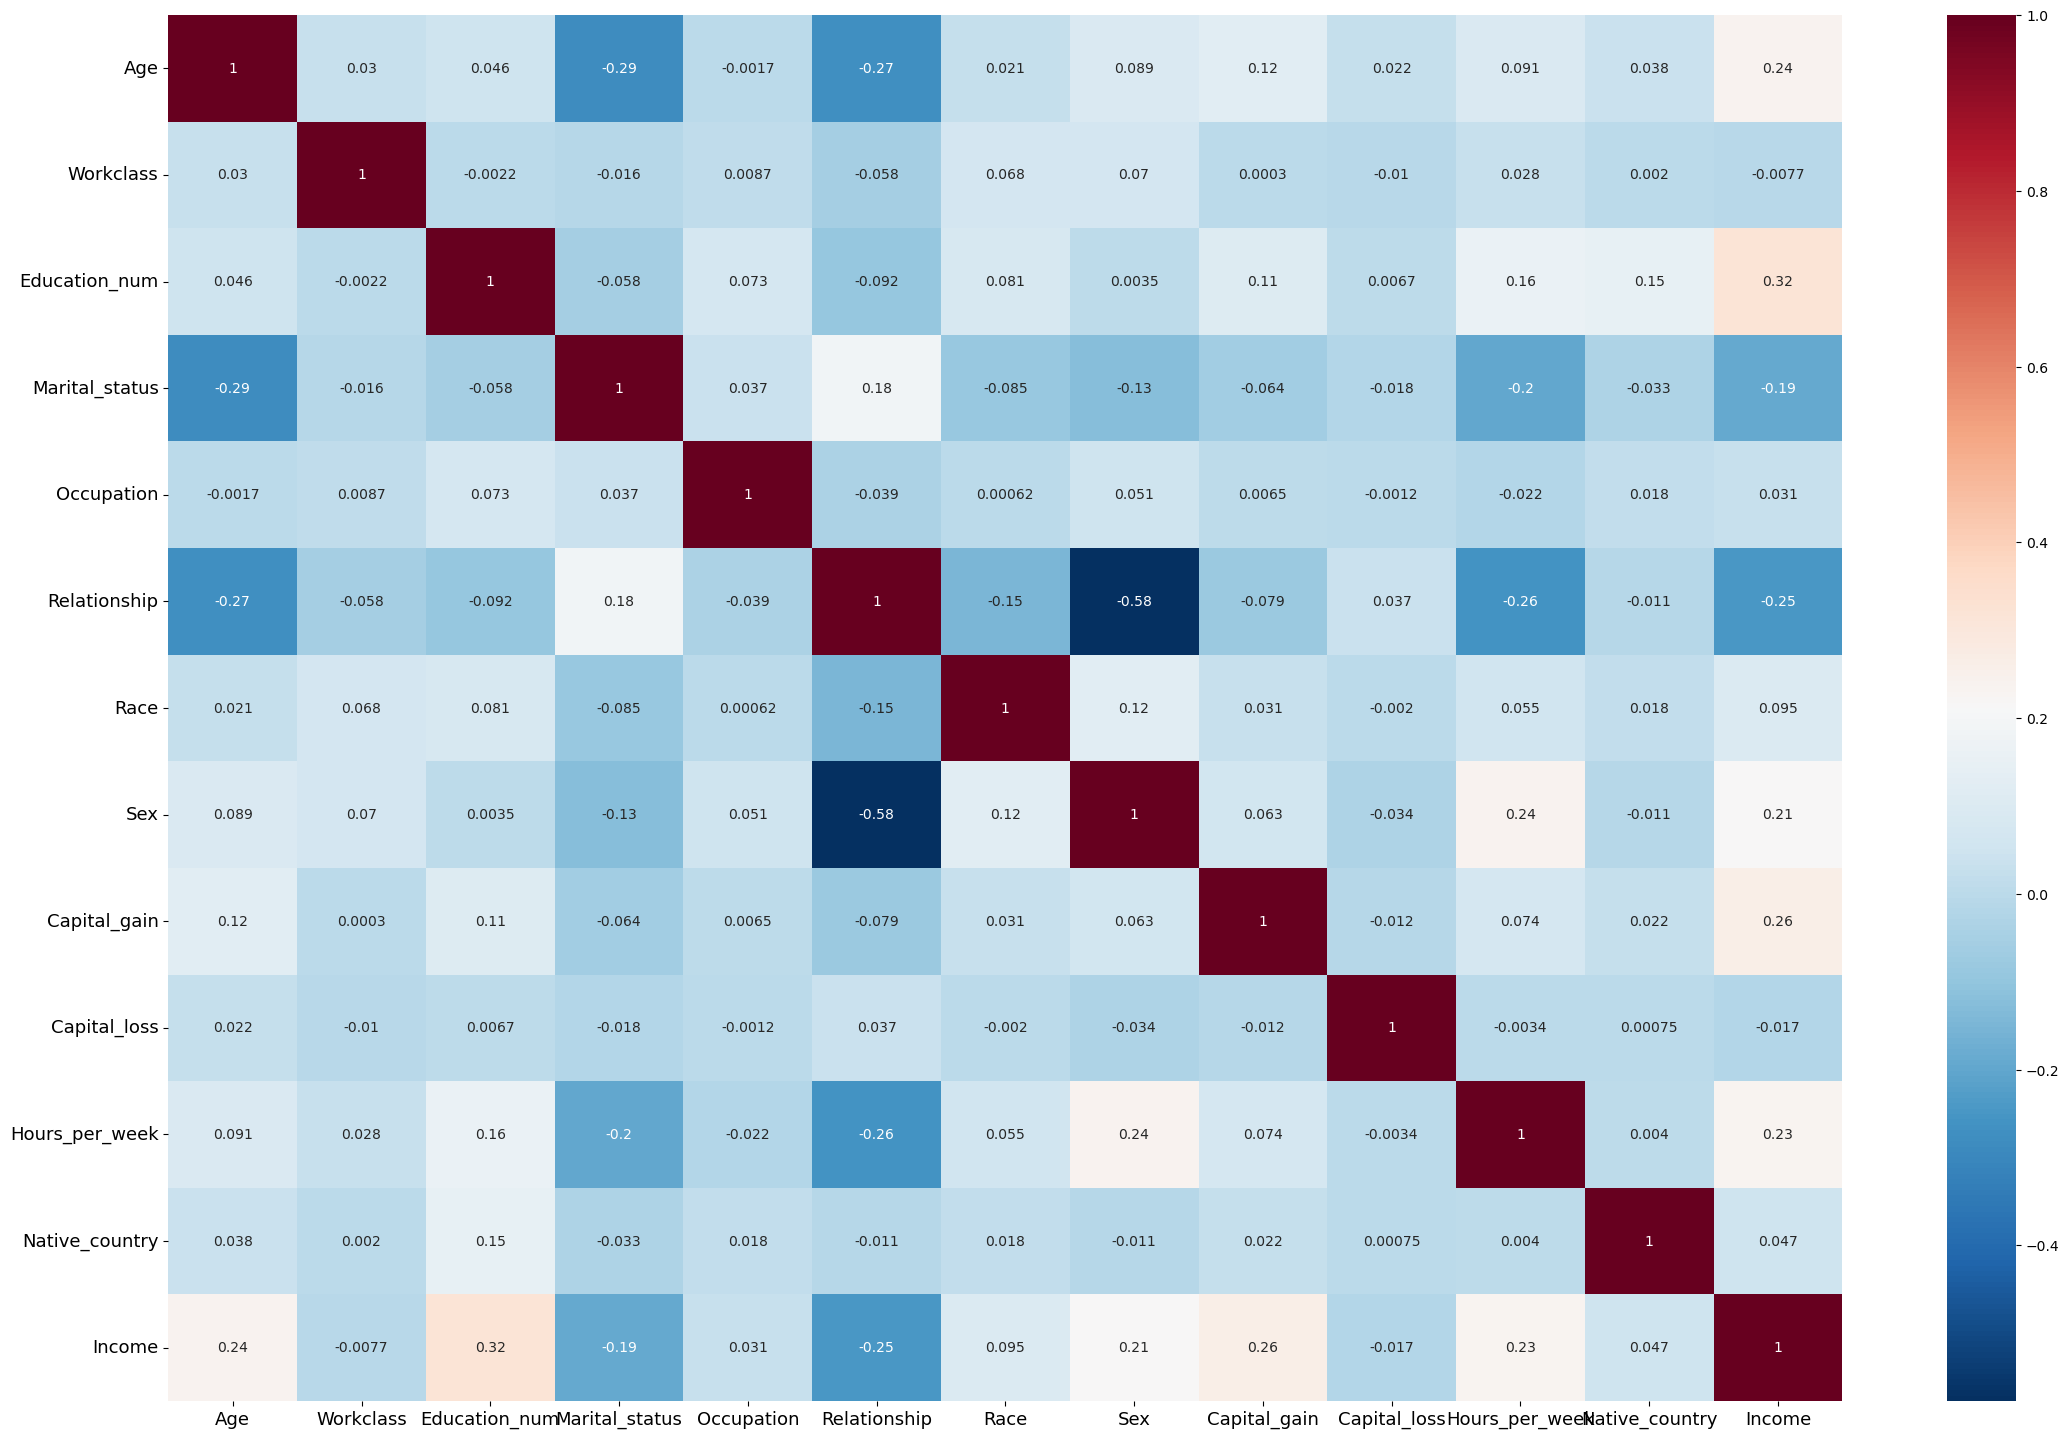

In [106]:
plt.figure(figsize=(27, 18))
corr_matrix = dfnew.corr()
sns.heatmap(corr_matrix, annot = True, cmap='RdBu_r')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [107]:
#Here we can see sex and relationship have high corr
#Relationship & Age 
#Marital_status and Hour_per_weel 
#But we will check for multicollinearity further to see which variables can be removed

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
VIF=pd.DataFrame()
VIF['VIF']= [variance_inflation_factor(dfnew.values,i) for i in range(dfnew.shape[1])]
VIF['Independent Features']= dfnew.columns
VIF

VIF Independent Features
0   10.453763                  Age
1    8.811118            Workclass
2   21.228965        Education_num
3    4.359582       Marital_status
4    3.357440           Occupation
5    2.937570         Relationship
6   36.275736                 Race
7    4.566312                  Sex
8    1.079181         Capital_gain
9    1.003564         Capital_loss
10  15.191442       Hours_per_week
11  79.002591       Native_country
12   1.712240               Income

In [110]:
#We can scale out target variable via applying SMOTE

In [111]:
dfnew.Income.value_counts()

Income
0    21785
1     6296
Name: count, dtype: int64

In [112]:
from imblearn.over_sampling import SMOTE

In [113]:
A=dfnew.drop(columns =['Income'])
B=dfnew['Income']

In [114]:
sortsample = SMOTE()
A, B = sortsample.fit_resample(A, B)

In [115]:
B.value_counts()

Income
0    21785
1    21785
Name: count, dtype: int64

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
Scaling= StandardScaler()
A_scale = Scaling.fit_transform(A)

In [118]:
from sklearn.decomposition import PCA

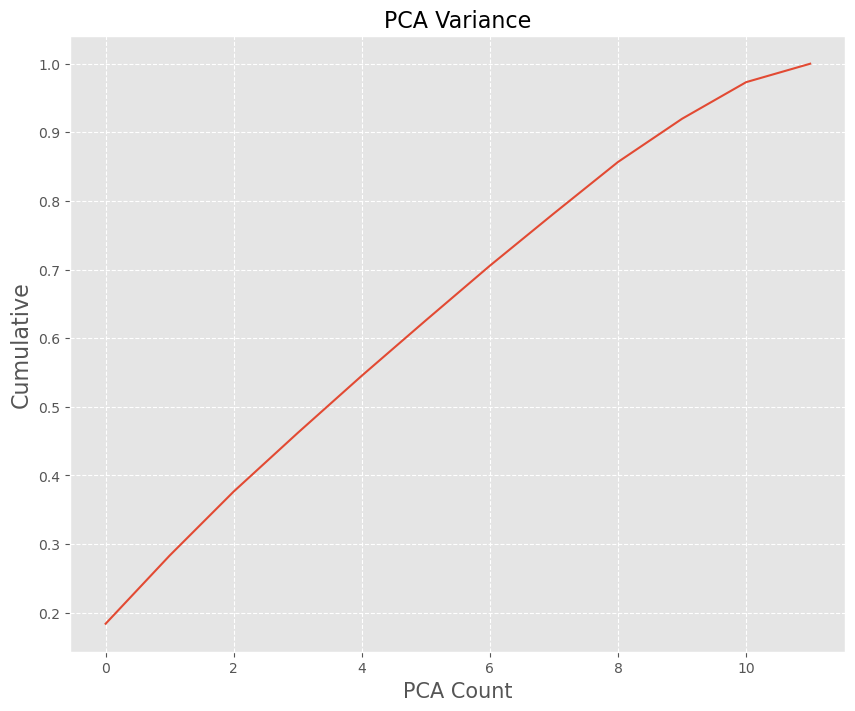

In [119]:
Pca = PCA()
PCA1 = Pca.fit_transform(A_scale)
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')
plt.plot(np.cumsum(Pca.explained_variance_ratio_))
plt.xlabel('PCA Count', fontsize=15)
plt.ylabel('Cumulative', fontsize=16)
plt.title('PCA Variance', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)
plt.show()

In [120]:
#Here we can see that 9 components explain over 90% variation

In [121]:
New_PCA1 = PCA(n_components=9)
A_new = New_PCA1.fit_transform(A_scale)

In [122]:
Final=pd.DataFrame(A_new,columns=np.arange(9))

In [123]:
VIF= pd.DataFrame()

In [124]:
VIF=pd.DataFrame()
VIF['VIF']= [variance_inflation_factor(Final.values,i) for i in range(Final.shape[1])]
VIF['Independent Features']= Final.columns
VIF

VIF  Independent Features
0  1.0                     0
1  1.0                     1
2  1.0                     2
3  1.0                     3
4  1.0                     4
5  1.0                     5
6  1.0                     6
7  1.0                     7
8  1.0                     8

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [126]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    A_train,A_test,B_train,B_test = train_test_split(Final, B, test_size = 0.30, random_state=r)
    modelRF = RandomForestClassifier()
    modelRF.fit(A_train, B_train)
    predictor=modelRF.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8555581057302425 at randomstate: 20


In [127]:
A_train,A_test,B_train,B_test = train_test_split(Final, B, test_size = 0.30, random_state=r)

In [128]:
A_train.shape

(30499, 9)

In [129]:
B_train.shape

(30499,)

In [130]:
A_test.shape

(13071, 9)

In [131]:
B_test.shape

(13071,)

In [132]:
Accuracy = 0
random_state = 0
for r in range(1,100):
    A_train,A_test,B_train,B_test = train_test_split(A, B, test_size = 0.30, random_state=r)
    LG = LogisticRegression()
    LG.fit(A_train, B_train)
    predictor=LG.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.761380154540586 at randomstate: 57


In [133]:
Accuracy = 0
random_state = 0
for r in range(1,100):
    A_train,A_test,B_train,B_test = train_test_split(A, B, test_size = 0.30, random_state=r)
    modelDT = DecisionTreeClassifier()
    modelDT.fit(A_train, B_train)
    predictor=modelDT.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8557111162114605 at randomstate: 72


In [134]:
Accuracy = 0
random_state = 0
for r in range(1,100):
    A_train,A_test,B_train,B_test = train_test_split(A, B, test_size = 0.30, random_state=r)
    GB = GradientBoostingClassifier()
    GB.fit(A_train, B_train)
    predictor=GB.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8520388646622293 at randomstate: 72


In [135]:
Accuracy = 0
random_state = 0
for r in range(1,100):
    A_train,A_test,B_train,B_test = train_test_split(A, B, test_size = 0.30, random_state=r)
    BC = BaggingClassifier()
    BC.fit(A_train, B_train)
    predictor=BC.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8707826486114298 at randomstate: 55


In [136]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    A_train, A_test,B_train,B_test = train_test_split(A, B, test_size = 0.30, random_state=r)
    KNN = KNeighborsClassifier()
    KNN.fit(A_train, B_train)
    predictor=KNN.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8443118353607222 at randomstate: 5


In [137]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    A_train,A_test,B_train,B_test = train_test_split(A, B, test_size = 0.30, random_state=r)
    NB = GaussianNB()
    NB.fit(A_train, B_train)
    predictor=NB.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.7764516869405554 at randomstate: 11


In [138]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    A_train,A_test,B_train,B_test = train_test_split(A, B, test_size = 0.30, random_state=r)
    Svc = SVC()
    Svc.fit(A_train, B_train)
    predictor=Svc.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.7746155611659399 at randomstate: 27


In [139]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    A_train,A_test,B_train,B_test = train_test_split(A, B, test_size = 0.30, random_state=r)
    ETC = ExtraTreesClassifier()
    ETC.fit(A_train, B_train)
    predictor=ETC.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8767500573789304 at randomstate: 20


In [140]:
#87 is the highest score so far

In [141]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [142]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

output for DT:
Overall Accuracy: 0.8443883406013312
Confusion Matrix:
[[5546  930]
 [1104 5491]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      6476
           1       0.86      0.83      0.84      6595

    accuracy                           0.84     13071
   macro avg       0.84      0.84      0.84     13071
weighted avg       0.84      0.84      0.84     13071





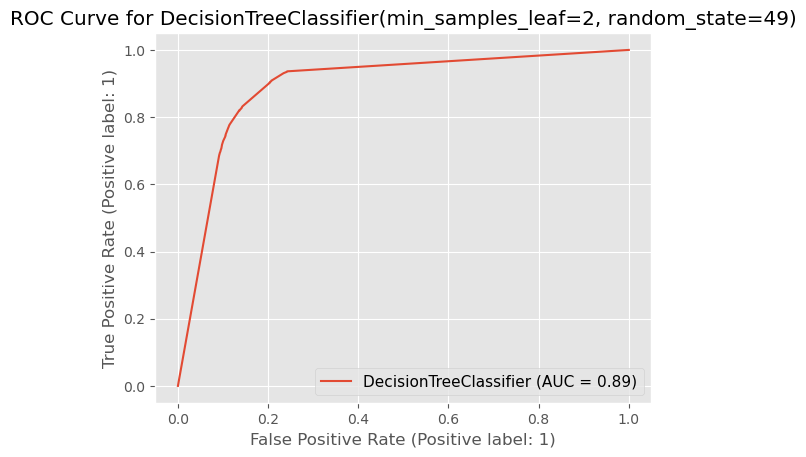

output for BC:
Overall Accuracy: 0.8690230280774233
Confusion Matrix:
[[5557  919]
 [ 793 5802]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6476
           1       0.86      0.88      0.87      6595

    accuracy                           0.87     13071
   macro avg       0.87      0.87      0.87     13071
weighted avg       0.87      0.87      0.87     13071





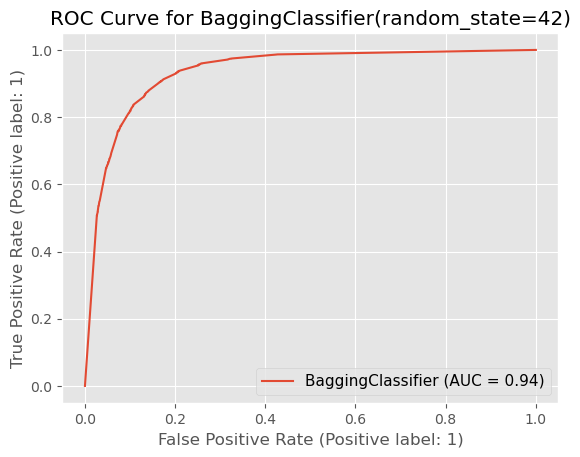

output for RF:
Overall Accuracy: 0.882564455665213
Confusion Matrix:
[[5591  885]
 [ 650 5945]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6476
           1       0.87      0.90      0.89      6595

    accuracy                           0.88     13071
   macro avg       0.88      0.88      0.88     13071
weighted avg       0.88      0.88      0.88     13071





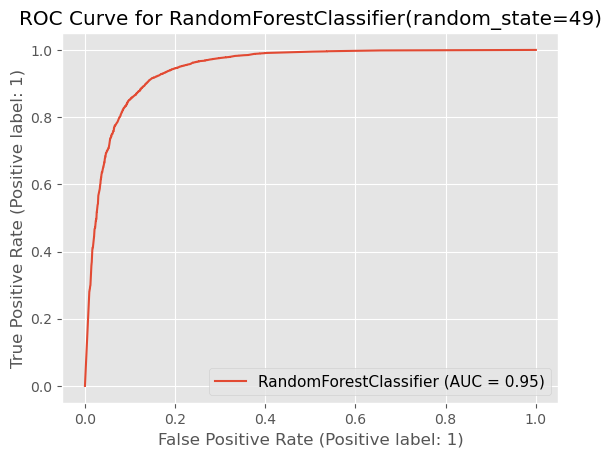

output for AB:
Overall Accuracy: 0.8476780659475174
Confusion Matrix:
[[5310 1166]
 [ 825 5770]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      6476
           1       0.83      0.87      0.85      6595

    accuracy                           0.85     13071
   macro avg       0.85      0.85      0.85     13071
weighted avg       0.85      0.85      0.85     13071





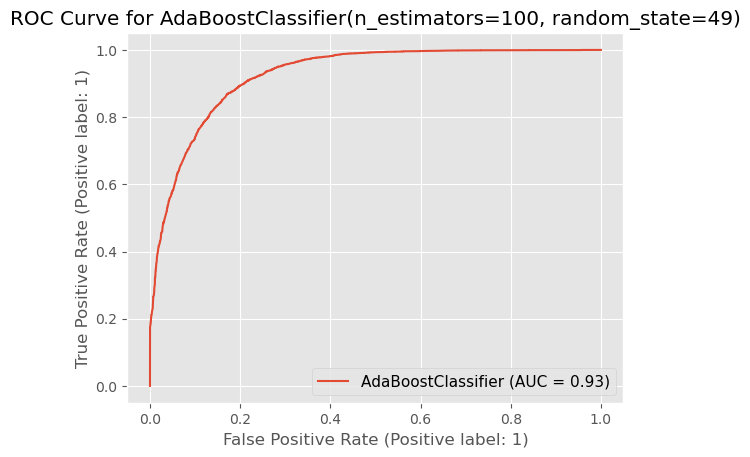

output for ET:
Overall Accuracy: 0.8762910259352765
Confusion Matrix:
[[5594  882]
 [ 735 5860]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6476
           1       0.87      0.89      0.88      6595

    accuracy                           0.88     13071
   macro avg       0.88      0.88      0.88     13071
weighted avg       0.88      0.88      0.88     13071





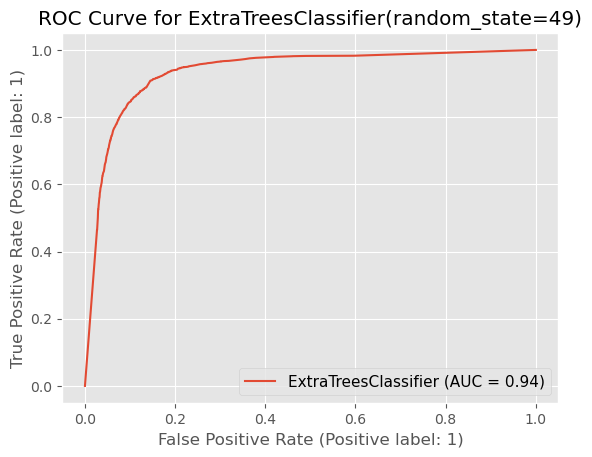

output for GB:
Overall Accuracy: 0.8415576466987988
Confusion Matrix:
[[5189 1287]
 [ 784 5811]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      6476
           1       0.82      0.88      0.85      6595

    accuracy                           0.84     13071
   macro avg       0.84      0.84      0.84     13071
weighted avg       0.84      0.84      0.84     13071





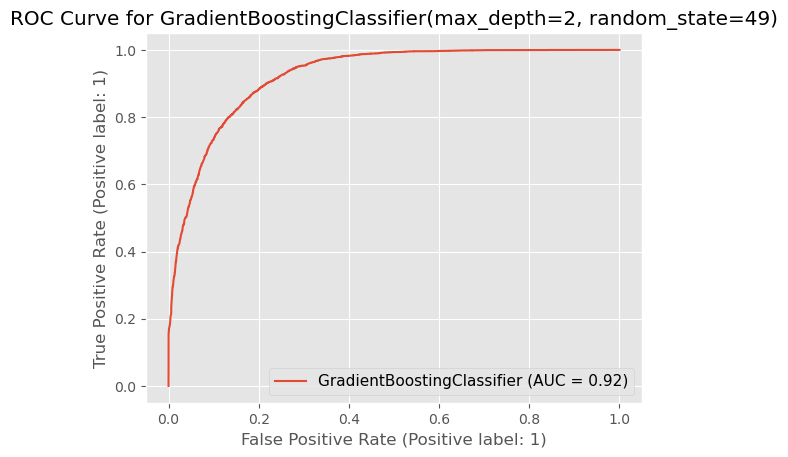

output for KNN:
Overall Accuracy: 0.8431642567515875
Confusion Matrix:
[[4938 1538]
 [ 512 6083]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      6476
           1       0.80      0.92      0.86      6595

    accuracy                           0.84     13071
   macro avg       0.85      0.84      0.84     13071
weighted avg       0.85      0.84      0.84     13071





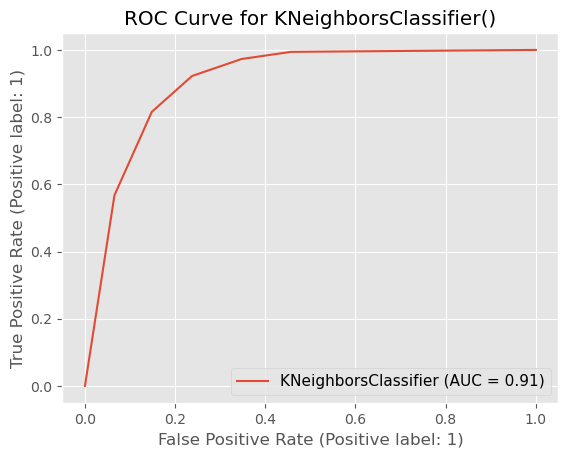

output for SVC:
Overall Accuracy: 0.7734679825568052
Confusion Matrix:
[[4743 1733]
 [1228 5367]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      6476
           1       0.76      0.81      0.78      6595

    accuracy                           0.77     13071
   macro avg       0.78      0.77      0.77     13071
weighted avg       0.77      0.77      0.77     13071





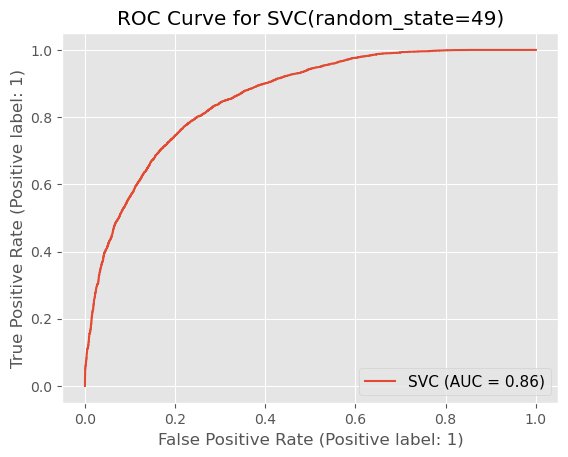

output for LR:
Overall Accuracy: 0.7561012929385663
Confusion Matrix:
[[4788 1688]
 [1500 5095]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      6476
           1       0.75      0.77      0.76      6595

    accuracy                           0.76     13071
   macro avg       0.76      0.76      0.76     13071
weighted avg       0.76      0.76      0.76     13071





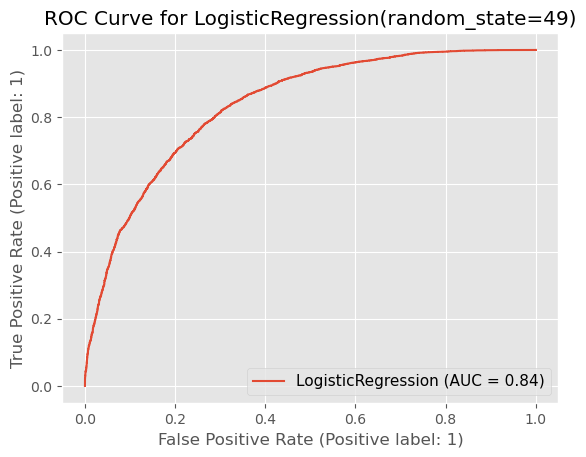

In [143]:
models = {
    'DT': DecisionTreeClassifier(min_samples_split=2, max_depth=None, min_samples_leaf=2, random_state=r),
    'BC': BaggingClassifier(n_estimators=10, max_features=1.0, max_samples=1.0,  random_state=42),
    'RF': RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=r),
    'AB': AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=r),
    'ET': ExtraTreesClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, random_state=r),
    'GB': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, min_samples_leaf=1,max_depth=2, min_samples_split=2,  random_state=r),
    'KNN': KNeighborsClassifier(n_neighbors=5, algorithm='auto', weights='uniform'),
    'SVC': SVC(kernel='rbf', gamma='scale', C=1.0,  random_state=r),
    'LR': LogisticRegression(C=1.0, penalty='l2', max_iter=100, random_state=r)}


def test_models(models, A_train, A_test, B_train, B_test):
    for title, m in models.items():
        m.fit(A_train, B_train)
        predresults = m.predict(A_test)
        acc = accuracy_score(B_test, predresults)
        c_matrix = confusion_matrix(B_test, predresults)
        classification_r = classification_report(B_test, predresults)
        print(f"output for {title}:")
        print(f"Overall Accuracy: {acc}")
        print("Confusion Matrix:")
        print(c_matrix)
        print("Classification Report:")
        print(classification_r)
        print("\n")
        RocCurveDisplay.from_estimator(m, A_test, B_test)
        plt.title(f'ROC Curve for {m}')
        plt.legend(prop={'size':11}, loc='lower right')
        plt.show()
        

test_models(models, A_train, A_test, B_train, B_test)

In [144]:
list_of_classifiers = {'DT': DecisionTreeClassifier(min_samples_split=2, max_depth=None, min_samples_leaf=2, random_state=r),
    'BC': BaggingClassifier(n_estimators=10, max_features=1.0, max_samples=1.0,  random_state=42),
    'RF': RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=r),
    'AB': AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=r),
    'ET': ExtraTreesClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, random_state=r),
    'GB': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, min_samples_leaf=1,max_depth=2, min_samples_split=2,  random_state=r),
    'KNN': KNeighborsClassifier(n_neighbors=5, algorithm='auto', weights='uniform'),
    'SVC': SVC(kernel='rbf', gamma='scale', C=1.0,  random_state=r),
    'LR': LogisticRegression(C=1.0, penalty='l2', max_iter=100, random_state=r)
                      }

Output = {}

for name, c in list_of_classifiers.items():
    cvs = cross_val_score(c, A, B, cv=5)
    c.fit(A_train, B_train)
    predict_test = c.predict(A_test)
    accuracy_testing = accuracy_score(B_test, predict_test)
    mcv_testcv_difference = accuracy_testing - cvs.mean()
    Output[name] = {
        'Cross Validation Scores': cvs,
        'Mean of Cross Validation Scores': cvs.mean(),
        'Accuracy of the test': accuracy_testing,
        'Overall difference': mcv_testcv_difference}

for name, m in Output.items():
    print(f"{name}:")
    print(f"Cross-Validation Scores: {m['Cross Validation Scores']}")
    print(f"Mean Cross-Validation: {m['Mean of Cross Validation Scores']}")
    print(f"Accuracy: {m['Accuracy of the test']}")

DT:
Cross-Validation Scores: [0.80640349 0.83233877 0.85689695 0.8605692  0.86493   ]
Mean Cross-Validation: 0.8442276795960524
Accuracy: 0.8443883406013312
BC:
Cross-Validation Scores: [0.83187973 0.85861832 0.87766812 0.88707826 0.88902915]
Mean Cross-Validation: 0.8688547165480835
Accuracy: 0.8690230280774233
RF:
Cross-Validation Scores: [0.84553592 0.86860225 0.88948818 0.8992426  0.89993115]
Mean Cross-Validation: 0.8805600183612576
Accuracy: 0.882564455665213
AB:
Cross-Validation Scores: [0.81328896 0.83968327 0.84324076 0.8518476  0.8554051 ]
Mean Cross-Validation: 0.8406931374799174
Accuracy: 0.8476780659475174
ET:
Cross-Validation Scores: [0.83233877 0.86091347 0.88547165 0.89683268 0.89671793]
Mean Cross-Validation: 0.874454900160661
Accuracy: 0.8762910259352765
GB:
Cross-Validation Scores: [0.81282993 0.83050264 0.83761763 0.84553592 0.85092954]
Mean Cross-Validation: 0.8354831305944458
Accuracy: 0.8415576466987988
KNN:
Cross-Validation Scores: [0.82476475 0.83635529 0.84530

In [ ]:
#Looking at the ROC curve, cross validation and f1 score, Random Forest provides us with the best accuracy score.

In [3]:
from sklearn.model_selection import GridSearchCV

In [2]:
Param_RF = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 4, 5, 10], 'min_samples_leaf': [1, 2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2'],  'bootstrap': [True, False],  'oob_score': [True, False] }

In [159]:
GCV = GridSearchCV(RandomForestClassifier(),Param_RF)

In [ ]:
#Its taking over 3 hours 

In [ ]:
GCV.fit(A_train,B_train)

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [150]:
Classifier = RandomForestClassifier(n_jobs=-1)
param_RF = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 4, 5, 10], 'min_samples_leaf': [1, 2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2'],  'bootstrap': [True, False],  'oob_score': [True, False] }

Random_search = RandomizedSearchCV(Classifier, param_RF, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=r)
Random_search.fit(A, B)

print(f"Best parameters: {Random_search.best_params_}")
print(f"Best score: {Random_search.best_score_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [155]:
Finalmodel=RandomForestClassifier(ccp_alpha= 0.0, bootstrap=True, max_depth= 30, max_features = None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200)

In [158]:
True_model1= RandomForestClassifier(bootstrap= False, max_features = 'sqrt', max_depth= None , n_estimators = 200, min_samples_split = 2, min_samples_leaf = 2, oob_score= False)
True_model1.fit(A_train,B_train)
pred=True_model1.predict(A_test)
acc= accuracy_score(B_test,pred)
print(acc*100)

88.33295080713029


In [ ]:
import joblib
joblib.dump(Truemodel1,'Census.pkl')

In [ ]:
#i tried running the code but for some reason, it just does not provide me with a response. The codes are there but it gets stuck altogether 